In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as dt
from sklearn.linear_model import LinearRegression
from pandas import DataFrame
sns.set()


In [111]:
!pip install folium

In [112]:
from branca.element import Figure
fig=Figure(width=550,height=350)

In [113]:
df_day = pd.read_csv("day.csv", parse_dates = ["dteday"])

In [114]:
df_day

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[731 rows x 16 columns]

In [115]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [116]:
df_hour = pd.read_csv("hour.csv")
df_hour

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

In [117]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [118]:
df_day

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[731 rows x 16 columns]

In [119]:
df_day.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [120]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [121]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [122]:
df_hour.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [123]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [124]:
df_day["dteday"] = pd.to_datetime(df_day["dteday"])

In [125]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [126]:
df_day.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [127]:
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

In [128]:
df_hour.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [129]:
df_hour

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1 2011-01-01       1   0     1   0        0        6           0   
1            2 2011-01-01       1   0     1   1        0        6           0   
2            3 2011-01-01       1   0     1   2        0        6           0   
3            4 2011-01-01       1   0     1   3        0        6           0   
4            5 2011-01-01       1   0     1   4        0        6           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375 2012-12-31       1   1    12  19        0        1           1   
17375    17376 2012-12-31       1   1    12  20        0        1           1   
17376    17377 2012-12-31       1   1    12  21        0        1           1   
17377    17378 2012-12-31       1   1    12  22        0        1           1   
17378    17379 2012-12-31       1   1    12  23        0        1           1   

       weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0               1  0.24  0.2879  0.81     0.0000       3          13   16  
1               1  0.22  0.2727  0.80     0.0000       8          32   40  
2               1  0.22  0.2727  0.80     0.0000       5          27   32  
3               1  0.24  0.2879  0.75     0.0000       3          10   13  
4               1  0.24  0.2879  0.75     0.0000       0           1    1  
...           ...   ...     ...   ...        ...     ...         ...  ...  
17374           2  0.26  0.2576  0.60     0.1642      11         108  119  
17375           2  0.26  0.2576  0.60     0.1642       8          81   89  
17376           1  0.26  0.2576  0.60     0.1642       7          83   90  
17377           1  0.26  0.2727  0.56     0.1343      13          48   61  
17378           1  0.26  0.2727  0.65     0.1343      12          37   49  

[17379 rows x 17 columns]

In [130]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [131]:
""" plt.figure(figsize= (20,15))
mask = np.triu(np.ones_like(df_day.corr(), dtype=np.bool))
ax = sns.heatmap(df_day.corr(), vmin=-1, vmax = 1, mask = mask, annot=True, annot_kws={"size": 15},cmap="PiYG")
plt.xticks(rotation=45)
plt.yticks(rotation = 45)
plt.title("correlation day.csv")
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.show() """

' plt.figure(figsize= (20,15))\nmask = np.triu(np.ones_like(df_day.corr(), dtype=np.bool))\nax = sns.heatmap(df_day.corr(), vmin=-1, vmax = 1, mask = mask, annot=True, annot_kws={"size": 15},cmap="PiYG")\nplt.xticks(rotation=45)\nplt.yticks(rotation = 45)\nplt.title("correlation day.csv")\nplt.setp(ax.get_xticklabels(), fontsize=20)\nplt.setp(ax.get_yticklabels(), fontsize=20)\nplt.show() '

In [132]:
""" plt.figure(figsize= (20,15))
mask = np.triu(np.ones_like(df_hour.corr(), dtype=np.bool))
ax = sns.heatmap(df_hour.corr(), vmin=-1, vmax = 1, mask = mask, annot=True, annot_kws={"size": 15},cmap="PiYG")
plt.xticks(rotation=45)
plt.yticks(rotation = 45)
plt.title("correlation day.csv")
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.show() """

' plt.figure(figsize= (20,15))\nmask = np.triu(np.ones_like(df_hour.corr(), dtype=np.bool))\nax = sns.heatmap(df_hour.corr(), vmin=-1, vmax = 1, mask = mask, annot=True, annot_kws={"size": 15},cmap="PiYG")\nplt.xticks(rotation=45)\nplt.yticks(rotation = 45)\nplt.title("correlation day.csv")\nplt.setp(ax.get_xticklabels(), fontsize=20)\nplt.setp(ax.get_yticklabels(), fontsize=20)\nplt.show() '

# Epic 2 Exploratory Data Analysis: Formulate some hypothesis

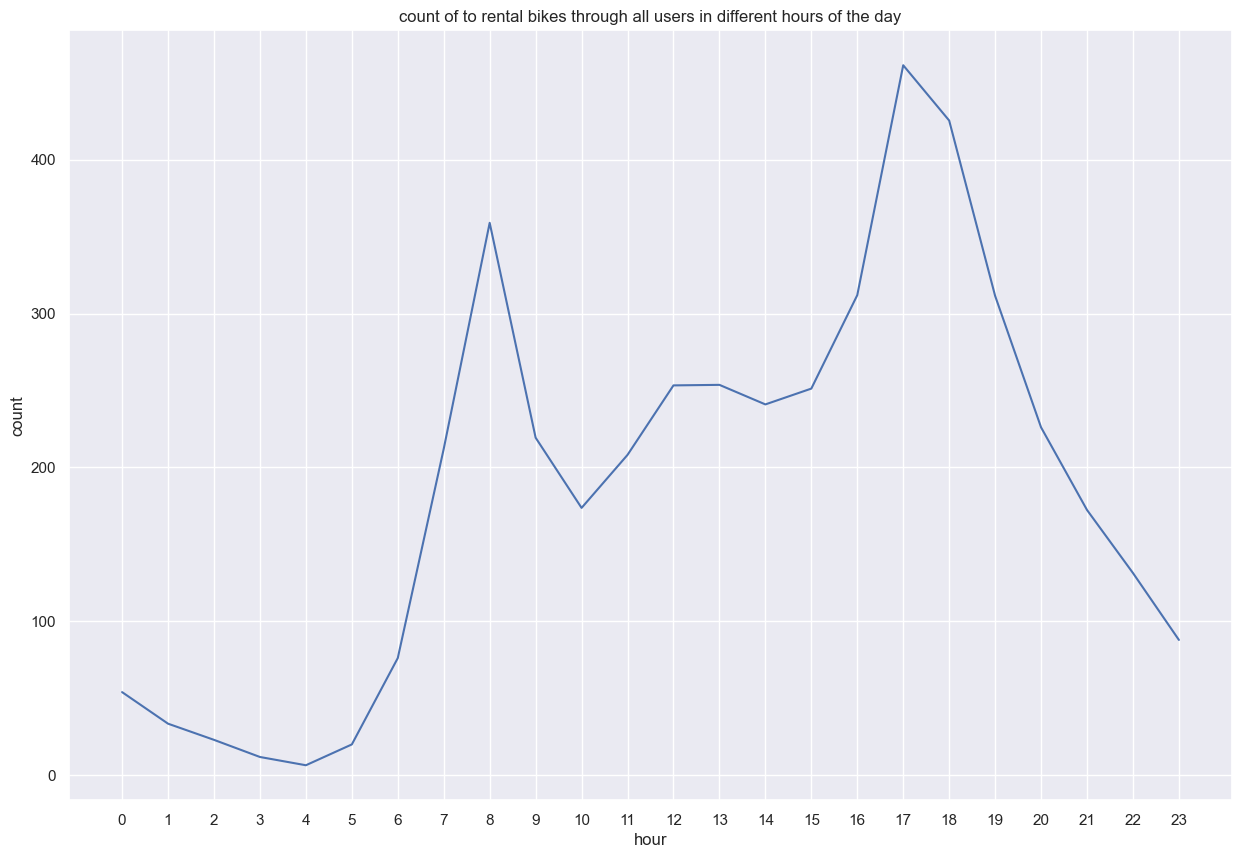

In [133]:
# LMS epic 2: Hourly trend:

plt.figure(figsize=(15,10))
sns.lineplot(data= df_hour, x = df_hour["hr"], y = df_hour["cnt"], errorbar= None)
plt.xlabel("hour")
plt.ylabel("count")
plt.title("count of to rental bikes through all users in different hours of the day")
x = np.arange(0,24)
plt.xticks(x)
plt.show()

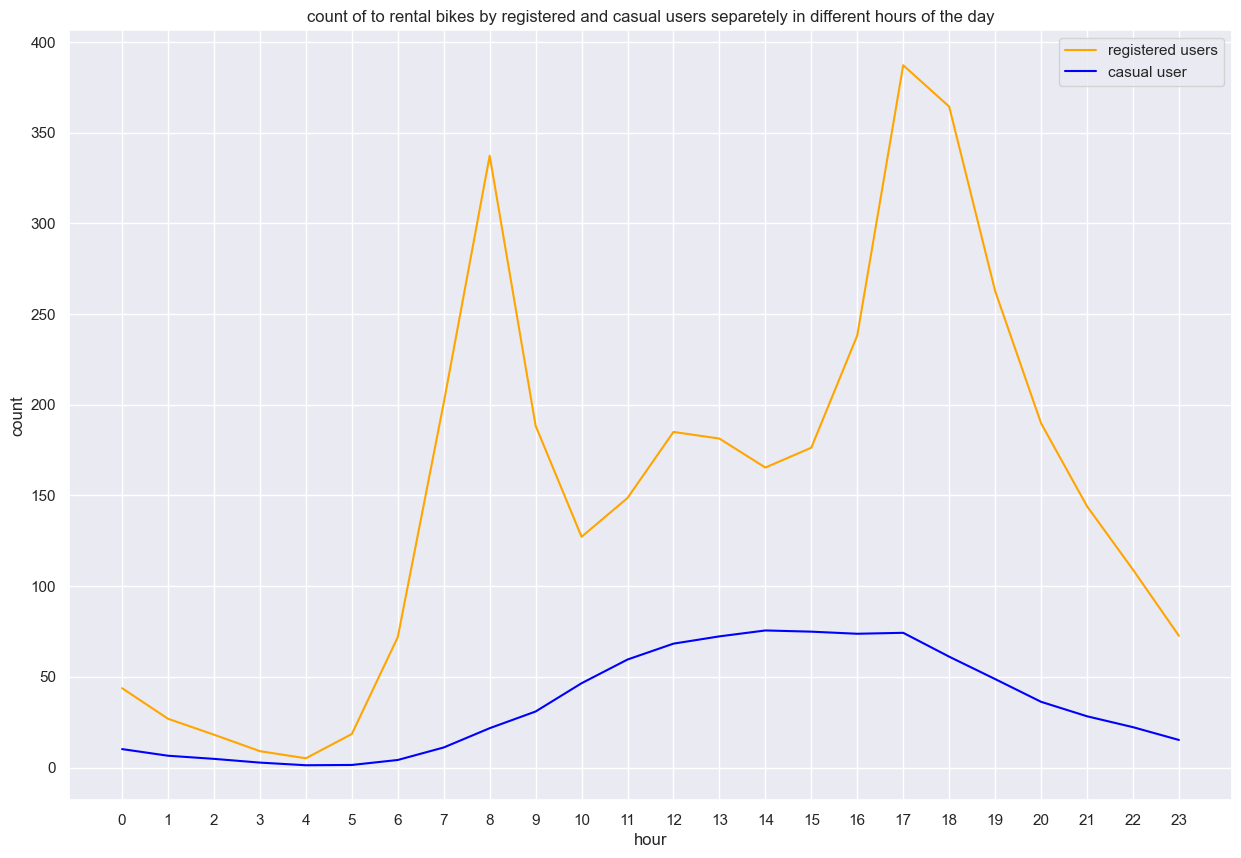

In [134]:
plt.figure(figsize=(15,10))
sns.lineplot(data= df_hour, x = df_hour["hr"], y = df_hour["registered"], errorbar= None, color = "orange", label = "registered users")
sns.lineplot(data= df_hour, x = df_hour["hr"], y = df_hour["casual"], errorbar= None, color = "blue", label = "casual user")

plt.xlabel("hour")
plt.ylabel("count")
plt.title("count of to rental bikes by registered and casual users separetely in different hours of the day")
x = np.arange(0,24)
plt.xticks(x)
plt.show()

In [135]:
df_hour


instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1 2011-01-01       1   0     1   0        0        6           0   
1            2 2011-01-01       1   0     1   1        0        6           0   
2            3 2011-01-01       1   0     1   2        0        6           0   
3            4 2011-01-01       1   0     1   3        0        6           0   
4            5 2011-01-01       1   0     1   4        0        6           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375 2012-12-31       1   1    12  19        0        1           1   
17375    17376 2012-12-31       1   1    12  20        0        1           1   
17376    17377 2012-12-31       1   1    12  21        0        1           1   
17377    17378 2012-12-31       1   1    12  22        0        1           1   
17378    17379 2012-12-31       1   1    12  23        0        1           1   

       weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0               1  0.24  0.2879  0.81     0.0000       3          13   16  
1               1  0.22  0.2727  0.80     0.0000       8          32   40  
2               1  0.22  0.2727  0.80     0.0000       5          27   32  
3               1  0.24  0.2879  0.75     0.0000       3          10   13  
4               1  0.24  0.2879  0.75     0.0000       0           1    1  
...           ...   ...     ...   ...        ...     ...         ...  ...  
17374           2  0.26  0.2576  0.60     0.1642      11         108  119  
17375           2  0.26  0.2576  0.60     0.1642       8          81   89  
17376           1  0.26  0.2576  0.60     0.1642       7          83   90  
17377           1  0.26  0.2727  0.56     0.1343      13          48   61  
17378           1  0.26  0.2727  0.65     0.1343      12          37   49  

[17379 rows x 17 columns]

In [136]:
df_hour["year"] = df_hour["yr"].apply(lambda value: 2011
if value < 1 else 2012
)
df_hour

# df['year'] = pd.to_datetime(df['dteday']).dt.year

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1 2011-01-01       1   0     1   0        0        6           0   
1            2 2011-01-01       1   0     1   1        0        6           0   
2            3 2011-01-01       1   0     1   2        0        6           0   
3            4 2011-01-01       1   0     1   3        0        6           0   
4            5 2011-01-01       1   0     1   4        0        6           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375 2012-12-31       1   1    12  19        0        1           1   
17375    17376 2012-12-31       1   1    12  20        0        1           1   
17376    17377 2012-12-31       1   1    12  21        0        1           1   
17377    17378 2012-12-31       1   1    12  22        0        1           1   
17378    17379 2012-12-31       1   1    12  23        0        1           1   

       weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0               1  0.24  0.2879  0.81     0.0000       3          13   16   
1               1  0.22  0.2727  0.80     0.0000       8          32   40   
2               1  0.22  0.2727  0.80     0.0000       5          27   32   
3               1  0.24  0.2879  0.75     0.0000       3          10   13   
4               1  0.24  0.2879  0.75     0.0000       0           1    1   
...           ...   ...     ...   ...        ...     ...         ...  ...   
17374           2  0.26  0.2576  0.60     0.1642      11         108  119   
17375           2  0.26  0.2576  0.60     0.1642       8          81   89   
17376           1  0.26  0.2576  0.60     0.1642       7          83   90   
17377           1  0.26  0.2727  0.56     0.1343      13          48   61   
17378           1  0.26  0.2727  0.65     0.1343      12          37   49   

       year  
0      2011  
1      2011  
2      2011  
3      2011  
4      2011  
...     ...  
17374  2012  
17375  2012  
17376  2012  
17377  2012  
17378  2012  

[17379 rows x 18 columns]

In [137]:
df_day["year"] = df_day["yr"].apply(lambda value: 2011
if value < 1 else 2012
)
df_day

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  year  
0     985  2011  
1     801  2011  
2    1349  2011  
3    1562  2011  
4    1600  2011  
..    ...   ...  
726  2114  2012  
727  3095  2012  
728  1341  2012  
729  1796  2012  
730  2729  2012  

[731 rows x 17 columns]

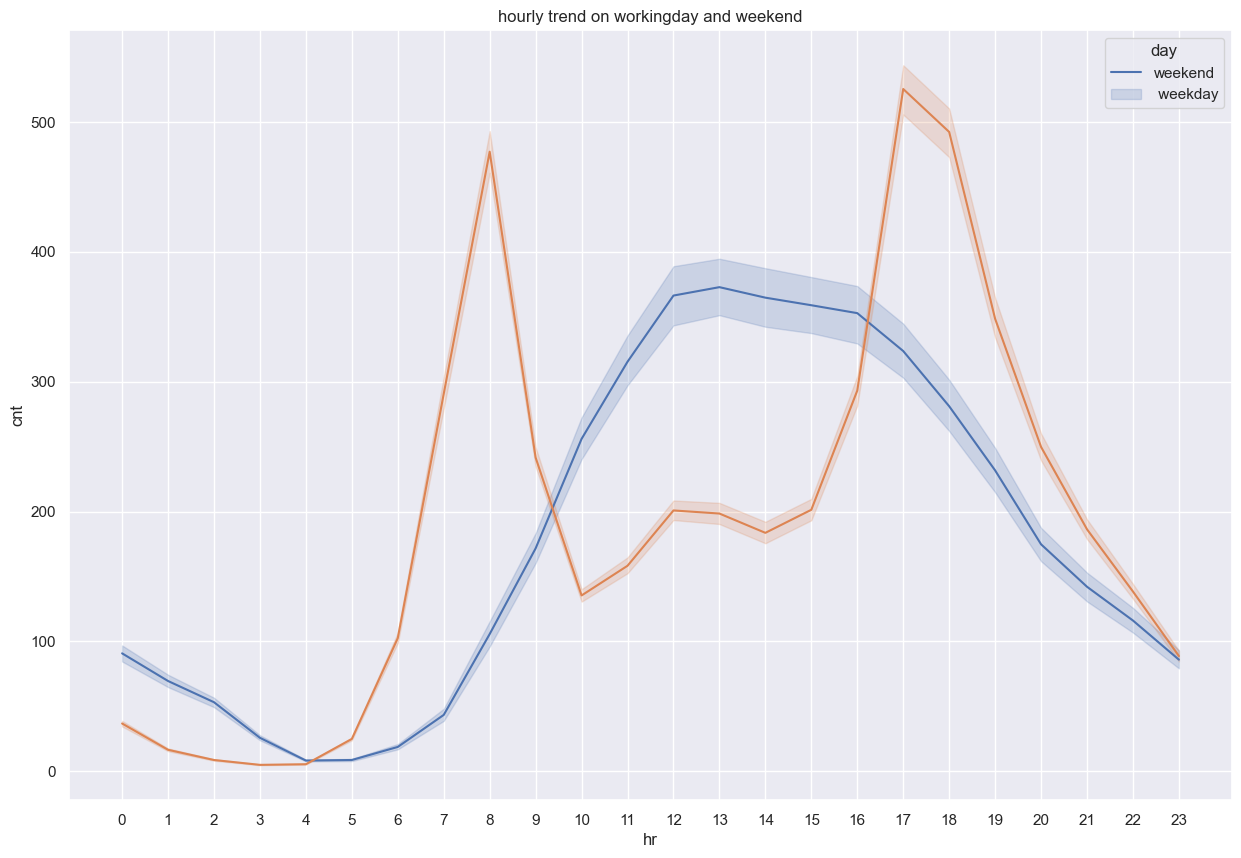

In [138]:
# hourly trend on working day and weekend
workingday = df_hour.loc[(df_hour["workingday"] == 1)]
weekend = df_hour.loc[(df_hour["workingday"] == 0)]
palette = sns.color_palette()
label_list = ["weekend", " weekday"]
fig, ax = plt.subplots(figsize = (15,10))
ax1 = sns.lineplot(data = df_hour, x =df_hour["hr"], y = df_hour["cnt"], hue = df_hour["workingday"], color =palette)
plt.legend(title = "day", labels = label_list)
plt.title("hourly trend on workingday and weekend")
x = np.arange(0,24)
plt.xticks(x)
plt.show()

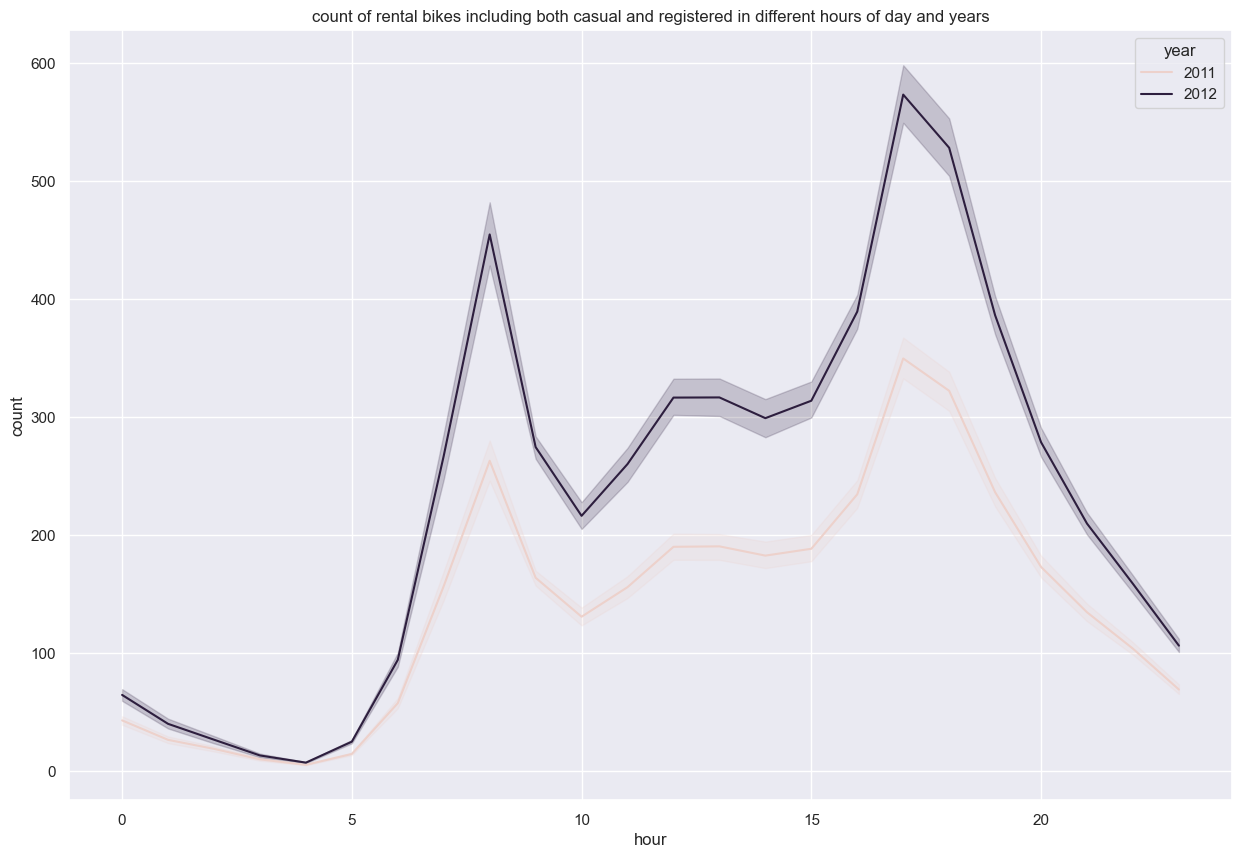

In [139]:
plt.figure(figsize=(15,10))
legend_list = [0, 1]
sns.lineplot(data= df_hour, x = df_hour["hr"], y = df_hour["cnt"], hue = "year" )
plt.xlabel("hour")
plt.ylabel("count")
plt.title("count of rental bikes including both casual and registered in different hours of day and years")

#plt.legend(title = "year", edgecolor='blue', loc='upper right', bbox_to_anchor=(0.7, 0.7)) # lables = legend_list --> when i use this, the color of legend changes to black
plt.show()

#hue_order = 

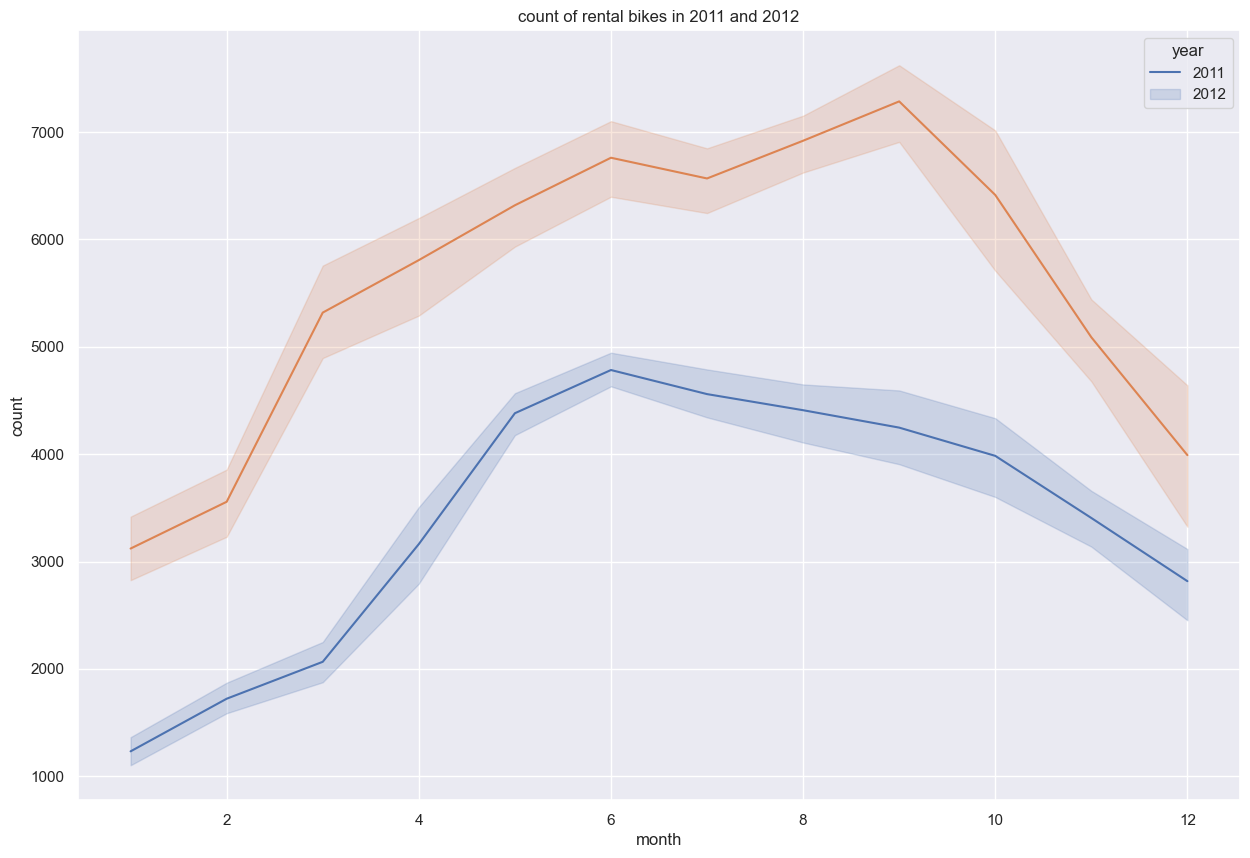

In [140]:
plt.figure(figsize=(15,10))
legend_list = [2011, 2012]
sns.lineplot(data= df_day, x = df_day["mnth"], y = df_day["cnt"], hue = "yr" )
plt.xlabel("month")
plt.ylabel("count")
plt.title("count of rental bikes in 2011 and 2012")
plt.legend(title = "year", labels = legend_list)
#plt.legend(title = "year", edgecolor='blue', loc='upper right', bbox_to_anchor=(0.7, 0.7)) # lables = legend_list --> when i use this, the color of legend changes to black
plt.show()

C:\Users\satom\AppData\Local\Temp\ipykernel_13848\3038080768.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data = df_day, x = df_day["weekday"], y = df_day["cnt"], ci =None)


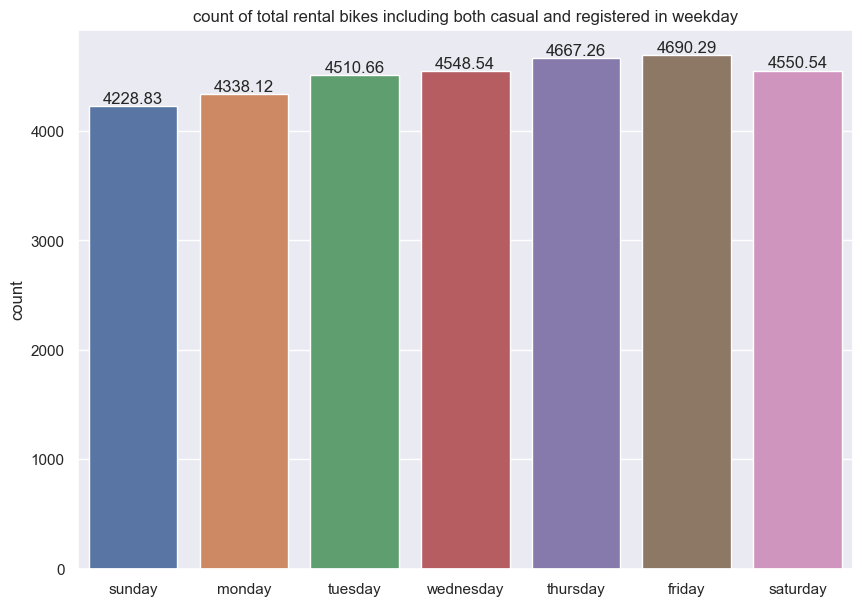

In [141]:
# how many bikes are rented in each day?
plt.figure(figsize=(10,7))
ax = sns.barplot(data = df_day, x = df_day["weekday"], y = df_day["cnt"], ci =None)
plt.xlabel("")
plt.xticks([0,1,2,3,4,5,6],
               ["sunday", "monday", "tuesday", "wednesday","thursday", "friday", "saturday"])
plt.ylabel("count")
plt.title("count of total rental bikes including both casual and registered in weekday")
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

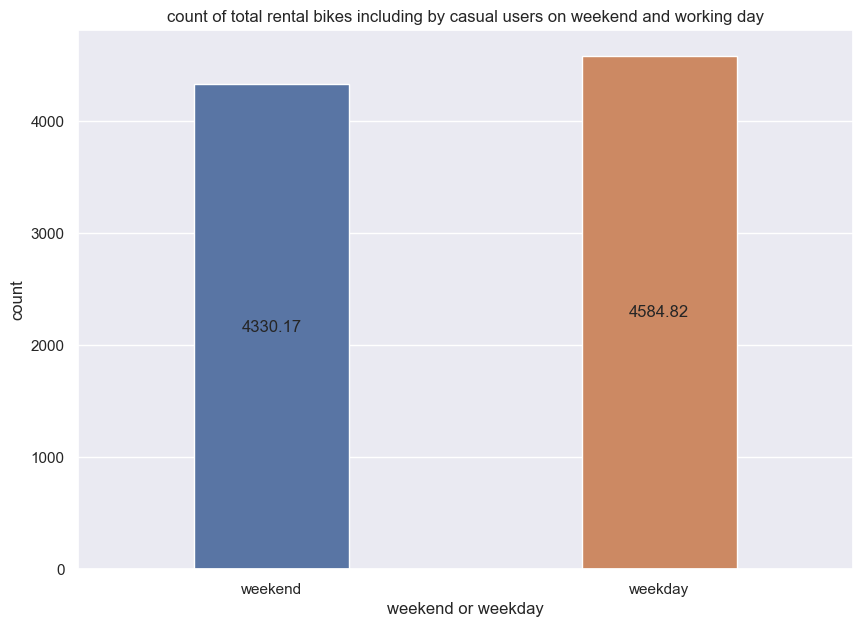

In [142]:
# how many bikes are rented on weekend and working day? 0 is weekend, 1 is weekday
plt.figure(figsize=(10,7))
graph = sns.barplot(data = df_day, x = df_day["workingday"], y = df_day["cnt"], width = .4, errorbar=None)
plt.xlabel("weekend or weekday")
plt.xticks([0,1],
               ["weekend", "weekday"])
plt.ylabel("count")
plt.title("count of total rental bikes including by casual users on weekend and working day")

for i in graph.containers:
    graph.bar_label(i,label_type="center")

plt.show()

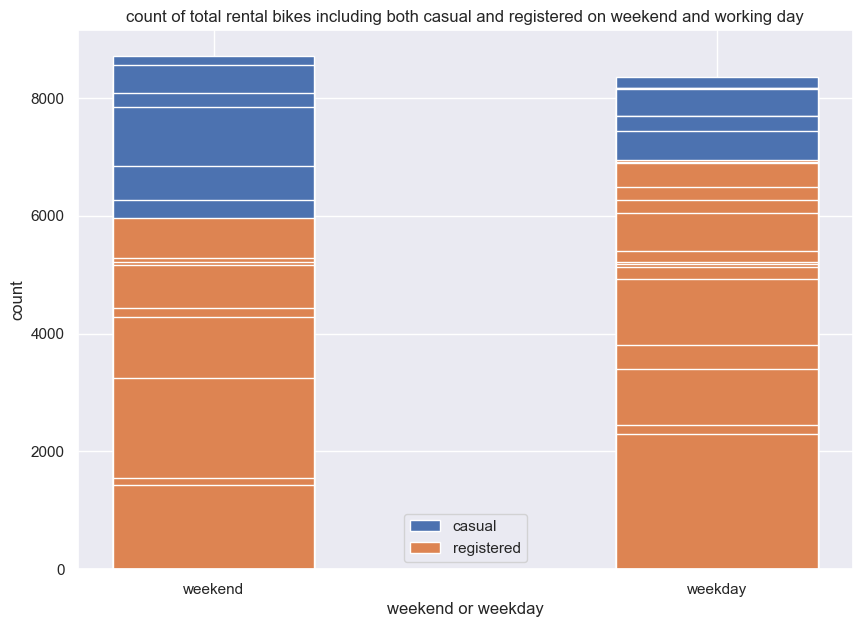

In [143]:
plt.figure(figsize=(10,7))
y1 = df_day["casual"]
y2 = df_day["registered"]
#graph = sns.barplot(data = df_day, x = df_day["workingday"], y = df_day["cnt"], width = .4, errorbar=None)
ax1 = plt.bar( x = df_day["workingday"], height = y1, bottom = y2, label = "casual", width = .4)
ax2 = plt.bar(x = df_day["workingday"], height = y2, label = "registered", width = .4)

plt.xlabel("weekend or weekday")
plt.xticks([0,1],
               ["weekend", "weekday"])
plt.ylabel("count")
plt.title("count of total rental bikes including both casual and registered on weekend and working day")
plt.legend()
""" for i in graph.containers:
    graph.bar_label(i,label_type="center") """

plt.show()

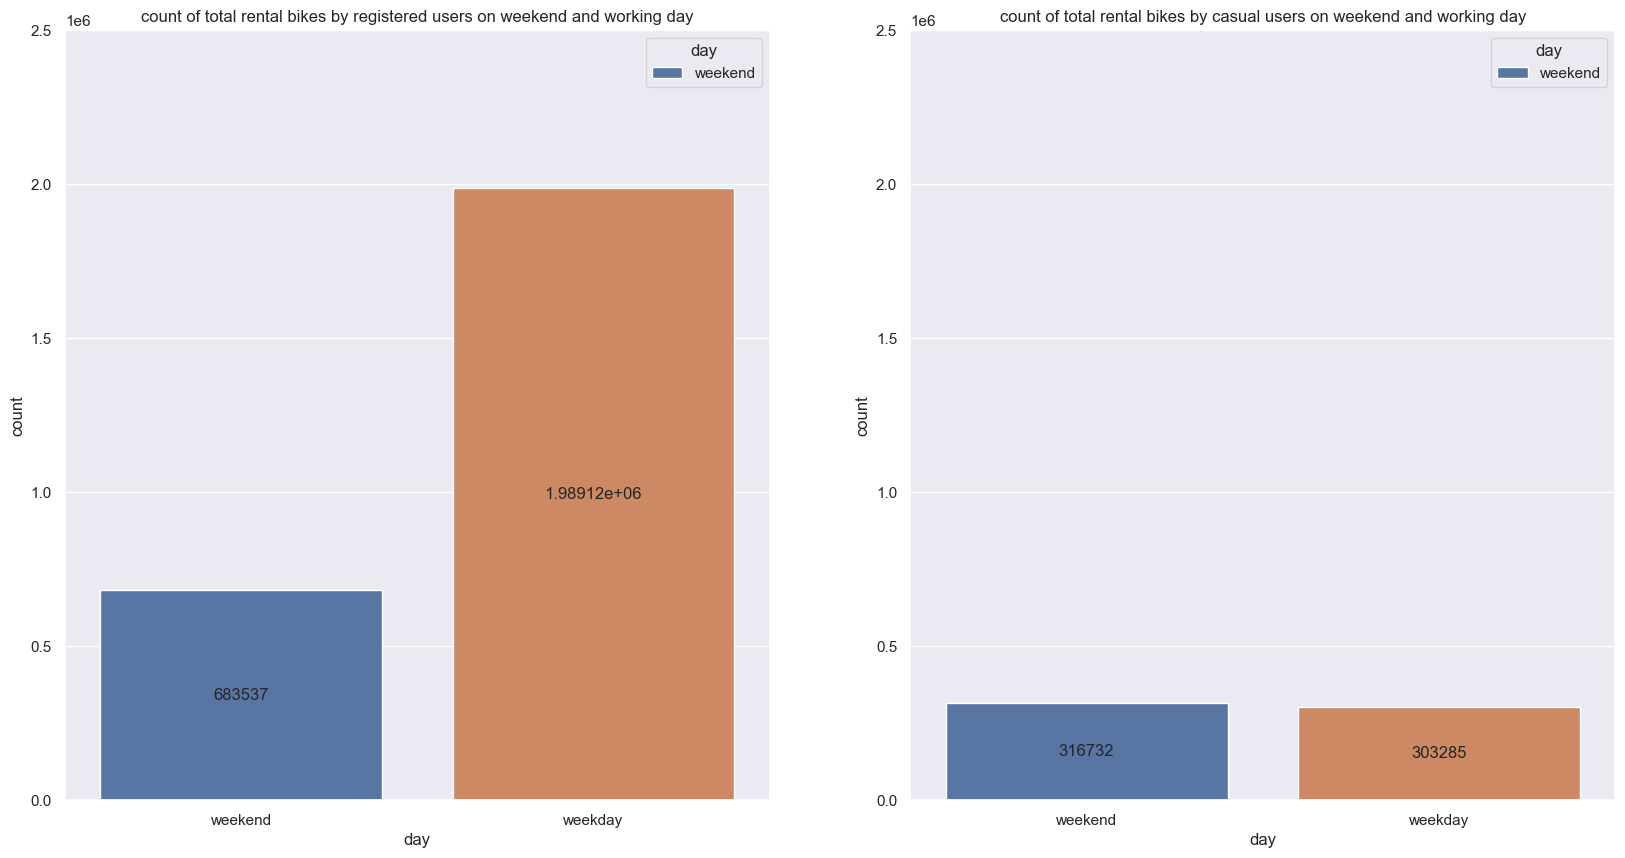

In [144]:
# total count for whole 2 years
# how many bikes are rented in each month?
legend_list= ["weekend", "weekday"]
palette = sns.color_palette()
plt.figure(figsize=(20,10))
plt.subplot(121, title = "count of total rental bikes by registered users on weekend and working day")
ax = sns.barplot(data = df_day, x = df_day["workingday"], y = df_day["registered"], errorbar = None, estimator = "sum")
plt.xlabel("day")
plt.xticks([0,1],
               ["weekend", "weekday"])
plt.ylabel("count")
plt.ylim(0,2500000)
plt.legend(title = "day", labels = legend_list )
for i in ax.containers:
  ax.bar_label(i, label_type="center")

plt.subplot(122, title = "count of total rental bikes by casual users on weekend and working day")
ax2 = sns.barplot(data = df_day, x =df_day["workingday"], y = df_day["casual"], errorbar = None, estimator = "sum")
plt.xlabel("day")
plt.xticks([0,1],
               ["weekend", "weekday"])
plt.ylabel("count")
plt.ylim(0,2500000)
plt.legend(title = "day", labels = legend_list )
for i in ax2.containers:
  ax2.bar_label(i, label_type="center")
plt.show()

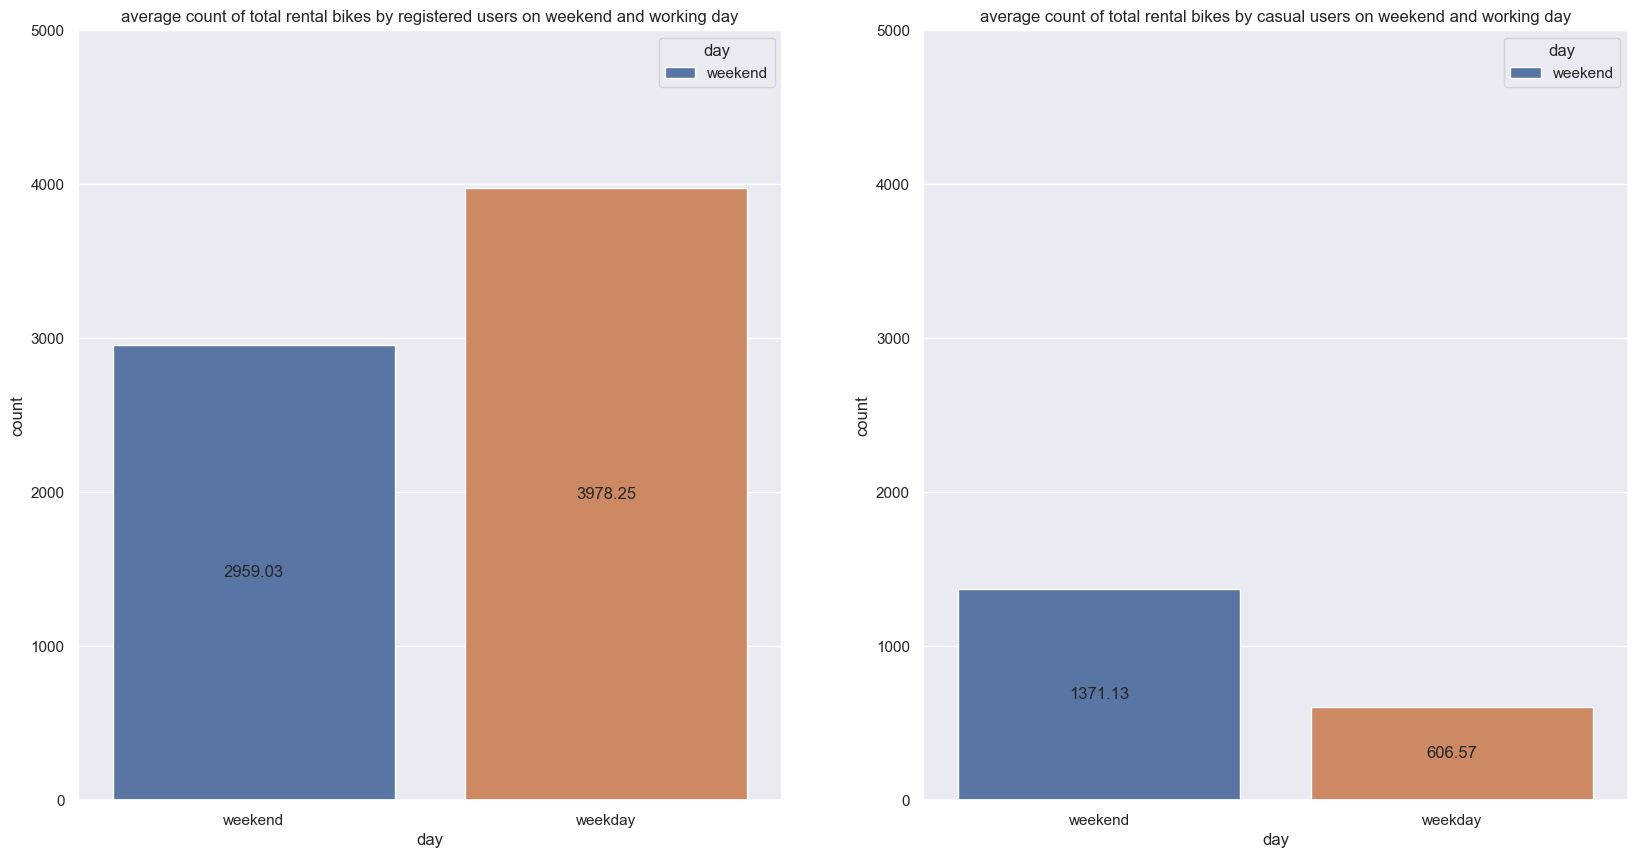

In [145]:
# monthly average total count for 12 months
# how many bikes are rented in each month?
legend_list= ["weekend", "weekday"]
palette = sns.color_palette()
plt.figure(figsize=(20,10))
plt.subplot(121, title = "average count of total rental bikes by registered users on weekend and working day")
ax = sns.barplot(data = df_day, x = df_day["workingday"], y = df_day["registered"], errorbar = None)
plt.xlabel("day")
plt.xticks([0,1],
               ["weekend", "weekday"])
plt.ylabel("count")
plt.ylim(0,5000)
plt.legend(title = "day", labels = legend_list )
for i in ax.containers:
  ax.bar_label(i, label_type="center")

plt.subplot(122, title = "average count of total rental bikes by casual users on weekend and working day")
ax2 = sns.barplot(data = df_day, x =df_day["workingday"], y = df_day["casual"], errorbar = None)
plt.xlabel("day")
plt.xticks([0,1],
               ["weekend", "weekday"])
plt.ylabel("count")
plt.ylim(0,5000)
plt.legend(title = "day", labels = legend_list )
for i in ax2.containers:
  ax2.bar_label(i, label_type="center")
plt.show()

C:\Users\satom\AppData\Local\Temp\ipykernel_13848\3113489845.py:5: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(data = df_hour, x = df_hour["hr"], y = df_hour["cnt"], hue = "season", err_style="bars", palette = palette)


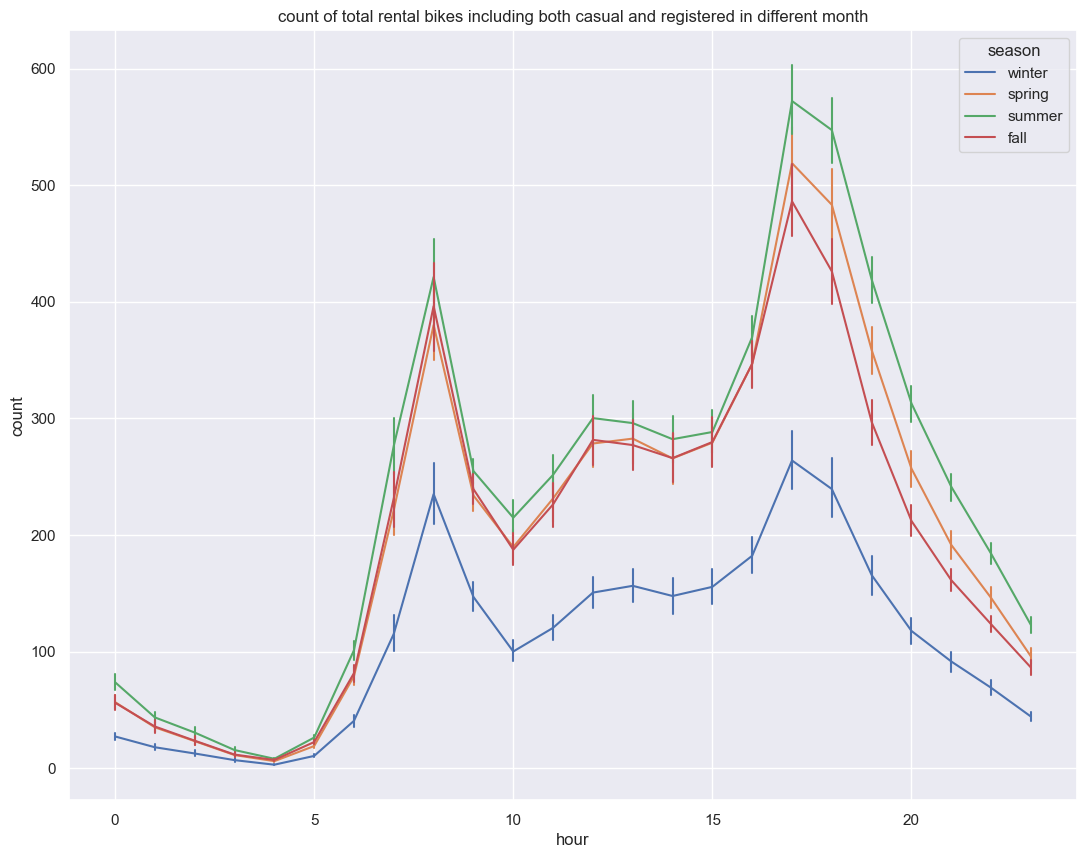

In [146]:
# season wise hourly distribution of bike rentals in total
legend_list= ["winter", "spring", "summer", "fall"]
palette = sns.color_palette()
plt.figure(figsize=(13,10))
sns.lineplot(data = df_hour, x = df_hour["hr"], y = df_hour["cnt"], hue = "season", err_style="bars", palette = palette)
plt.xlabel("hour")
plt.ylabel("count")
plt.title("count of total rental bikes including both casual and registered in different month")
plt.legend(title = "season", labels = legend_list, )
plt.show()

C:\Users\satom\AppData\Local\Temp\ipykernel_13848\3387859483.py:6: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(data = df_hour, x = df_hour["hr"], y = df_hour["registered"], hue = "season", err_style="bars", palette = palette)
C:\Users\satom\AppData\Local\Temp\ipykernel_13848\3387859483.py:12: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(data = df_hour, x = df_hour["hr"], y = df_hour["casual"], hue = "season", err_style="bars", palette = palette)


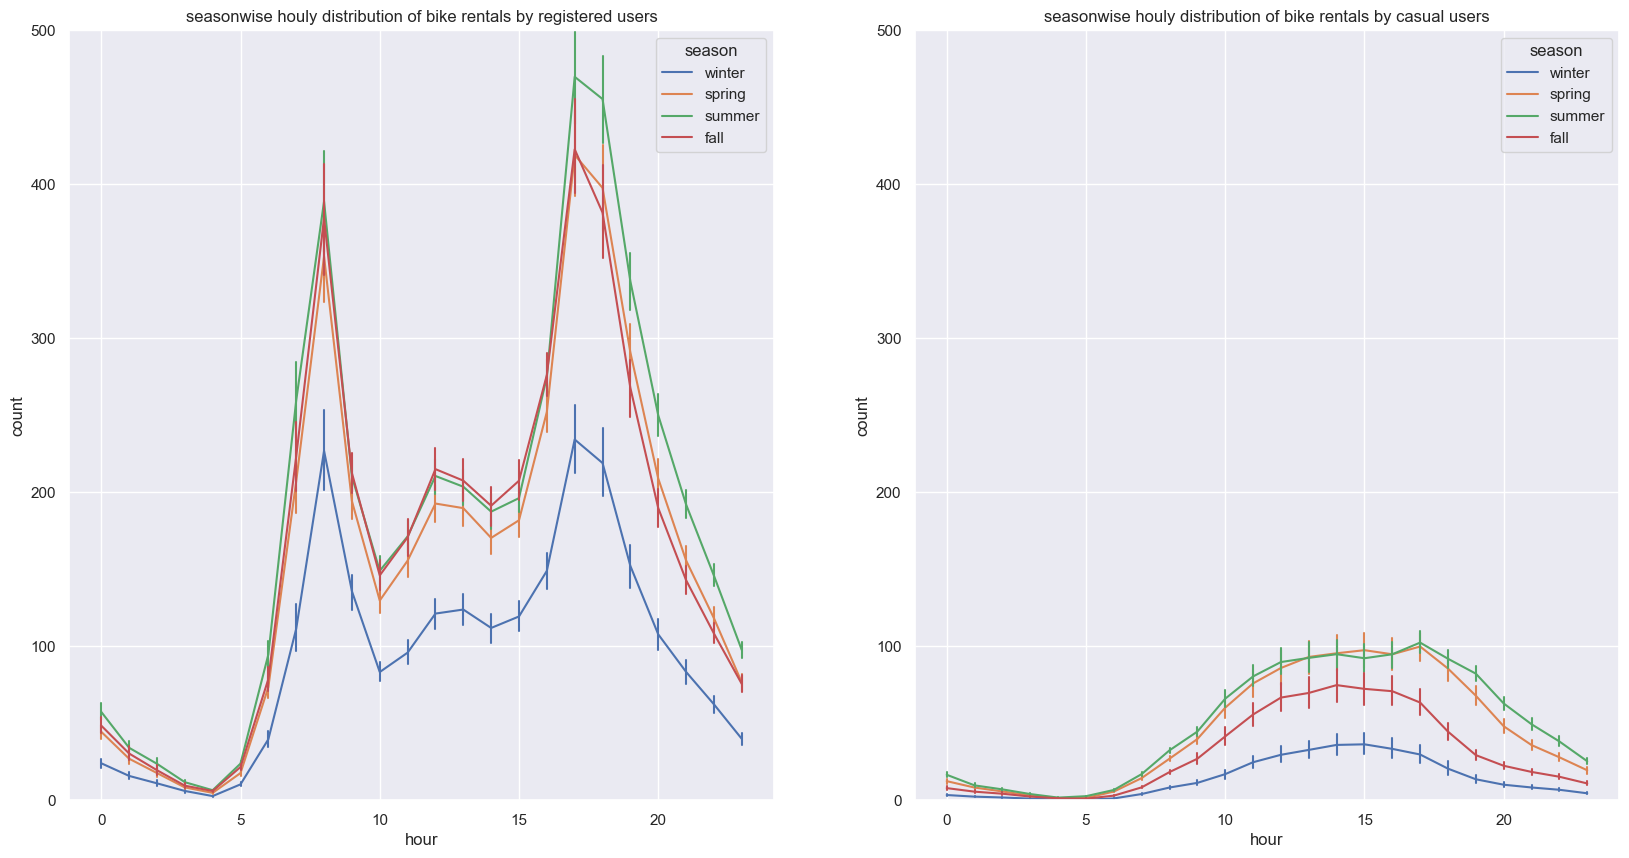

In [147]:
# season wise hourly distribution of bike rentals in casual and registed users
legend_list= ["winter", "spring", "summer", "fall"]
palette = sns.color_palette()
plt.figure(figsize=(20,10))
plt.subplot(121, title = "seasonwise houly distribution of bike rentals by registered users")
sns.lineplot(data = df_hour, x = df_hour["hr"], y = df_hour["registered"], hue = "season", err_style="bars", palette = palette)
plt.xlabel("hour")
plt.ylabel("count")
plt.legend(title = "season", labels = legend_list, )
plt.ylim(0,500)
plt.subplot(122, title = "seasonwise houly distribution of bike rentals by registered users")
sns.lineplot(data = df_hour, x = df_hour["hr"], y = df_hour["casual"], hue = "season", err_style="bars", palette = palette)
plt.xlabel("hour")
plt.ylabel("count")
plt.title("seasonwise houly distribution of bike rentals by casual users")
plt.legend(title = "season", labels = legend_list, )
plt.ylim(0,500)
plt.show()

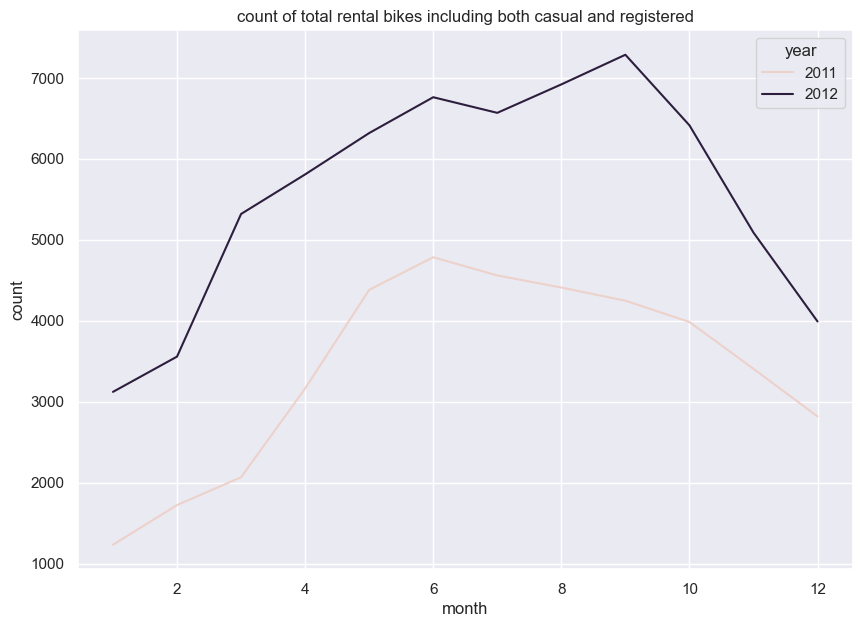

In [148]:
# monthly average total count for 12 months
# how many bikes are rented in each month?
plt.figure(figsize=(10,7))
ax = sns.lineplot(data = df_day, x = df_day["mnth"], y = df_day["cnt"], hue = df_day["year"], errorbar = None)
plt.xlabel("month")

plt.ylabel("count")
plt.title("count of total rental bikes including both casual and registered")
for i in ax.containers:
  ax.line_label(i,)
plt.show()

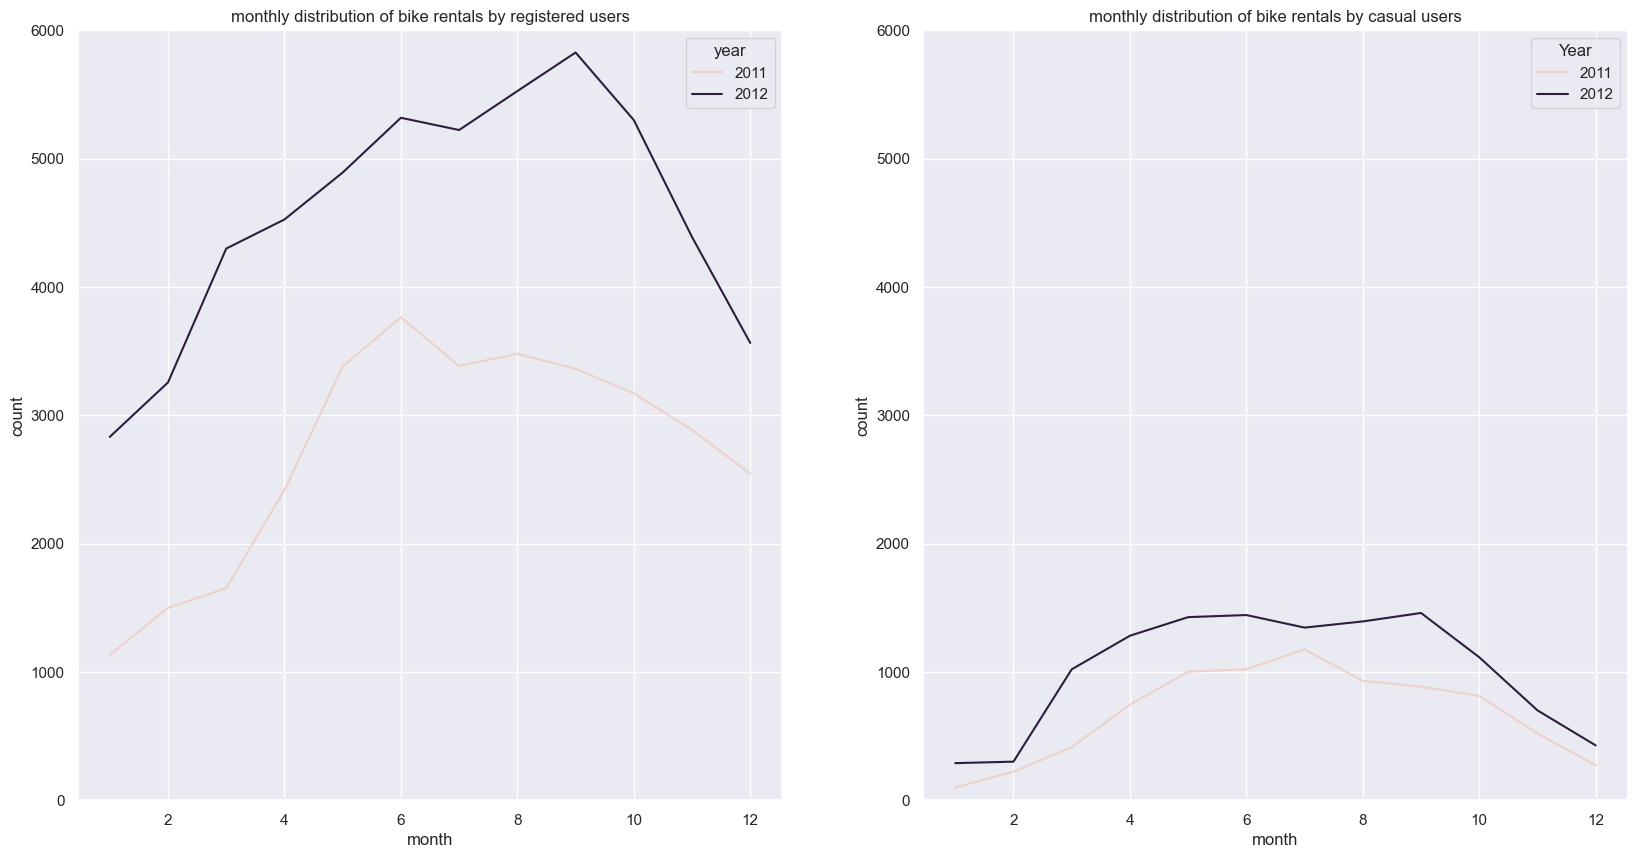

In [149]:
# monthly average total count for 12 months
# how many bikes are rented in each month?
legend_list= ["2011", "2012"]
palette = sns.color_palette()
plt.figure(figsize=(20,10))
plt.subplot(121, title = "monthly distribution of bike rentals by registered users")
ax = sns.lineplot(data = df_day, x = df_day["mnth"], y = df_day["registered"], hue = df_day["year"], errorbar = None)
plt.xlabel("month")
plt.ylabel("count")
plt.ylim(0,6000)
plt.subplot(122, title = "monthly distribution of bike rentals by casual users")
sns.lineplot(data = df_day, x =df_day["mnth"], y = df_day["casual"], hue = df_day["year"], errorbar = None)
plt.xlabel("month")
plt.ylabel("count")
plt.ylim(0,6000)
plt.legend(title = "Year", labels = legend_list, )
plt.show()

In [150]:
monthly_average = df_day.groupby(df_day.mnth)["cnt"].mean().round(2)
monthly_average

mnth
1     2176.34
2     2655.30
3     3692.26
4     4484.90
5     5349.77
6     5772.37
7     5563.68
8     5664.42
9     5766.52
10    5199.23
11    4247.18
12    3403.81
Name: cnt, dtype: float64

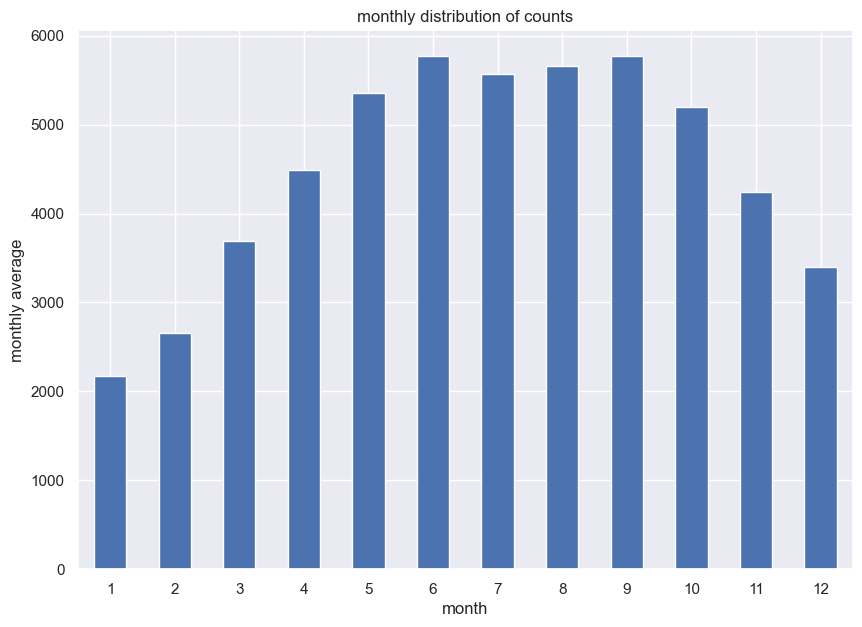

In [151]:
plt.figure(figsize=(10,7))
monthly_average.plot.bar()
plt.xlabel("month")
plt.xticks(rotation = 0)
plt.ylabel("monthly average")
plt.title("monthly distribution of counts")
plt.show()

In [152]:
monthly_cas_avg = df_day.groupby(df_day.mnth)["casual"].mean().round(2)


In [153]:
monthly_res_avg = df_day.groupby(df_day.mnth)["registered"].mean().round(2)


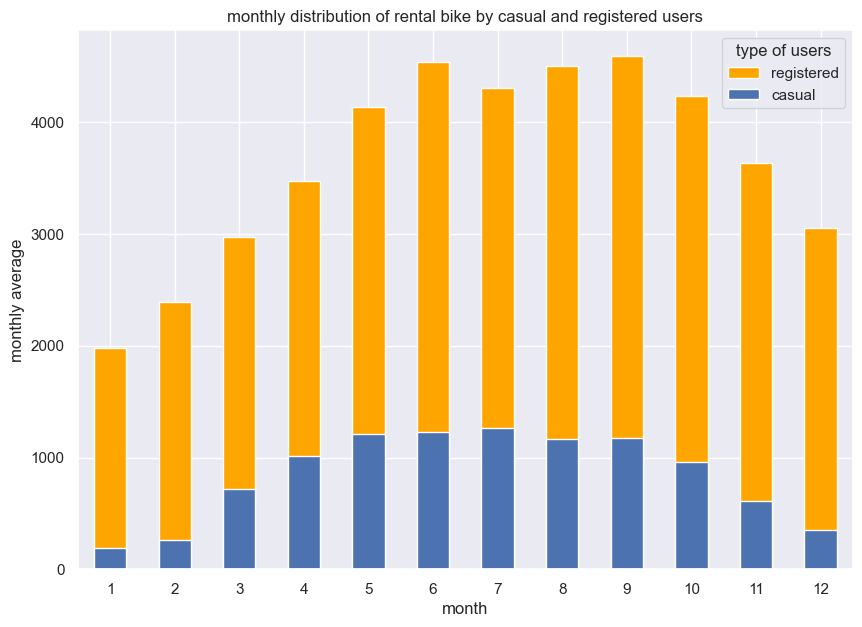

In [154]:
plt.figure(figsize=(10,7))
legend_list = ["registered", "casual"]
monthly_res_avg.plot.bar(color = "orange")
monthly_cas_avg.plot.bar(stacked = True)
plt.xlabel("month")
plt.xticks(rotation = 0)
plt.ylabel("monthly average")
plt.title("monthly distribution of rental bike by casual and registered users")
plt.legend(title = "type of users", labels = legend_list)
plt.show()

In [155]:
df_day.groupby(["mnth", "yr"])["cnt"].mean().round(2)

mnth  yr
1     0     1231.90
      1     3120.77
2     0     1721.96
      1     3556.45
3     0     2065.97
      1     5318.55
4     0     3162.33
      1     5807.47
5     0     4381.32
      1     6318.23
6     0     4783.73
      1     6761.00
7     0     4559.39
      1     6567.97
8     0     4409.39
      1     6919.45
9     0     4247.27
      1     7285.77
10    0     3984.23
      1     6414.23
11    0     3405.57
      1     5088.80
12    0     2816.87
      1     3990.74
Name: cnt, dtype: float64

In [156]:
df_day.groupby(["mnth","dteday"])["cnt"].mean()

mnth  dteday    
1     2011-01-01     985.0
      2011-01-02     801.0
      2011-01-03    1349.0
      2011-01-04    1562.0
      2011-01-05    1600.0
                     ...  
12    2012-12-27    2114.0
      2012-12-28    3095.0
      2012-12-29    1341.0
      2012-12-30    1796.0
      2012-12-31    2729.0
Name: cnt, Length: 731, dtype: float64

In [157]:
year2011 = df_day.loc[(df_day['dteday'] >= '2011-01-01') & (df_day['dteday'] <= '2011-12-31')]
year2012 = df_day.loc[(df_day['dteday'] >= '2012-01-01') & (df_day['dteday'] <= '2012-12-31')]
year2011

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
360      361 2011-12-27       1   0    12        0        2           1   
361      362 2011-12-28       1   0    12        0        3           1   
362      363 2011-12-29       1   0    12        0        4           1   
363      364 2011-12-30       1   0    12        0        5           1   
364      365 2011-12-31       1   0    12        0        6           0   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
360           2  0.325000  0.327633  0.762500   0.188450     103        1059   
361           1  0.299130  0.279974  0.503913   0.293961     255        2047   
362           1  0.248333  0.263892  0.574167   0.119412     254        2169   
363           1  0.311667  0.318812  0.636667   0.134337     491        2508   
364           1  0.410000  0.414121  0.615833   0.220154     665        1820   

      cnt  year  
0     985  2011  
1     801  2011  
2    1349  2011  
3    1562  2011  
4    1600  2011  
..    ...   ...  
360  1162  2011  
361  2302  2011  
362  2423  2011  
363  2999  2011  
364  2485  2011  

[365 rows x 17 columns]

In [158]:
year2012


instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
365      366 2012-01-01       1   1     1        0        0           0   
366      367 2012-01-02       1   1     1        1        1           0   
367      368 2012-01-03       1   1     1        0        2           1   
368      369 2012-01-04       1   1     1        0        3           1   
369      370 2012-01-05       1   1     1        0        4           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
365           1  0.370000  0.375621  0.692500   0.192167     686        1608   
366           1  0.273043  0.252304  0.381304   0.329665     244        1707   
367           1  0.150000  0.126275  0.441250   0.365671      89        2147   
368           2  0.107500  0.119337  0.414583   0.184700      95        2273   
369           1  0.265833  0.278412  0.524167   0.129987     140        3132   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  year  
365  2294  2012  
366  1951  2012  
367  2236  2012  
368  2368  2012  
369  3272  2012  
..    ...   ...  
726  2114  2012  
727  3095  2012  
728  1341  2012  
729  1796  2012  
730  2729  2012  

[366 rows x 17 columns]

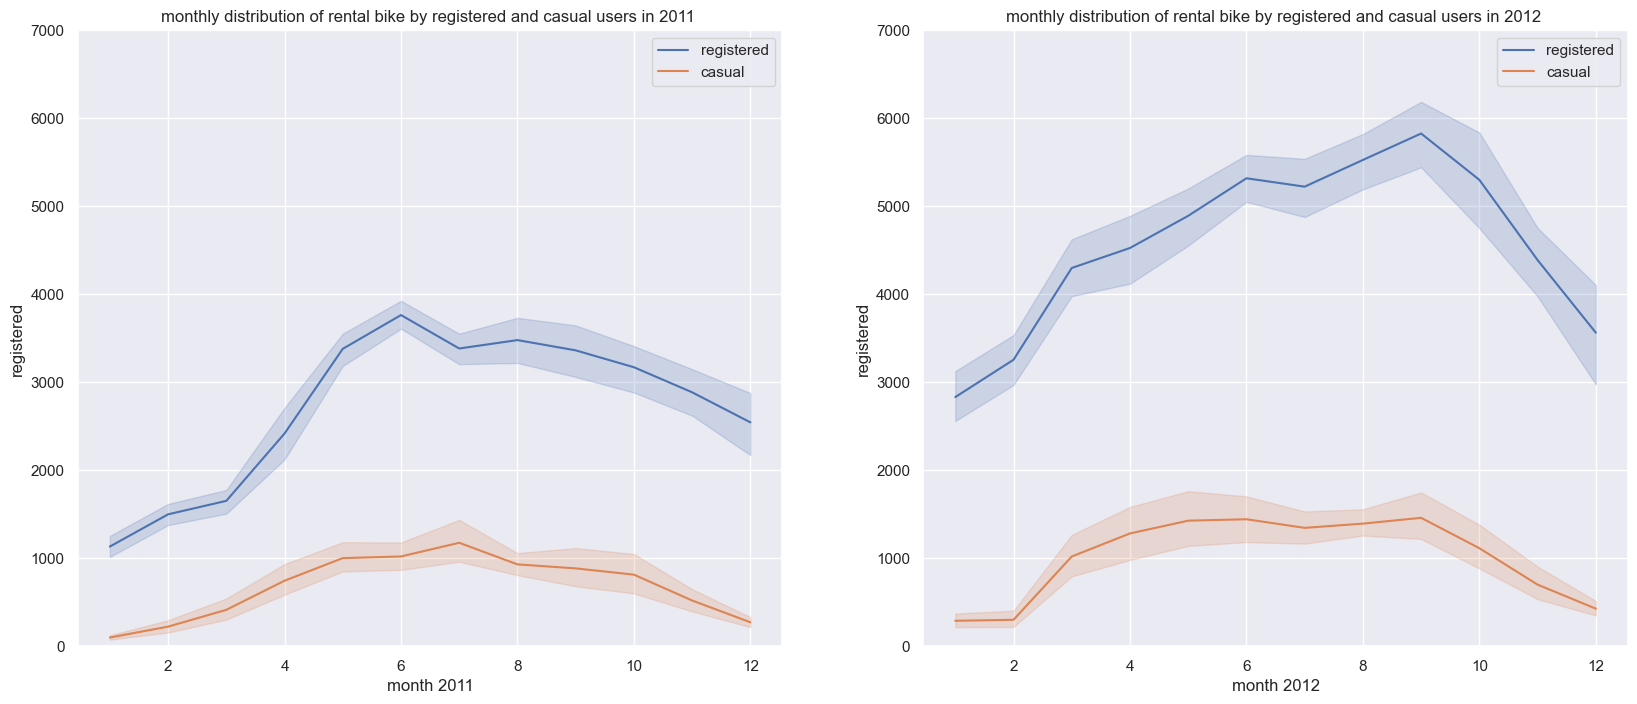

In [159]:
plt.figure(figsize= (20,8)) 
plt.subplot(121, title = "monthly distribution of rental bike by registered and casual users in 2011 ")
sns.lineplot(data = year2011, x = year2011['mnth'], y = year2011['registered'], label =  "registered")
sns.lineplot(data = year2011, x = year2011['mnth'], y = year2011['casual'], label =  "casual")
plt.ylim(0, 7000)
plt.xlabel("month 2011")
plt.subplot(122, title =  "monthly distribution of rental bike by registered and casual users in 2012 ")
sns.lineplot(data = year2012, x = year2012['mnth'], y = year2012['registered'], label =  "registered")
sns.lineplot(data = year2012, x = year2012['mnth'], y = year2012['casual'], label =  "casual")  
plt.ylim(0, 7000)
plt.xlabel("month 2012")

plt.show()

KeyError: 'temp_in_cel'

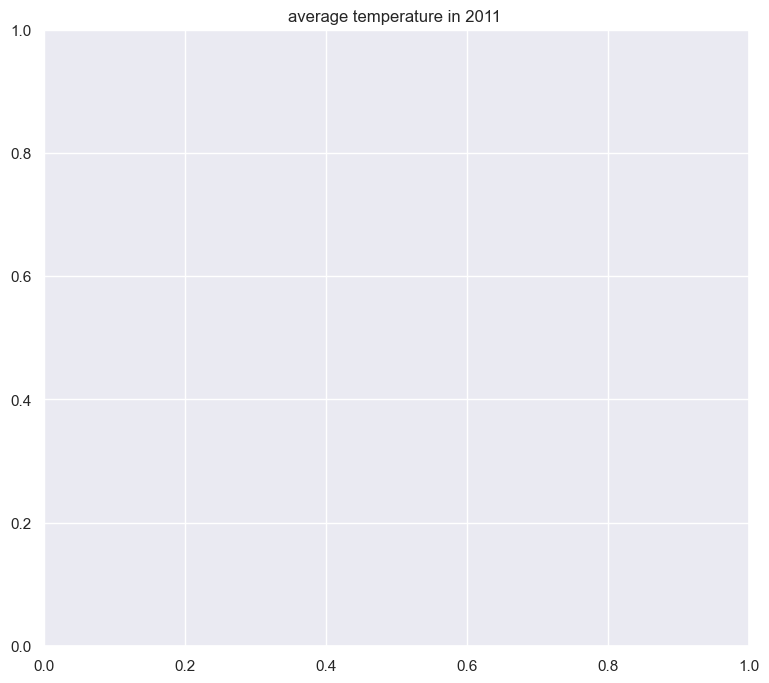

In [179]:
plt.figure(figsize= (20,8)) 
plt.subplot(121, title = "average temperature in 2011 ")
sns.lineplot(data = year2011, x = year2011['mnth'], y = year2011['temp_in_cel'], label =  "registered")
plt.ylim(-10, 35)
plt.xlabel("month 2011")
plt.subplot(122, title =  "average temperature in 2012 ")
sns.lineplot(data = year2012, x = year2012['mnth'], y = year2012['temp_in_cel'], label =  "registered")
plt.ylim(-10, 35)
plt.xlabel("month 2012")

plt.show()

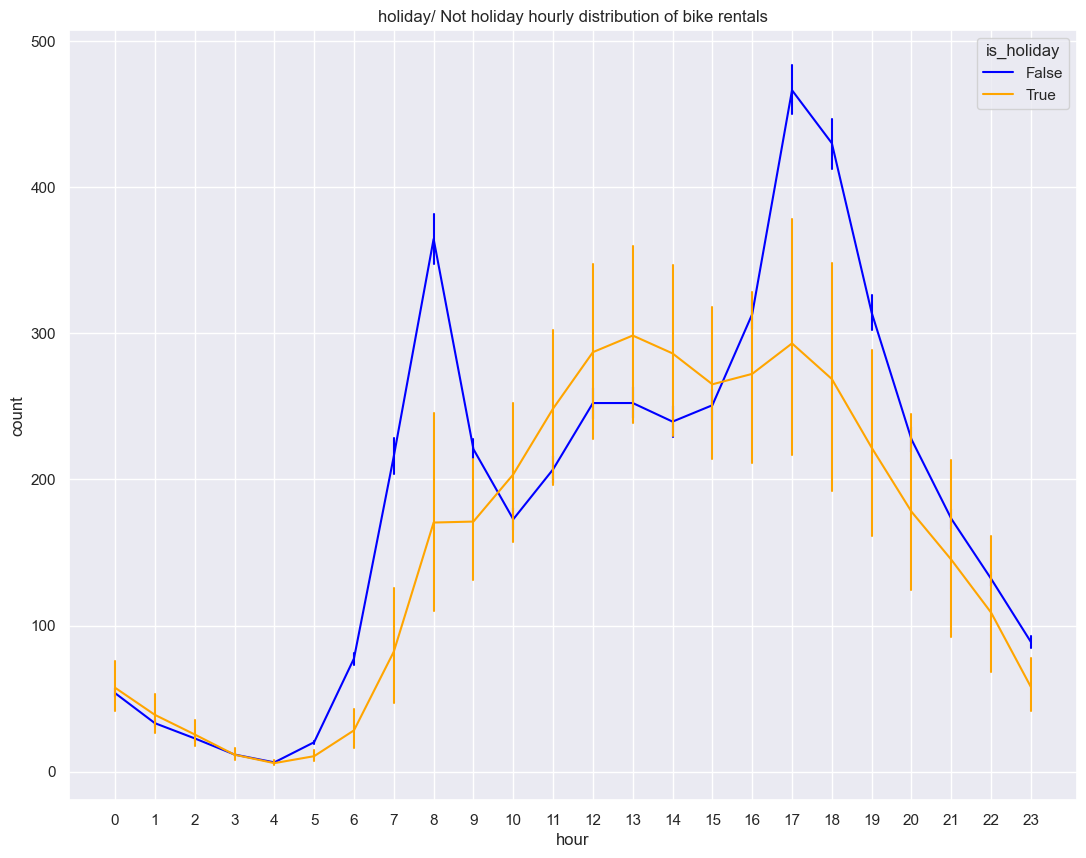

In [ ]:
legend_list= ["False", "True"]
palette = sns.color_palette()
plt.figure(figsize=(13,10))
ax = sns.lineplot(data = df_hour, x = df_hour["hr"], y = df_hour["cnt"], hue = "holiday", err_style = "bars", palette = ["blue", "orange"])
plt.xlabel("hour")
xmarks = [i for i in range(24)]
plt.xticks(xmarks)
plt.ylabel("count")
plt.title("holiday/ Not holiday hourly distribution of bike rentals")
plt.legend(title = "is_holiday", labels = legend_list, )
plt.show()

In [ ]:
df_hour["is_weekend"] = df_hour["workingday"].apply(lambda value: "True"
if value < 1 else "False")
df_hour

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1 2011-01-01       1   0     1   0        0        6           0   
1            2 2011-01-01       1   0     1   1        0        6           0   
2            3 2011-01-01       1   0     1   2        0        6           0   
3            4 2011-01-01       1   0     1   3        0        6           0   
4            5 2011-01-01       1   0     1   4        0        6           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375 2012-12-31       1   1    12  19        0        1           1   
17375    17376 2012-12-31       1   1    12  20        0        1           1   
17376    17377 2012-12-31       1   1    12  21        0        1           1   
17377    17378 2012-12-31       1   1    12  22        0        1           1   
17378    17379 2012-12-31       1   1    12  23        0        1           1   

       weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0               1  0.24  0.2879  0.81     0.0000       3          13   16   
1               1  0.22  0.2727  0.80     0.0000       8          32   40   
2               1  0.22  0.2727  0.80     0.0000       5          27   32   
3               1  0.24  0.2879  0.75     0.0000       3          10   13   
4               1  0.24  0.2879  0.75     0.0000       0           1    1   
...           ...   ...     ...   ...        ...     ...         ...  ...   
17374           2  0.26  0.2576  0.60     0.1642      11         108  119   
17375           2  0.26  0.2576  0.60     0.1642       8          81   89   
17376           1  0.26  0.2576  0.60     0.1642       7          83   90   
17377           1  0.26  0.2727  0.56     0.1343      13          48   61   
17378           1  0.26  0.2727  0.65     0.1343      12          37   49   

      is_weekend  
0           True  
1           True  
2           True  
3           True  
4           True  
...          ...  
17374      False  
17375      False  
17376      False  
17377      False  
17378      False  

[17379 rows x 18 columns]

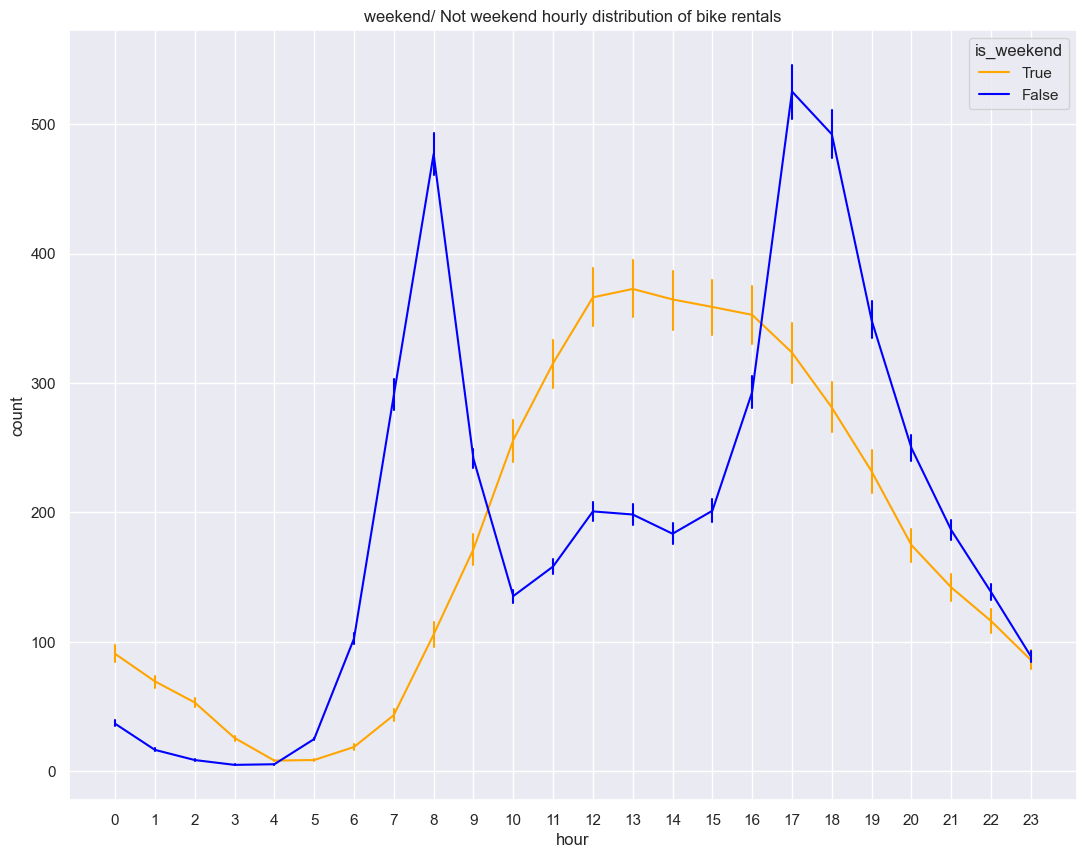

In [ ]:
palette = sns.color_palette()
plt.figure(figsize=(13,10))
ax = sns.lineplot(data = df_hour, x = df_hour["hr"], y = df_hour["cnt"], hue = df_hour["is_weekend"], err_style = "bars", palette = ["orange", "blue"])
plt.xlabel("hour")
xmarks = [i for i in range(24)]
plt.xticks(xmarks)
plt.ylabel("count")
plt.title("weekend/ Not weekend hourly distribution of bike rentals")
#plt.legend(title = "is_weekend" )
plt.show()

C:\Users\satom\AppData\Local\Temp\ipykernel_27064\2506441909.py:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.lineplot(data = df_hour, x = df_hour["hr"], y = df_hour["cnt"], hue = "holiday", err_style = "bars", palette = palette)
C:\Users\satom\AppData\Local\Temp\ipykernel_27064\2506441909.py:13: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.lineplot(data = df_hour, x = df_hour["hr"], y = df_hour["cnt"], hue = "is_weekend", err_style = "bars", palette = palette)


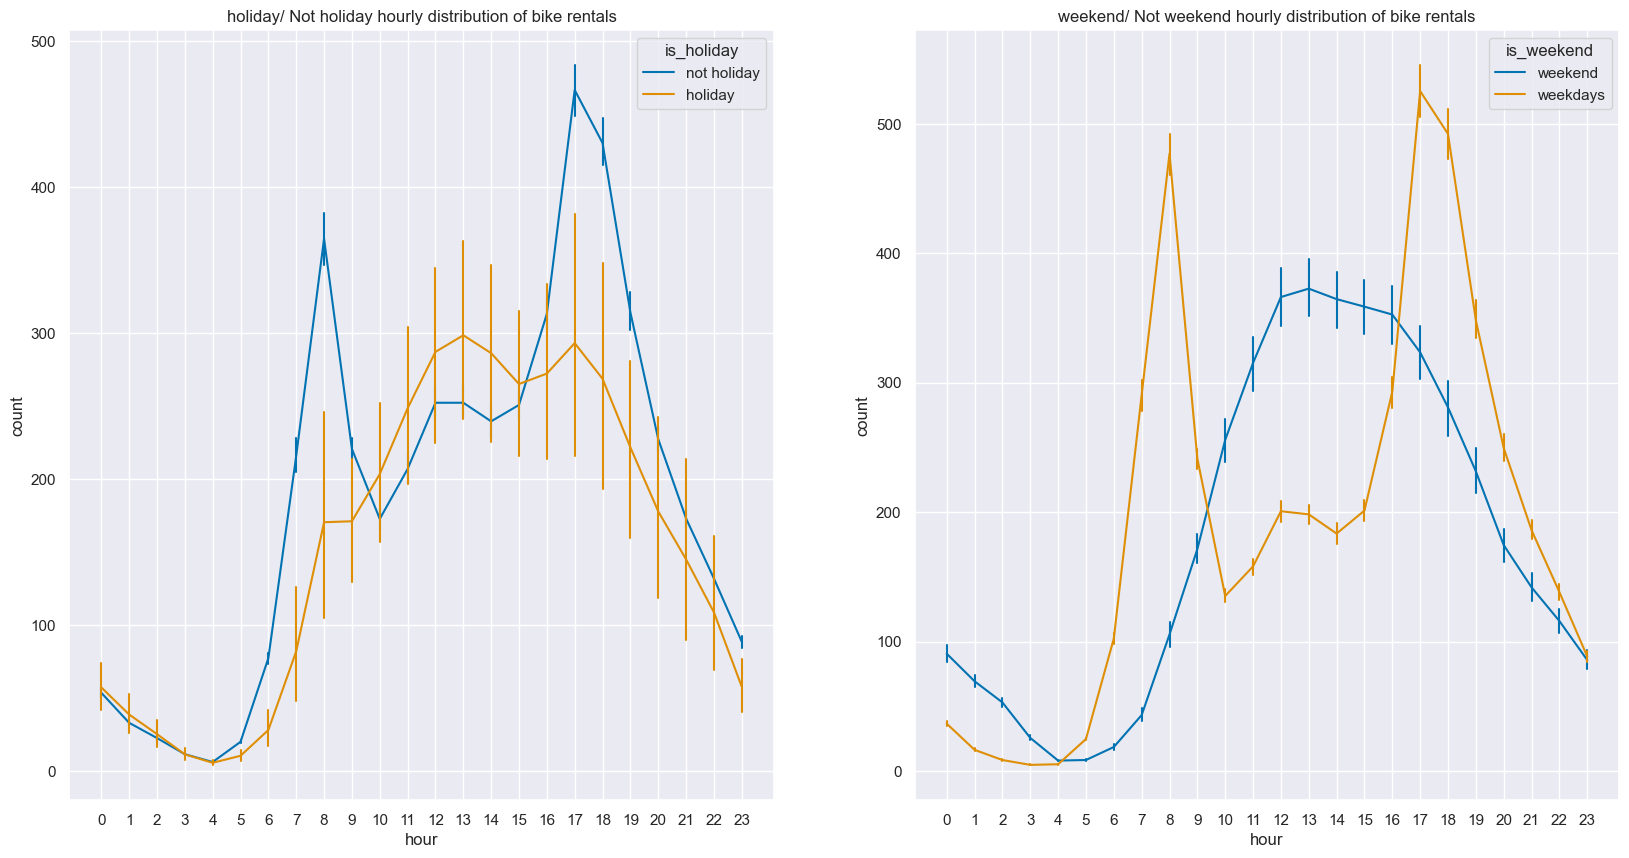

In [ ]:
legend_list= ["not holiday", "holiday"]
#palette = sns.color_palette()
plt.figure(figsize=(20,10))
plt.subplot(121, title = "holiday/ Not holiday hourly distribution of bike rentals")
ax = sns.lineplot(data = df_hour, x = df_hour["hr"], y = df_hour["cnt"], hue = "holiday", err_style = "bars", palette = palette)
plt.xlabel("hour")
xmarks = [i for i in range(24)]
plt.xticks(xmarks)
plt.ylabel("count")
plt.legend(title = "is_holiday", labels = legend_list, )

plt.subplot(122, title =  "weekend/ Not weekend hourly distribution of bike rentals")
ax = sns.lineplot(data = df_hour, x = df_hour["hr"], y = df_hour["cnt"], hue = "is_weekend", err_style = "bars", palette = palette)
plt.xlabel("hour")
xmarks = [i for i in range(24)]
plt.xticks(xmarks)
plt.ylabel("count")
legend_list2 = ["weekend", "weekdays"]
plt.legend(title = "is_weekend", labels = legend_list2)
plt.show()

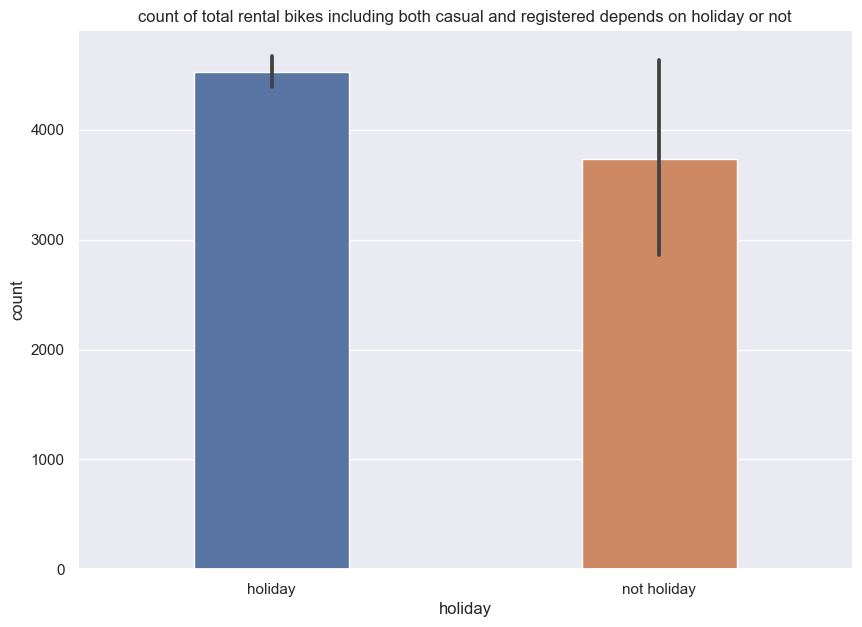

In [ ]:
# 1 is for holiday, 0 is for not holiday
xticks = ["not holiday", "holiday"]
plt.figure(figsize=(10,7))
sns.barplot(data = df_day, x = df_day["holiday"], y = df_day["cnt"], width = .4)
plt.xlabel("holiday")
plt.xticks([0,1],
               ["holiday", "not holiday"])
plt.ylabel("count")
plt.title("count of total rental bikes including both casual and registered depends on holiday or not")
plt.show()

C:\Users\satom\AppData\Local\Temp\ipykernel_27064\3679773215.py:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(data = df_hour, x = df_hour["hr"], y = df_hour["cnt"], hue = "workingday", err_style = "bars", palette = palette)


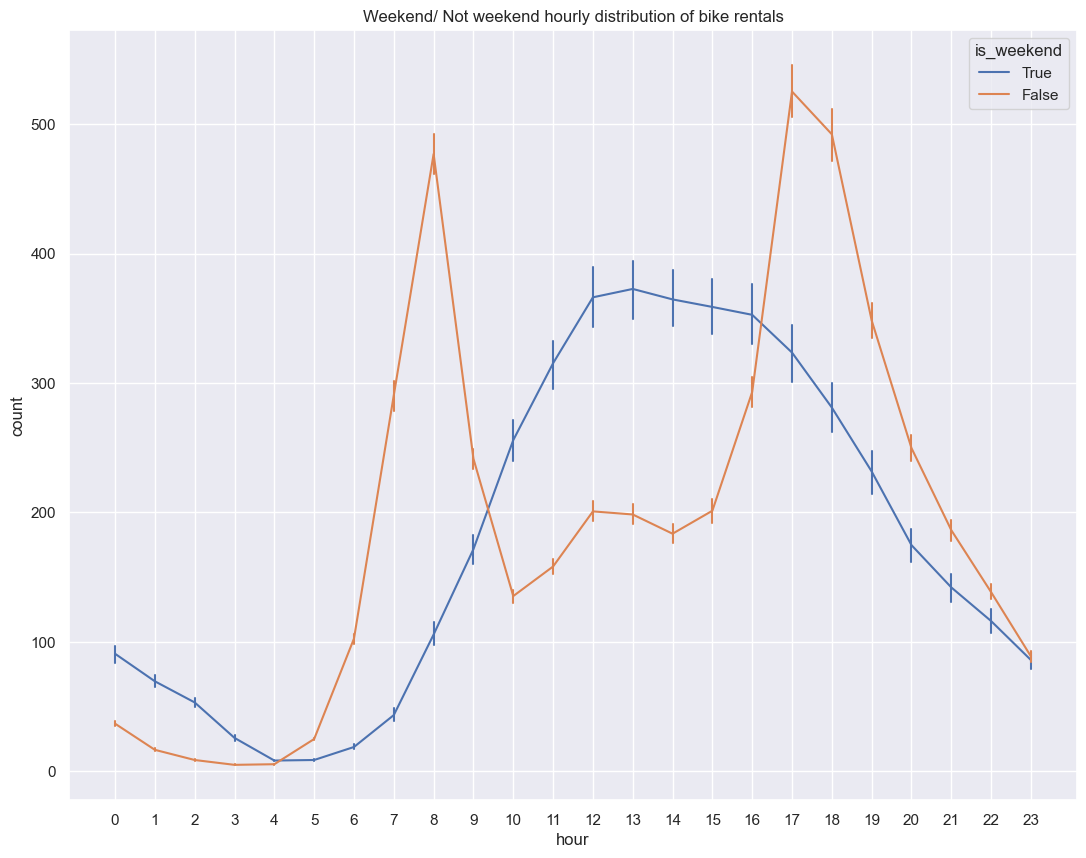

In [ ]:
legend_list= ["True", "False"]
palette = sns.color_palette()
plt.figure(figsize=(13,10))
sns.lineplot(data = df_hour, x = df_hour["hr"], y = df_hour["cnt"], hue = "workingday", err_style = "bars", palette = palette)
plt.xlabel("hour")
plt.ylabel("count")
x = np.arange(0,24)
plt.xticks(x)
plt.title("Weekend/ Not weekend hourly distribution of bike rentals")
plt.legend(title = "is_weekend", labels = legend_list, )
plt.show()

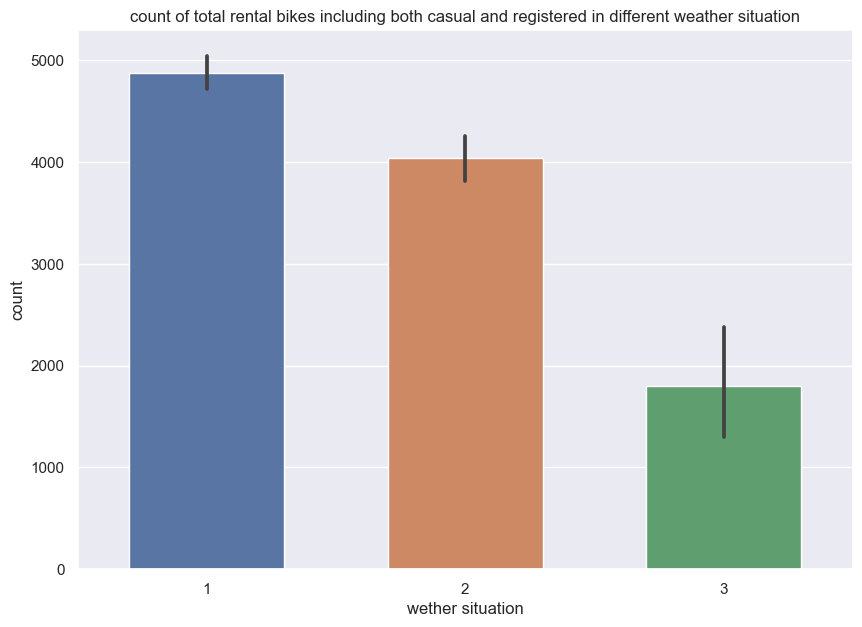

In [ ]:
# how many bikes are rented in each weather situation? 1 is clear, few clouds, 2 mist and cloudy, 3 ligh snow, rain or thunderstorm
plt.figure(figsize=(10,7))
sns.barplot(data = df_day, x = df_day["weathersit"], y = df_day["cnt"], width = .6)
plt.xlabel("wether situation")
""" plt.xticks([1,2,3],
           ["clear day", "mist and cloudy", "ligh rain, right snow"]) """
plt.ylabel("count")
plt.title("count of total rental bikes including both casual and registered in different weather situation")
plt.show()

In [ ]:
t_min = -8
t_max = 39

df_hour["temp_in_cel"] = t_min + df_hour["temp"] * (t_max -t_min)
df_hour.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt          year   temp_in_cel  
count  17379.000000  17379.000000  17379.000000  
mean     189.463088   2011.502561     15.358397  
std      181.387599      0.500008      9.050138  
min        1.000000   2011.000000     -7.060000  
25%       40.000000   2011.000000      7.980000  
50%      142.000000   2012.000000     15.500000  
75%      281.000000   2012.000000     23.020000  
max      977.000000   2012.000000     39.000000

In [ ]:
t_min_atemp = -16
t_max_atemp= 50

df_hour["feeling_temp_in_cel"] = t_min_atemp + df_hour["atemp"] * (t_max_atemp - t_min_atemp)
df_hour

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1 2011-01-01       1   0     1   0        0        6           0   
1            2 2011-01-01       1   0     1   1        0        6           0   
2            3 2011-01-01       1   0     1   2        0        6           0   
3            4 2011-01-01       1   0     1   3        0        6           0   
4            5 2011-01-01       1   0     1   4        0        6           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375 2012-12-31       1   1    12  19        0        1           1   
17375    17376 2012-12-31       1   1    12  20        0        1           1   
17376    17377 2012-12-31       1   1    12  21        0        1           1   
17377    17378 2012-12-31       1   1    12  22        0        1           1   
17378    17379 2012-12-31       1   1    12  23        0        1           1   

       weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0               1  0.24  0.2879  0.81     0.0000       3          13   16   
1               1  0.22  0.2727  0.80     0.0000       8          32   40   
2               1  0.22  0.2727  0.80     0.0000       5          27   32   
3               1  0.24  0.2879  0.75     0.0000       3          10   13   
4               1  0.24  0.2879  0.75     0.0000       0           1    1   
...           ...   ...     ...   ...        ...     ...         ...  ...   
17374           2  0.26  0.2576  0.60     0.1642      11         108  119   
17375           2  0.26  0.2576  0.60     0.1642       8          81   89   
17376           1  0.26  0.2576  0.60     0.1642       7          83   90   
17377           1  0.26  0.2727  0.56     0.1343      13          48   61   
17378           1  0.26  0.2727  0.65     0.1343      12          37   49   

       year  temp_in_cel  feeling_temp_in_cel  
0      2011         3.28               3.0014  
1      2011         2.34               1.9982  
2      2011         2.34               1.9982  
3      2011         3.28               3.0014  
4      2011         3.28               3.0014  
...     ...          ...                  ...  
17374  2012         4.22               1.0016  
17375  2012         4.22               1.0016  
17376  2012         4.22               1.0016  
17377  2012         4.22               1.9982  
17378  2012         4.22               1.9982  

[17379 rows x 20 columns]

In [ ]:
df_hour.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt   windspeed_a   temp_in_cel  feeling_temp_in_cel  
count  17379.000000  17379.000000  17379.000000         17379.000000  
mean     189.463088     12.736540     15.358397            15.401157  
std      181.387599      8.196795      9.050138            11.342114  
min        1.000000      0.000000     -7.060000           -16.000000  
25%       40.000000      7.001500      7.980000             5.997800  
50%      142.000000     12.998000     15.500000            15.996800  
75%      281.000000     16.997900     23.020000            24.999200  
max      977.000000     56.996900     39.000000            50.000000

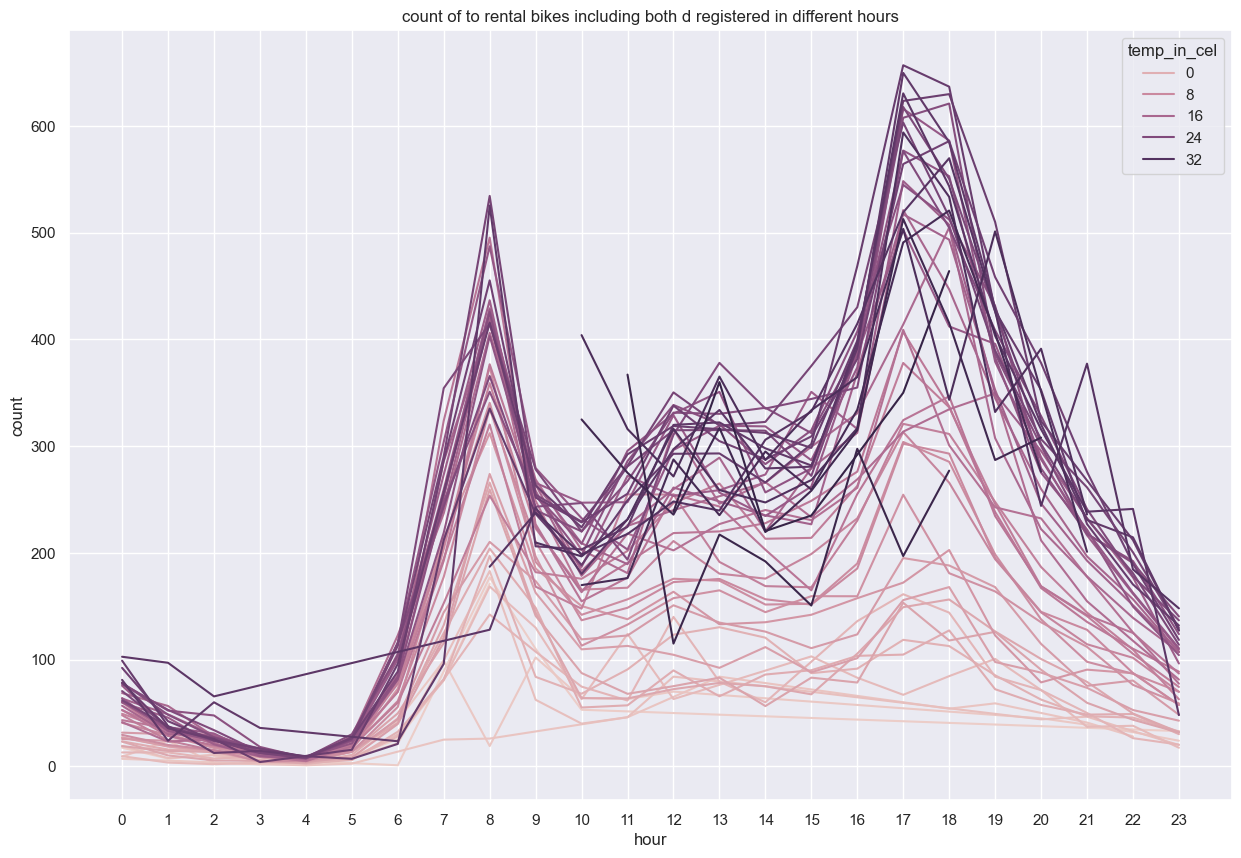

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(data= df_hour, x = df_hour["hr"], y = df_hour["cnt"], hue = df_hour["temp_in_cel"], errorbar= None)
plt.xlabel("hour")
plt.ylabel("count")
plt.title("count of to rental bikes including both d registered in different hours")
x = np.arange(0,24)
plt.xticks(x)
plt.show()

In [ ]:
df_hour["windspeed_a"] = df_hour["windspeed"] * 67
df_hour

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1 2011-01-01       1   0     1   0        0        6           0   
1            2 2011-01-01       1   0     1   1        0        6           0   
2            3 2011-01-01       1   0     1   2        0        6           0   
3            4 2011-01-01       1   0     1   3        0        6           0   
4            5 2011-01-01       1   0     1   4        0        6           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375 2012-12-31       1   1    12  19        0        1           1   
17375    17376 2012-12-31       1   1    12  20        0        1           1   
17376    17377 2012-12-31       1   1    12  21        0        1           1   
17377    17378 2012-12-31       1   1    12  22        0        1           1   
17378    17379 2012-12-31       1   1    12  23        0        1           1   

       weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0               1  0.24  0.2879  0.81     0.0000       3          13   16   
1               1  0.22  0.2727  0.80     0.0000       8          32   40   
2               1  0.22  0.2727  0.80     0.0000       5          27   32   
3               1  0.24  0.2879  0.75     0.0000       3          10   13   
4               1  0.24  0.2879  0.75     0.0000       0           1    1   
...           ...   ...     ...   ...        ...     ...         ...  ...   
17374           2  0.26  0.2576  0.60     0.1642      11         108  119   
17375           2  0.26  0.2576  0.60     0.1642       8          81   89   
17376           1  0.26  0.2576  0.60     0.1642       7          83   90   
17377           1  0.26  0.2727  0.56     0.1343      13          48   61   
17378           1  0.26  0.2727  0.65     0.1343      12          37   49   

       windspeed_a  temp_in_cel  feeling_temp_in_cel  
0           0.0000         3.28               3.0014  
1           0.0000         2.34               1.9982  
2           0.0000         2.34               1.9982  
3           0.0000         3.28               3.0014  
4           0.0000         3.28               3.0014  
...            ...          ...                  ...  
17374      11.0014         4.22               1.0016  
17375      11.0014         4.22               1.0016  
17376      11.0014         4.22               1.0016  
17377       8.9981         4.22               1.9982  
17378       8.9981         4.22               1.9982  

[17379 rows x 20 columns]

In [ ]:
df_hour.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt   windspeed_a   temp_in_cel  feeling_temp_in_cel  
count  17379.000000  17379.000000  17379.000000         17379.000000  
mean     189.463088     12.736540     15.358397            15.401157  
std      181.387599      8.196795      9.050138            11.342114  
min        1.000000      0.000000     -7.060000           -16.000000  
25%       40.000000      7.001500      7.980000             5.997800  
50%      142.000000     12.998000     15.500000            15.996800  
75%      281.000000     16.997900     23.020000            24.999200  
max      977.000000     56.996900     39.000000            50.000000

In [ ]:
""" # (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 #(only in hourly scale)
#decode normalization
def min_max_decode(x_norm, source_min, source_max):
  return ((x_norm * source_max) - (x_norm * source_min) + source_max + source_min) * 0.5

for t in df_hour["temp"]:
  df_hour["temperature"] = min_max_decode(t, -8, 39)

df_hour """

' # (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 #(only in hourly scale)\n#decode normalization\ndef min_max_decode(x_norm, source_min, source_max):\n  return ((x_norm * source_max) - (x_norm * source_min) + source_max + source_min) * 0.5\n\nfor t in df_hour["temp"]:\n  df_hour["temperature"] = min_max_decode(t, -8, 39)\n\ndf_hour '

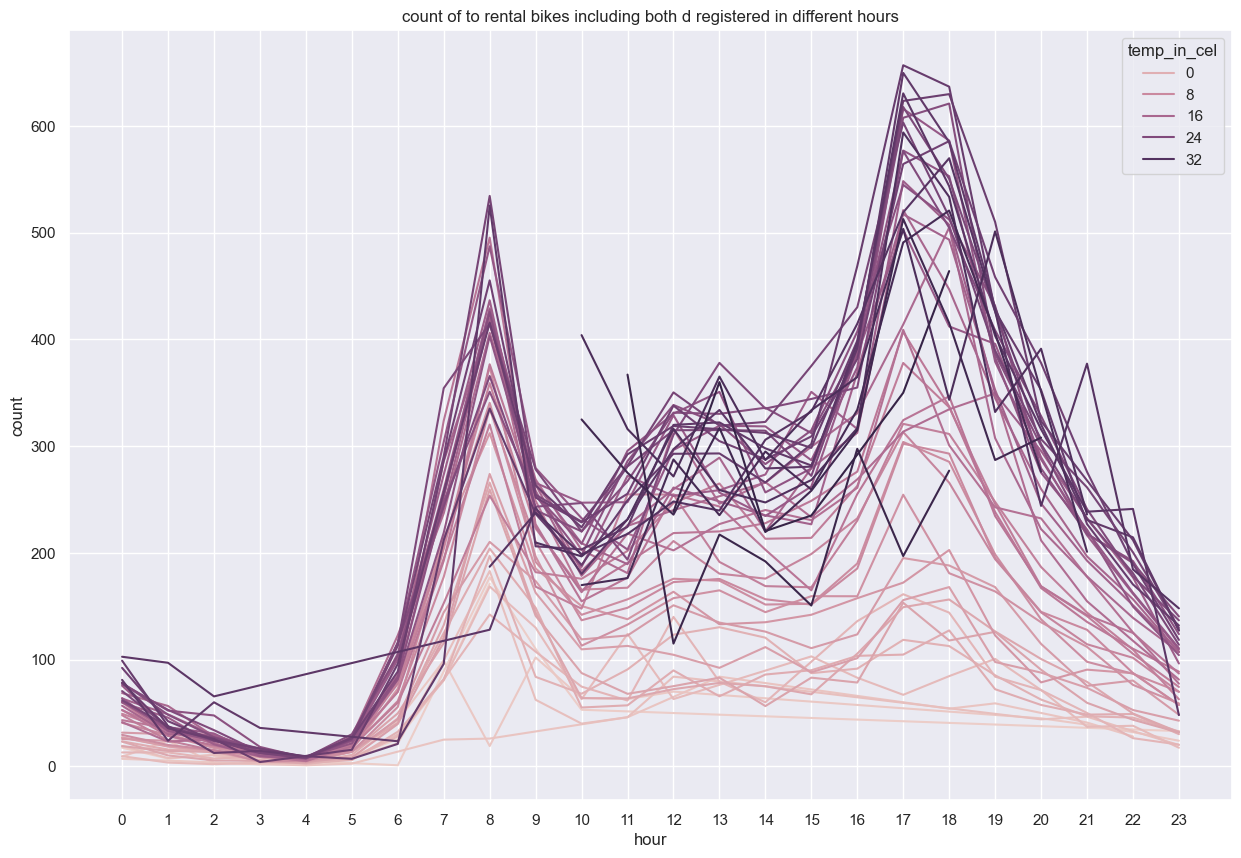

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(data= df_hour, x = df_hour["hr"], y = df_hour["cnt"], hue = df_hour["temp_in_cel"], errorbar= None)
plt.xlabel("hour")
plt.ylabel("count")
plt.title("count of to rental bikes including both d registered in different hours")
x = np.arange(0,24)
plt.xticks(x)
plt.show()

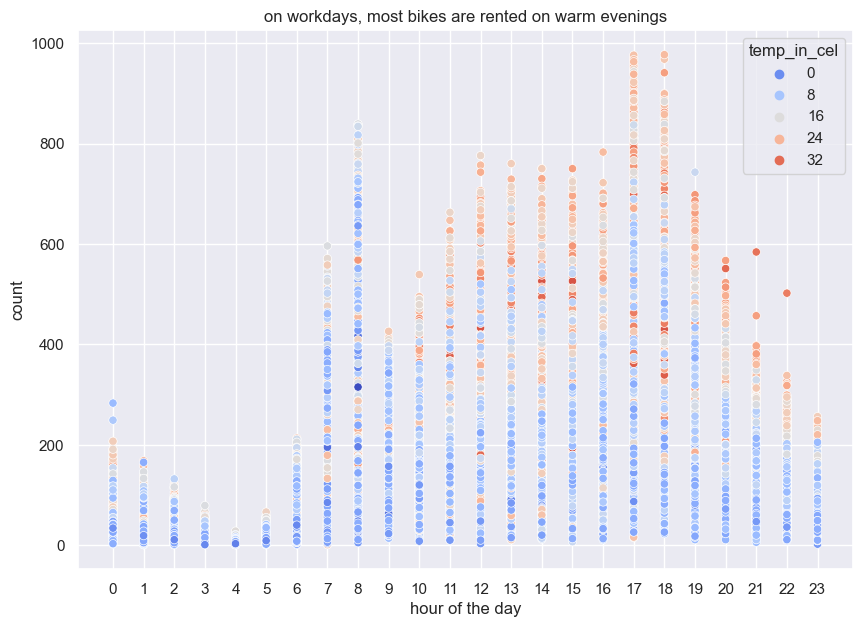

In [ ]:
# sprint 1 epic 2: On workdays, most of bikes are rented on warm mornings and evenings.
palette = sns.color_palette("coolwarm", as_cmap=True)
plt.figure(figsize=(10,7))
sns.scatterplot(data = df_hour, x = df_hour["hr"], y = df_hour["cnt"], hue = df_hour["temp_in_cel"], palette=palette)
plt.title("on workdays, most bikes are rented on warm evenings")
plt.xlabel("hour of the day")
plt.ylabel("count")
x = np.arange(0,24)
plt.xticks(x)
plt.show()

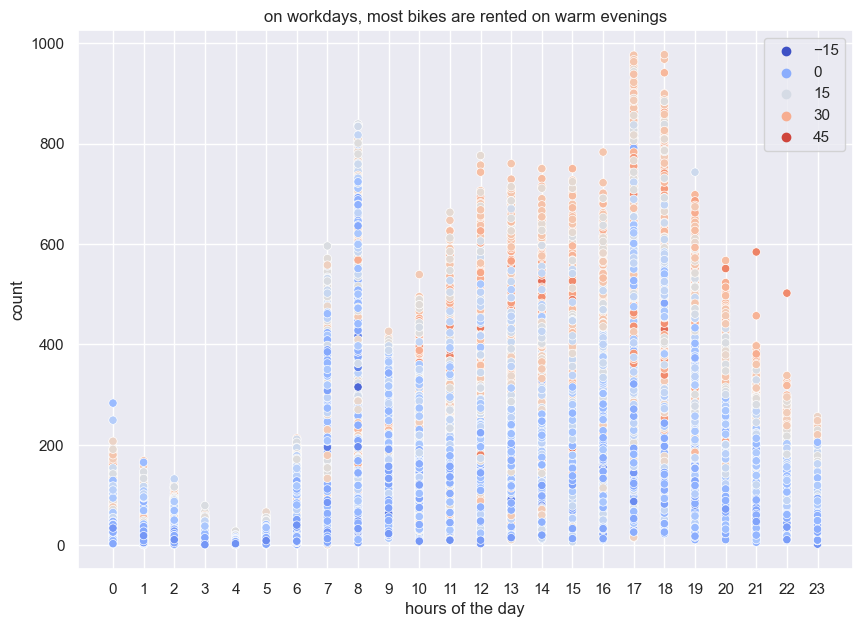

In [ ]:
palette = sns.color_palette("coolwarm", as_cmap=True)
plt.figure(figsize=(10,7))
sns.scatterplot(data = df_hour, x = df_hour["hr"], y = df_hour["cnt"], hue = "feeling_temp_in_cel", palette=palette)
plt.title("on workdays, most bikes are rented on warm evenings")
plt.xlabel("hours of the day")
plt.ylabel("count")
x = np.arange(0,24)
plt.xticks(x)

plt.legend()
plt.show()

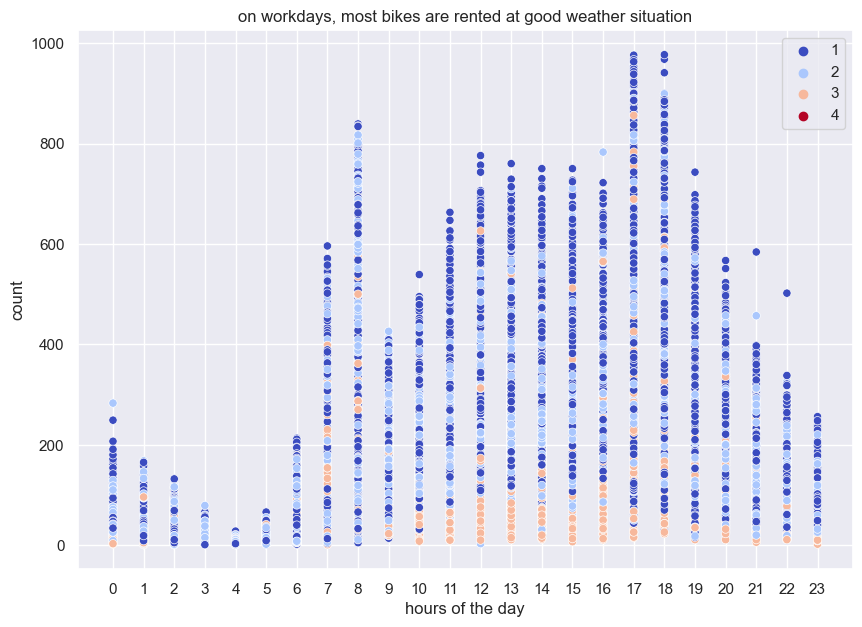

In [ ]:
palette = sns.color_palette("coolwarm", as_cmap=True)
plt.figure(figsize=(10,7))
sns.scatterplot(data = df_hour, x = df_hour["hr"], y = df_hour["cnt"], hue = "weathersit", palette=palette)
plt.title("on workdays, most bikes are rented at good weather situation")
plt.xlabel("hours of the day")
plt.ylabel("count")
x = np.arange(0,24)
plt.xticks(x)
plt.legend()
plt.show()

In [ ]:
(df_hour["weathersit"] == 1).sum()

11413

In [211]:
t_min = -8
t_max = 39

df_day["temp_in_cel"] = t_min + df_day["temp"] * (t_max -t_min)

In [212]:
t_min_atemp = -16
t_max_atemp = 50

df_day["feeling_temp_in_cel"] = t_min_atemp + df_day["atemp"] * (t_max_atemp -t_min_atemp)

In [213]:
df_day["windspeed_a"] = df_day["windspeed"]*67

In [ ]:
df_day

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  temp_in_cel  feeling_temp_in_cel  windspeed_a  
0     985     8.175849             7.999250    10.749882  
1     801     9.083466             7.346774    16.652113  
2    1349     1.229108            -3.499270    16.636703  
3    1562     1.400000            -1.999948    10.739832  
4    1600     2.666979            -0.868180    12.522300  
..    ...          ...                  ...          ...  
726  2114     3.945849            -1.041628    23.458911  
727  3095     3.906651             0.833036    10.416557  
728  1341     3.906651            -0.001600     8.333661  
729  1796     4.024151            -0.707800    23.500518  
730  2729     2.144151            -1.249858    10.374682  

[731 rows x 19 columns]

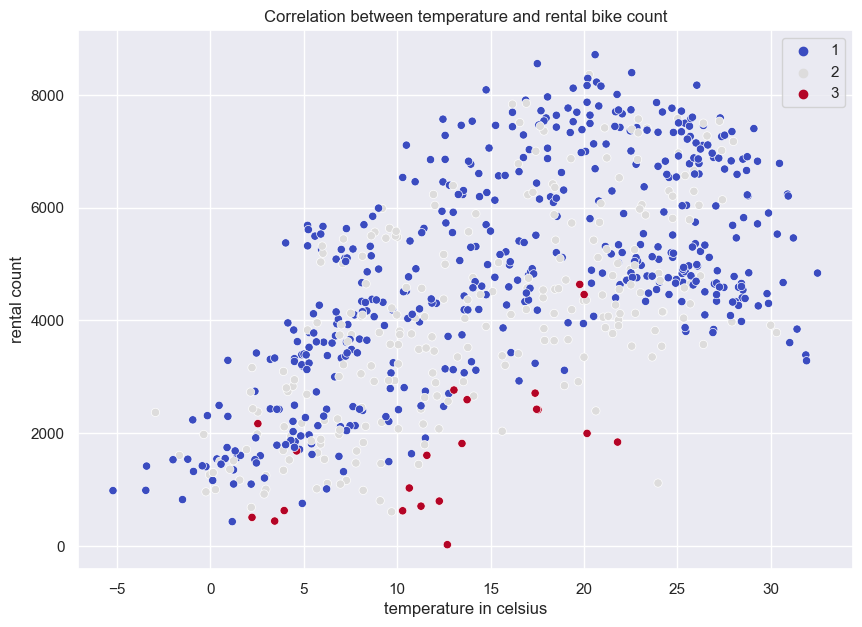

In [214]:
palette = sns.color_palette("coolwarm", as_cmap=True)
plt.figure(figsize=(10,7))
sns.scatterplot(data = df_day, x = df_day["temp_in_cel"], y = df_day["cnt"], hue = "weathersit", palette=palette)
#sns.regplot(data = df_day, x = df_day["temp_in_cel"], y = df_day["cnt"])
plt.title("Correlation between temperature and rental bike count")
plt.xlabel("temperature in celsius")
plt.ylabel("rental count")

plt.legend()
plt.show()

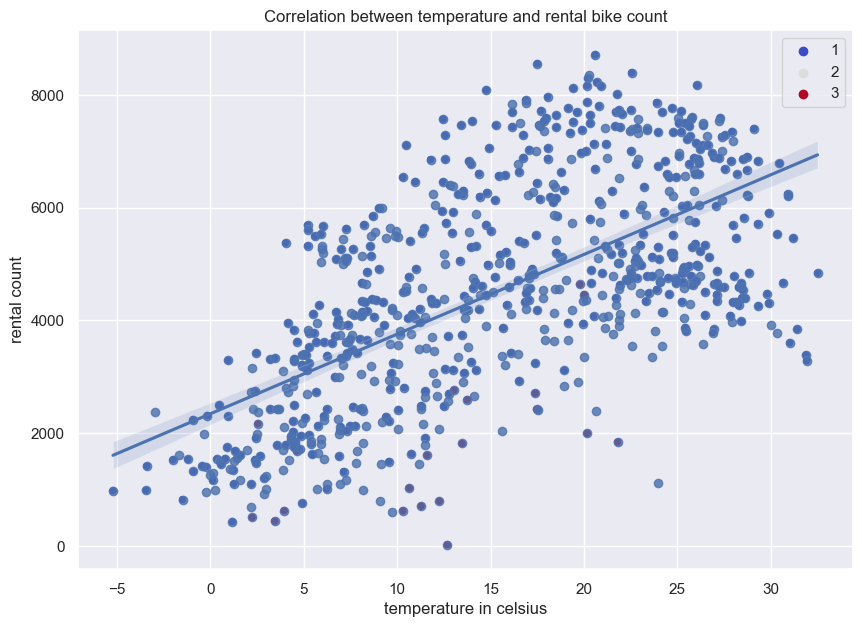

In [215]:
palette = sns.color_palette("coolwarm", as_cmap=True)
plt.figure(figsize=(10,7))
sns.scatterplot(data = df_day, x = df_day["temp_in_cel"], y = df_day["cnt"], hue = "weathersit", palette=palette)
sns.regplot(data = df_day, x = df_day["temp_in_cel"], y = df_day["cnt"])
plt.title("Correlation between temperature and rental bike count")
plt.xlabel("temperature in celsius")
plt.ylabel("rental count")

plt.legend()
plt.show()

to make better regplot, i remove weather situation 3 and 4

In [216]:
good_weathersit = df_day[(df_day.weathersit != 3) & (df_day.weathersit != 4)]
good_weathersit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 0 to 730
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              710 non-null    int64         
 1   dteday               710 non-null    datetime64[ns]
 2   season               710 non-null    int64         
 3   yr                   710 non-null    int64         
 4   mnth                 710 non-null    int64         
 5   holiday              710 non-null    int64         
 6   weekday              710 non-null    object        
 7   workingday           710 non-null    int64         
 8   weathersit           710 non-null    int64         
 9   temp                 710 non-null    float64       
 10  atemp                710 non-null    float64       
 11  hum                  710 non-null    float64       
 12  windspeed            710 non-null    float64       
 13  casual               710 non-null  

In [217]:
good_weathersit

instant     dteday  season  yr  mnth  holiday    weekday  workingday  \
0          1 2011-01-01       1   0     1        0   Saturday           0   
1          2 2011-01-02       1   0     1        0     Sunday           0   
2          3 2011-01-03       1   0     1        0     Monday           1   
3          4 2011-01-04       1   0     1        0    Tuesday           1   
4          5 2011-01-05       1   0     1        0  Wednesday           1   
..       ...        ...     ...  ..   ...      ...        ...         ...   
726      727 2012-12-27       1   1    12        0   Thursday           1   
727      728 2012-12-28       1   1    12        0     Friday           1   
728      729 2012-12-29       1   1    12        0   Saturday           0   
729      730 2012-12-30       1   1    12        0     Sunday           0   
730      731 2012-12-31       1   1    12        0     Monday           1   

     weathersit      temp  ...       hum  windspeed  casual  registered   cnt  \
0             2  0.344167  ...  0.805833   0.160446     331         654   985   
1             2  0.363478  ...  0.696087   0.248539     131         670   801   
2             1  0.196364  ...  0.437273   0.248309     120        1229  1349   
3             1  0.200000  ...  0.590435   0.160296     108        1454  1562   
4             1  0.226957  ...  0.436957   0.186900      82        1518  1600   
..          ...       ...  ...       ...        ...     ...         ...   ...   
726           2  0.254167  ...  0.652917   0.350133     247        1867  2114   
727           2  0.253333  ...  0.590000   0.155471     644        2451  3095   
728           2  0.253333  ...  0.752917   0.124383     159        1182  1341   
729           1  0.255833  ...  0.483333   0.350754     364        1432  1796   
730           2  0.215833  ...  0.577500   0.154846     439        2290  2729   

     year    monthly temp_in_cel  feeling_temp_in_cel  windspeed_a  
0    2011 2011-01-01    8.175849             7.999250    10.749882  
1    2011 2011-01-02    9.083466             7.346774    16.652113  
2    2011 2011-01-03    1.229108            -3.499270    16.636703  
3    2011 2011-01-04    1.400000            -1.999948    10.739832  
4    2011 2011-01-05    2.666979            -0.868180    12.522300  
..    ...        ...         ...                  ...          ...  
726  2012 2012-12-27    3.945849            -1.041628    23.458911  
727  2012 2012-12-28    3.906651             0.833036    10.416557  
728  2012 2012-12-29    3.906651            -0.001600     8.333661  
729  2012 2012-12-30    4.024151            -0.707800    23.500518  
730  2012 2012-12-31    2.144151            -1.249858    10.374682  

[710 rows x 21 columns]

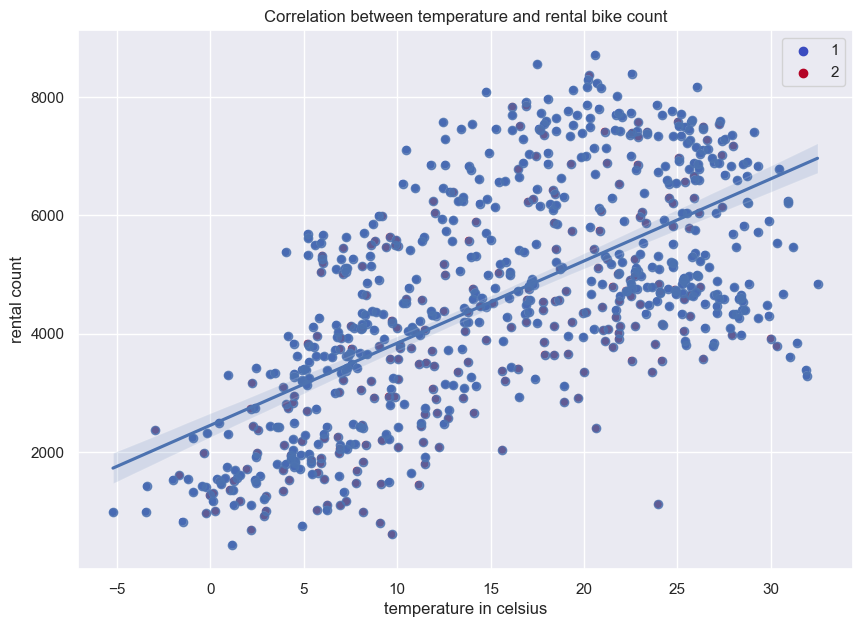

In [218]:
palette = sns.color_palette("coolwarm", as_cmap=True)
plt.figure(figsize=(10,7))
sns.scatterplot(data = good_weathersit, x = good_weathersit["temp_in_cel"], y = good_weathersit["cnt"], hue = "weathersit", palette=palette)
sns.regplot(data = good_weathersit, x = good_weathersit["temp_in_cel"], y = good_weathersit["cnt"])
plt.title("Correlation between temperature and rental bike count")
plt.xlabel("temperature in celsius")
plt.ylabel("rental count")

plt.legend()
plt.show()

linear Regression

In [219]:
X = DataFrame(good_weathersit, columns = ["temp_in_cel"])
y = DataFrame(good_weathersit, columns = ["cnt"])

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [164]:
reg.coef_

array([[138.85695712]])

In [165]:
#intercept
reg.intercept_

array([2450.11952974])

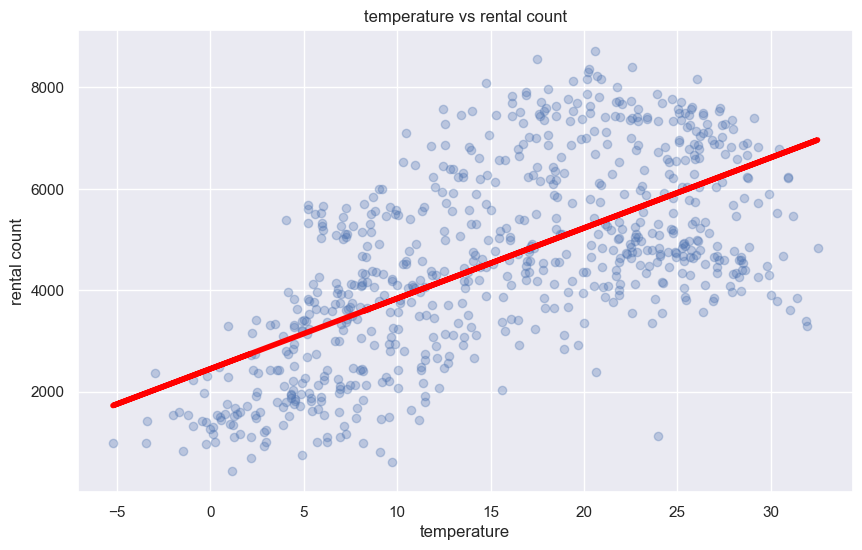

In [220]:
plt.figure(figsize = (10,6))
plt.scatter(X,y, alpha = 0.3)
plt.plot(X, reg.predict(X), color = "red", linewidth = 4 )
plt.title("temperature vs rental count")
plt.xlabel("temperature")
plt.ylabel("rental count")
plt.show()

In [167]:
reg.score(X,y)

0.4012403008177361

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


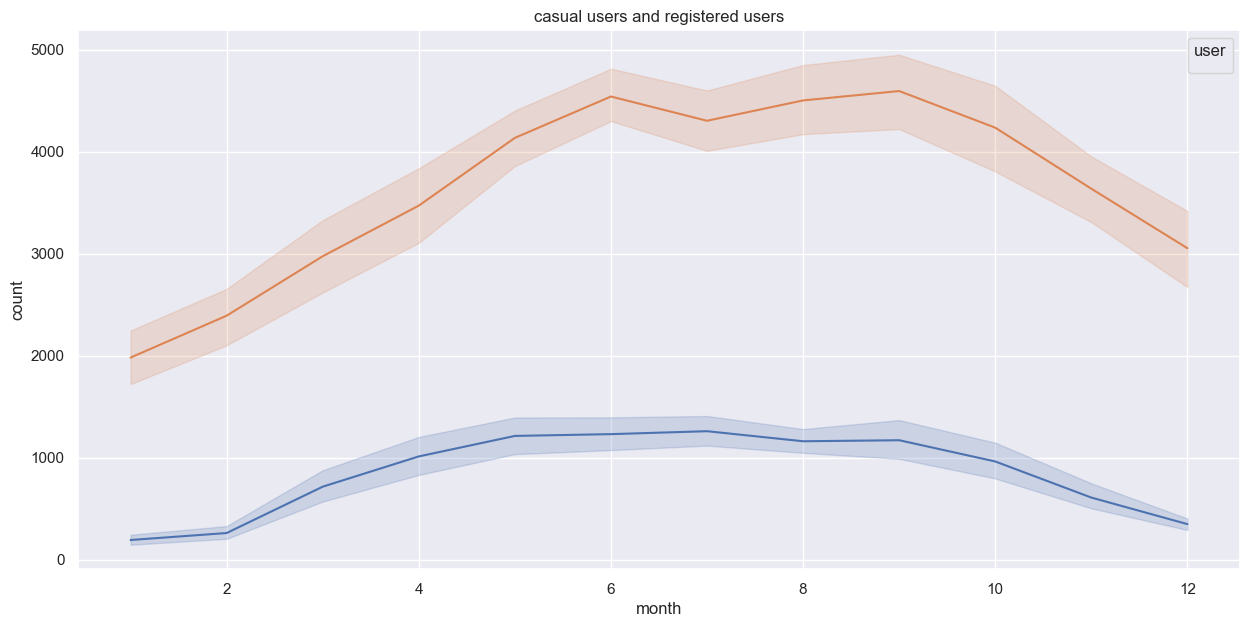

In [221]:
# stacked bar plot casual users and registered users

plt.figure(figsize=(15,7))
sns.lineplot(data = df_day, x = df_day["mnth"], y = df_day["casual"])
sns.lineplot(data = df_day, x = df_day["mnth"], y = df_day["registered"])
plt.title("casual users and registered users")
plt.xlabel("month")
plt.ylabel("count")
plt.legend(title= "user")
plt.show()

AttributeError: 'Figure' object has no attribute 'update_traces'

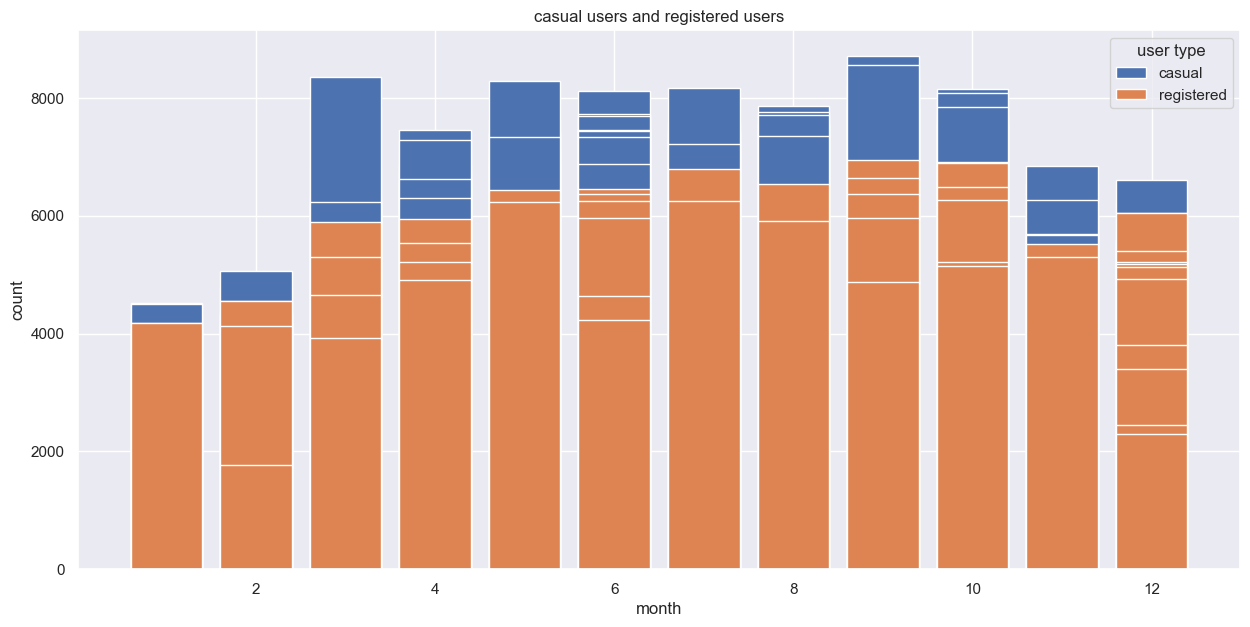

In [222]:
plt.figure(figsize=(15,7))
y1 = df_day["casual"]
y2 = df_day["registered"]
ax1 = plt.bar( x = df_day["mnth"], height = y1, bottom = y2, label = "casual")
ax2 = plt.bar(x = df_day["mnth"], height = y2, label = "registered")
plt.title("casual users and registered users")
plt.xlabel("month")
plt.ylabel("count")
plt.legend(title= "user type")
fig = fig.update_traces(marker_line_width=0)
plt.show()

In [ ]:
""" # doesn't work
plt.figure(figsize=(10,7))
y1 = df_hour["casual"]
y2 = df_hour["registered"]
plt.bar( x = df_hour["hr"], height = y1, bottom = y2, label = "casual")
plt.bar(x = df_hour["hr"], height = y2, label = "registered")
plt.title("casual users and registered users")
plt.xlabel("hours of the day")
plt.ylabel("count")
plt.legend(title= "user type")
plt.show() """

' # doesn\'t work\nplt.figure(figsize=(10,7))\ny1 = df_hour["casual"]\ny2 = df_hour["registered"]\nplt.bar( x = df_hour["hr"], height = y1, bottom = y2, label = "casual")\nplt.bar(x = df_hour["hr"], height = y2, label = "registered")\nplt.title("casual users and registered users")\nplt.xlabel("hours of the day")\nplt.ylabel("count")\nplt.legend(title= "user type")\nplt.show() '

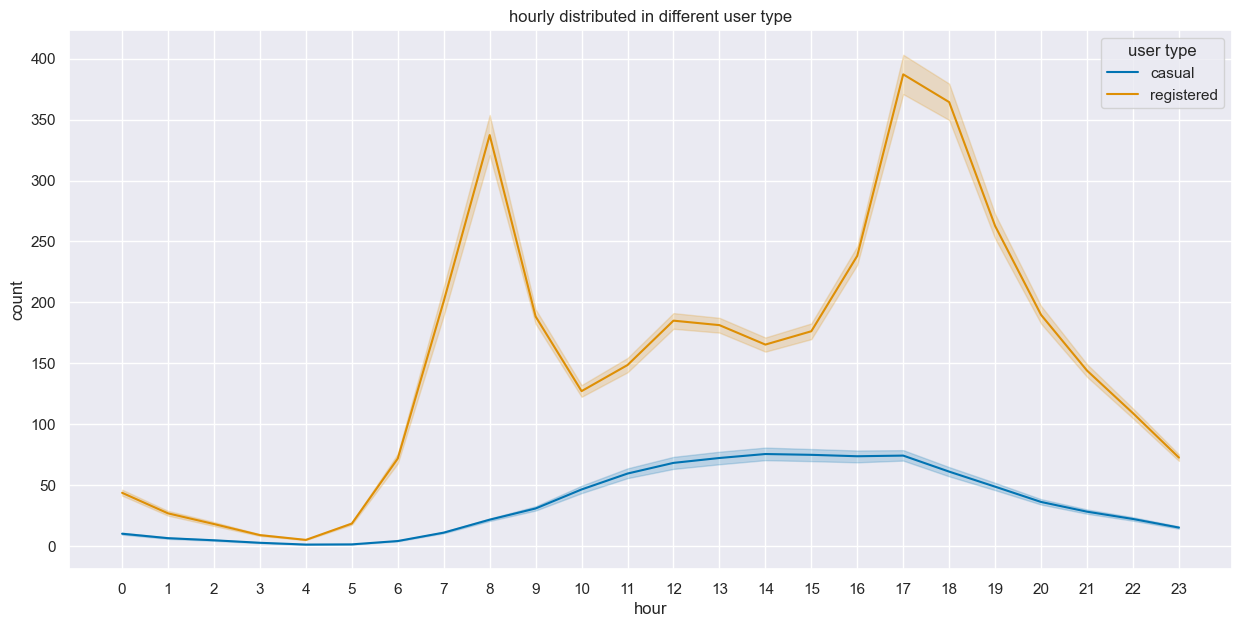

In [223]:

plt.figure(figsize=(15,7))
palette = sns.set_palette("colorblind")
sns.lineplot(data = df_hour, x = df_hour["hr"], y = df_hour["casual"], err_style = "band", palette = palette, label = "casual")
sns.lineplot(data = df_hour, x = df_hour["hr"], y = df_hour["registered"], err_style = "band", palette = palette, label = "registered")
plt.xlabel("hour")
plt.ylabel("count")
x = np.arange(0,24)
plt.xticks(x)
plt.title("hourly distributed in different user type")
plt.legend(title = "user type")
plt.show()

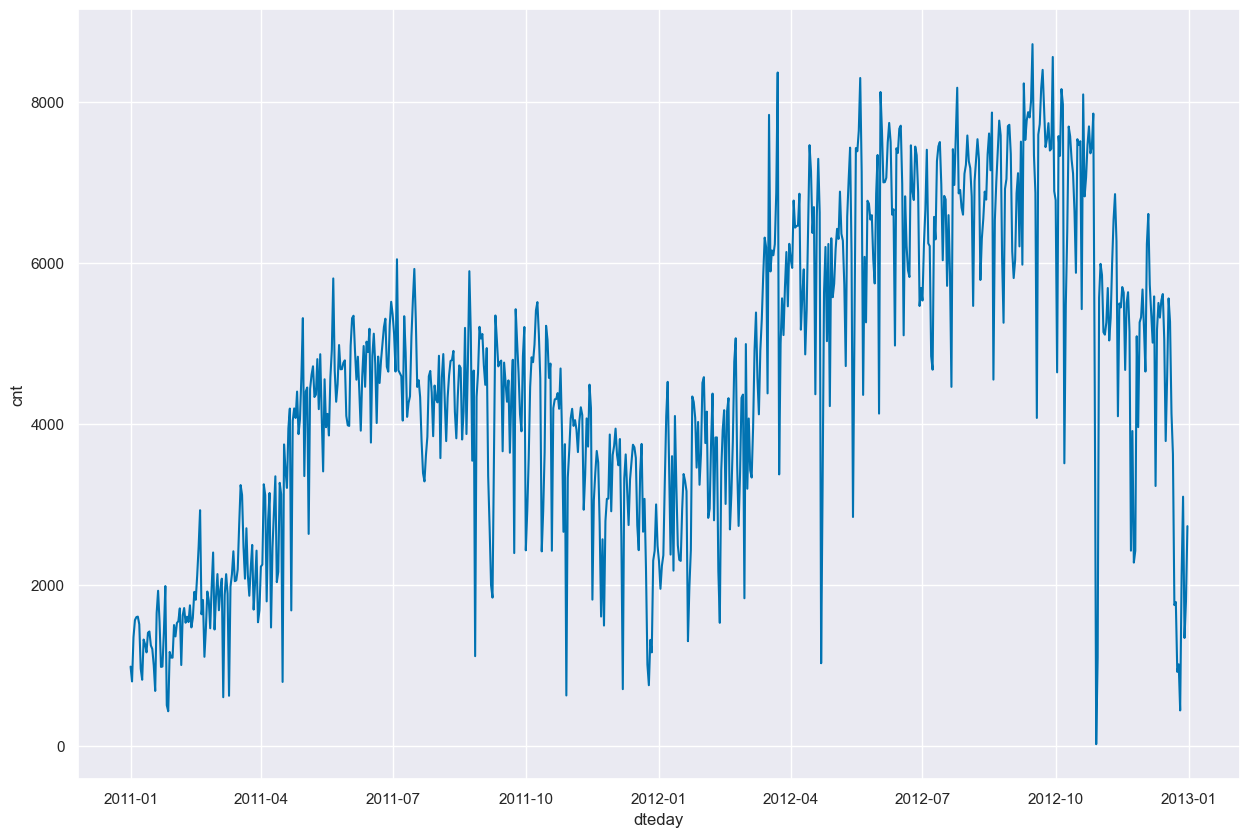

In [ ]:
date = df_day["dteday"]
count = df_day["cnt"]
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x =date, y =count, estimator = sum)
#ax.set_xlim("2011-01-01", "2011-02-28")
plt.xticks(rotation=0)
plt.show()

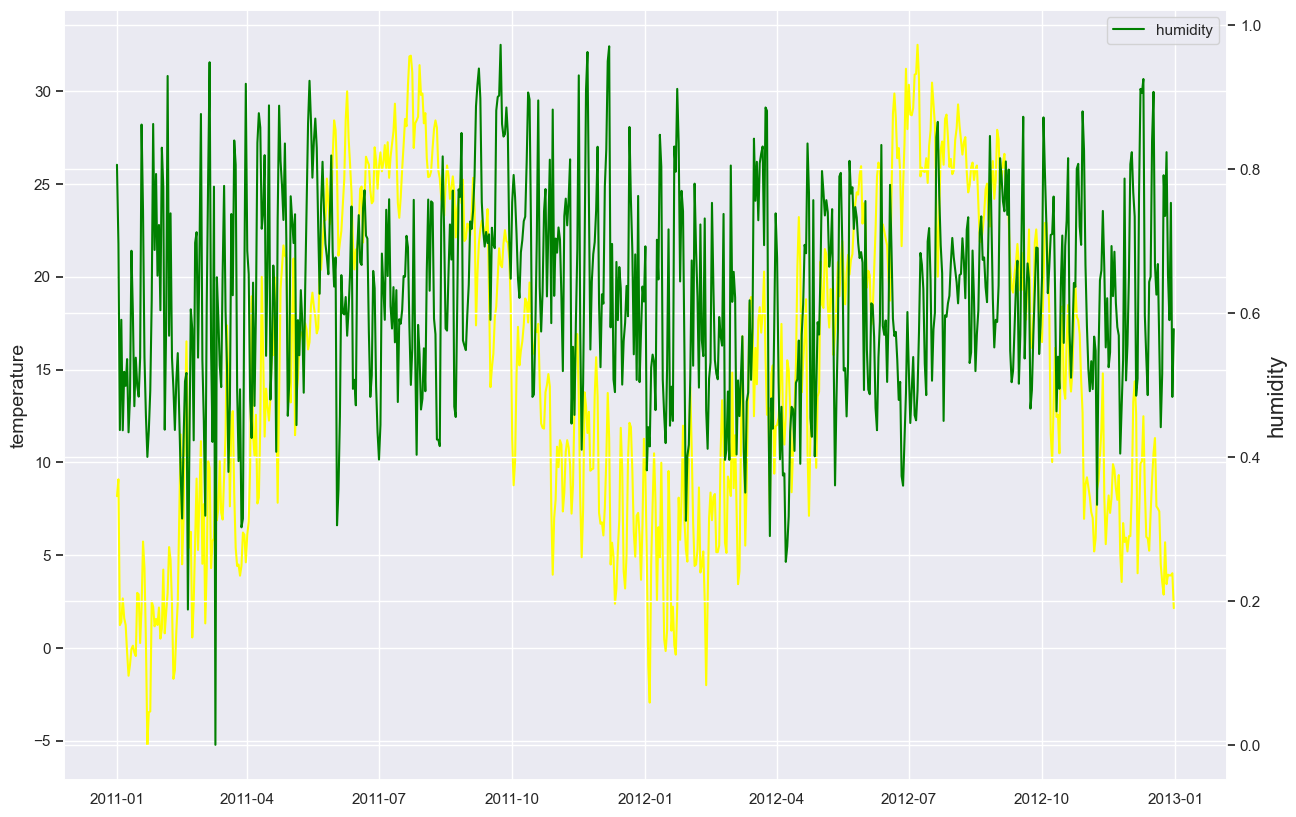

In [224]:

fig, ax1 = plt.subplots(figsize = (15,10))
temp = df_day["temp_in_cel"]
humidity = df_day["hum"]

ax1.plot(df_day["dteday"], temp, color = "yellow", label = "temperature")
ax1.set_ylabel("temperature", fontsize = 14)

ax2 = ax1.twinx()
ax2.plot(df_day["dteday"], humidity, color = "green", label = "humidity")
ax2.set_ylabel("humidity", fontsize = 16)
plt.legend() 
plt.show()

In [226]:
JanFeb = df_day.loc[(df_day['dteday'] >= '2011-01-01') & (df_day['dteday'] < '2011-01-31')]

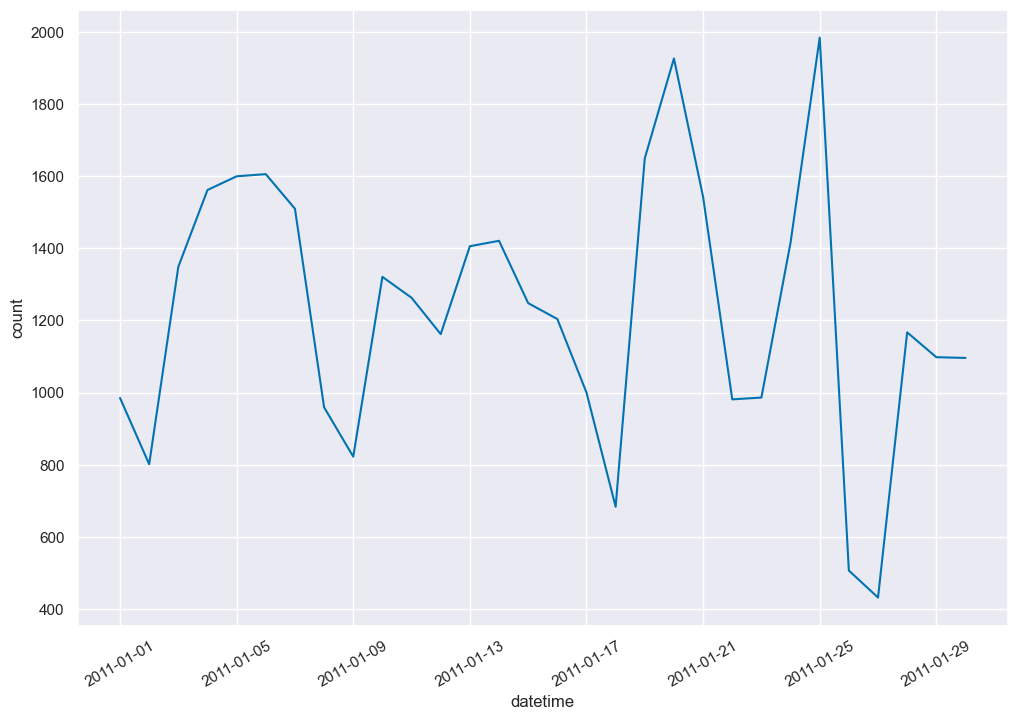

In [227]:
date = JanFeb["dteday"]
count = JanFeb["cnt"]
fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(x =date, y =count)
#ax.set_xlim("2011-01-01", "2011-02-28")
plt.xticks(rotation=30)
plt.xlabel("datetime")
plt.ylabel("count")
plt.show()

In [228]:
# https://www.geeksforgeeks.org/how-to-convert-datetime-to-date-in-pandas/
df_day['year'] = pd.to_datetime(df_day['dteday']).dt.year
df_day

instant     dteday  season  yr  mnth  holiday    weekday  workingday  \
0          1 2011-01-01       1   0     1        0   Saturday           0   
1          2 2011-01-02       1   0     1        0     Sunday           0   
2          3 2011-01-03       1   0     1        0     Monday           1   
3          4 2011-01-04       1   0     1        0    Tuesday           1   
4          5 2011-01-05       1   0     1        0  Wednesday           1   
..       ...        ...     ...  ..   ...      ...        ...         ...   
726      727 2012-12-27       1   1    12        0   Thursday           1   
727      728 2012-12-28       1   1    12        0     Friday           1   
728      729 2012-12-29       1   1    12        0   Saturday           0   
729      730 2012-12-30       1   1    12        0     Sunday           0   
730      731 2012-12-31       1   1    12        0     Monday           1   

     weathersit      temp  ...       hum  windspeed  casual  registered   cnt  \
0             2  0.344167  ...  0.805833   0.160446     331         654   985   
1             2  0.363478  ...  0.696087   0.248539     131         670   801   
2             1  0.196364  ...  0.437273   0.248309     120        1229  1349   
3             1  0.200000  ...  0.590435   0.160296     108        1454  1562   
4             1  0.226957  ...  0.436957   0.186900      82        1518  1600   
..          ...       ...  ...       ...        ...     ...         ...   ...   
726           2  0.254167  ...  0.652917   0.350133     247        1867  2114   
727           2  0.253333  ...  0.590000   0.155471     644        2451  3095   
728           2  0.253333  ...  0.752917   0.124383     159        1182  1341   
729           1  0.255833  ...  0.483333   0.350754     364        1432  1796   
730           2  0.215833  ...  0.577500   0.154846     439        2290  2729   

     year    monthly temp_in_cel  feeling_temp_in_cel  windspeed_a  
0    2011 2011-01-01    8.175849             7.999250    10.749882  
1    2011 2011-01-02    9.083466             7.346774    16.652113  
2    2011 2011-01-03    1.229108            -3.499270    16.636703  
3    2011 2011-01-04    1.400000            -1.999948    10.739832  
4    2011 2011-01-05    2.666979            -0.868180    12.522300  
..    ...        ...         ...                  ...          ...  
726  2012 2012-12-27    3.945849            -1.041628    23.458911  
727  2012 2012-12-28    3.906651             0.833036    10.416557  
728  2012 2012-12-29    3.906651            -0.001600     8.333661  
729  2012 2012-12-30    4.024151            -0.707800    23.500518  
730  2012 2012-12-31    2.144151            -1.249858    10.374682  

[731 rows x 21 columns]

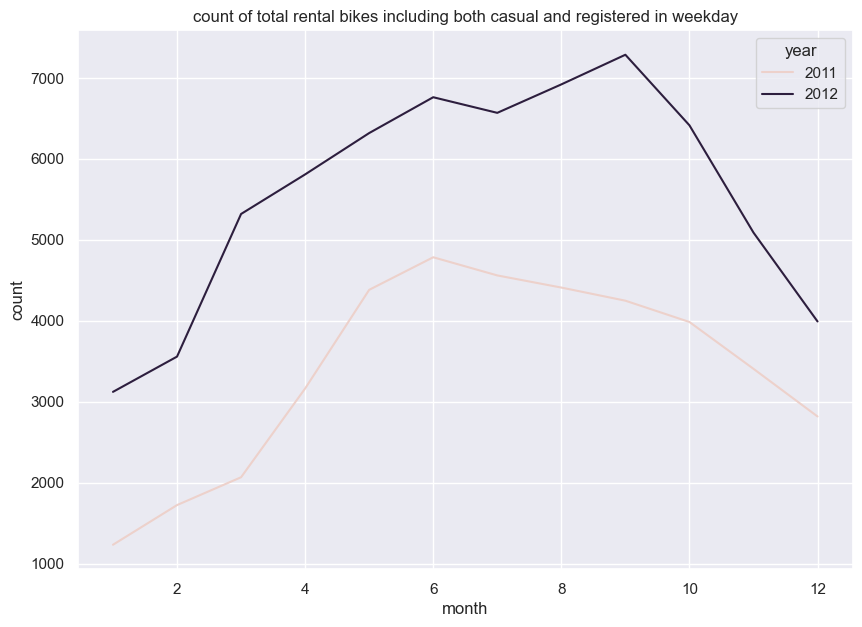

In [229]:
plt.figure(figsize=(10,7))
ax = sns.lineplot(data = df_day, x = df_day["mnth"], y = df_day["cnt"], hue = df_day["year"], errorbar = None)
plt.xlabel("month")

plt.ylabel("count")
plt.title("count of total rental bikes including both casual and registered in weekday")
for i in ax.containers:
  ax.bar_label(i,)
plt.show()

In [231]:
df_day['weekday'] = pd.to_datetime(df_day['dteday']).dt.day_name()

In [232]:
df_day.loc[(df_day['weekday'] == 'Saturday')]


instant     dteday  season  yr  mnth  holiday   weekday  workingday  \
0          1 2011-01-01       1   0     1        0  Saturday           0   
7          8 2011-01-08       1   0     1        0  Saturday           0   
14        15 2011-01-15       1   0     1        0  Saturday           0   
21        22 2011-01-22       1   0     1        0  Saturday           0   
28        29 2011-01-29       1   0     1        0  Saturday           0   
..       ...        ...     ...  ..   ...      ...       ...         ...   
700      701 2012-12-01       4   1    12        0  Saturday           0   
707      708 2012-12-08       4   1    12        0  Saturday           0   
714      715 2012-12-15       4   1    12        0  Saturday           0   
721      722 2012-12-22       1   1    12        0  Saturday           0   
728      729 2012-12-29       1   1    12        0  Saturday           0   

     weathersit      temp  ...       hum  windspeed  casual  registered   cnt  \
0             2  0.344167  ...  0.805833   0.160446     331         654   985   
7             2  0.165000  ...  0.535833   0.266804      68         891   959   
14            2  0.233333  ...  0.498750   0.157963     222        1026  1248   
21            1  0.059130  ...  0.400000   0.171970      93         888   981   
28            1  0.196522  ...  0.651739   0.145365     123         975  1098   
..          ...       ...  ...       ...        ...     ...         ...   ...   
700           2  0.298333  ...  0.806667   0.059704     951        4240  5191   
707           2  0.381667  ...  0.911250   0.101379    1153        4429  5582   
714           1  0.324167  ...  0.650417   0.106350     767        4280  5047   
721           1  0.265833  ...  0.441250   0.407346     205        1544  1749   
728           2  0.253333  ...  0.752917   0.124383     159        1182  1341   

     year    monthly temp_in_cel  feeling_temp_in_cel  windspeed_a  
0    2011 2011-01-01    8.175849             7.999250    10.749882  
7    2011 2011-01-08   -0.245000            -5.291236    17.875868  
14   2011 2011-01-15    2.966651             0.375392    10.583521  
21   2011 2011-01-22   -5.220871           -10.781406    11.521990  
28   2011 2011-01-29    1.236534            -1.999684     9.739455  
..    ...        ...         ...                  ...          ...  
700  2012 2012-12-01    6.021651             4.915664     4.000181  
707  2012 2012-12-08    9.938349             9.707528     6.792393  
714  2012 2012-12-15    7.235849             6.333278     7.125450  
721  2012 2012-12-22    4.494151            -0.416542    27.292182  
728  2012 2012-12-29    3.906651            -0.001600     8.333661  

[105 rows x 21 columns]

In [233]:
df_day.head()

instant     dteday  season  yr  mnth  holiday    weekday  workingday  \
0        1 2011-01-01       1   0     1        0   Saturday           0   
1        2 2011-01-02       1   0     1        0     Sunday           0   
2        3 2011-01-03       1   0     1        0     Monday           1   
3        4 2011-01-04       1   0     1        0    Tuesday           1   
4        5 2011-01-05       1   0     1        0  Wednesday           1   

   weathersit      temp  ...       hum  windspeed  casual  registered   cnt  \
0           2  0.344167  ...  0.805833   0.160446     331         654   985   
1           2  0.363478  ...  0.696087   0.248539     131         670   801   
2           1  0.196364  ...  0.437273   0.248309     120        1229  1349   
3           1  0.200000  ...  0.590435   0.160296     108        1454  1562   
4           1  0.226957  ...  0.436957   0.186900      82        1518  1600   

   year    monthly temp_in_cel  feeling_temp_in_cel  windspeed_a  
0  2011 2011-01-01    8.175849             7.999250    10.749882  
1  2011 2011-01-02    9.083466             7.346774    16.652113  
2  2011 2011-01-03    1.229108            -3.499270    16.636703  
3  2011 2011-01-04    1.400000            -1.999948    10.739832  
4  2011 2011-01-05    2.666979            -0.868180    12.522300  

[5 rows x 21 columns]

In [234]:
df_day

instant     dteday  season  yr  mnth  holiday    weekday  workingday  \
0          1 2011-01-01       1   0     1        0   Saturday           0   
1          2 2011-01-02       1   0     1        0     Sunday           0   
2          3 2011-01-03       1   0     1        0     Monday           1   
3          4 2011-01-04       1   0     1        0    Tuesday           1   
4          5 2011-01-05       1   0     1        0  Wednesday           1   
..       ...        ...     ...  ..   ...      ...        ...         ...   
726      727 2012-12-27       1   1    12        0   Thursday           1   
727      728 2012-12-28       1   1    12        0     Friday           1   
728      729 2012-12-29       1   1    12        0   Saturday           0   
729      730 2012-12-30       1   1    12        0     Sunday           0   
730      731 2012-12-31       1   1    12        0     Monday           1   

     weathersit      temp  ...       hum  windspeed  casual  registered   cnt  \
0             2  0.344167  ...  0.805833   0.160446     331         654   985   
1             2  0.363478  ...  0.696087   0.248539     131         670   801   
2             1  0.196364  ...  0.437273   0.248309     120        1229  1349   
3             1  0.200000  ...  0.590435   0.160296     108        1454  1562   
4             1  0.226957  ...  0.436957   0.186900      82        1518  1600   
..          ...       ...  ...       ...        ...     ...         ...   ...   
726           2  0.254167  ...  0.652917   0.350133     247        1867  2114   
727           2  0.253333  ...  0.590000   0.155471     644        2451  3095   
728           2  0.253333  ...  0.752917   0.124383     159        1182  1341   
729           1  0.255833  ...  0.483333   0.350754     364        1432  1796   
730           2  0.215833  ...  0.577500   0.154846     439        2290  2729   

     year    monthly temp_in_cel  feeling_temp_in_cel  windspeed_a  
0    2011 2011-01-01    8.175849             7.999250    10.749882  
1    2011 2011-01-02    9.083466             7.346774    16.652113  
2    2011 2011-01-03    1.229108            -3.499270    16.636703  
3    2011 2011-01-04    1.400000            -1.999948    10.739832  
4    2011 2011-01-05    2.666979            -0.868180    12.522300  
..    ...        ...         ...                  ...          ...  
726  2012 2012-12-27    3.945849            -1.041628    23.458911  
727  2012 2012-12-28    3.906651             0.833036    10.416557  
728  2012 2012-12-29    3.906651            -0.001600     8.333661  
729  2012 2012-12-30    4.024151            -0.707800    23.500518  
730  2012 2012-12-31    2.144151            -1.249858    10.374682  

[731 rows x 21 columns]

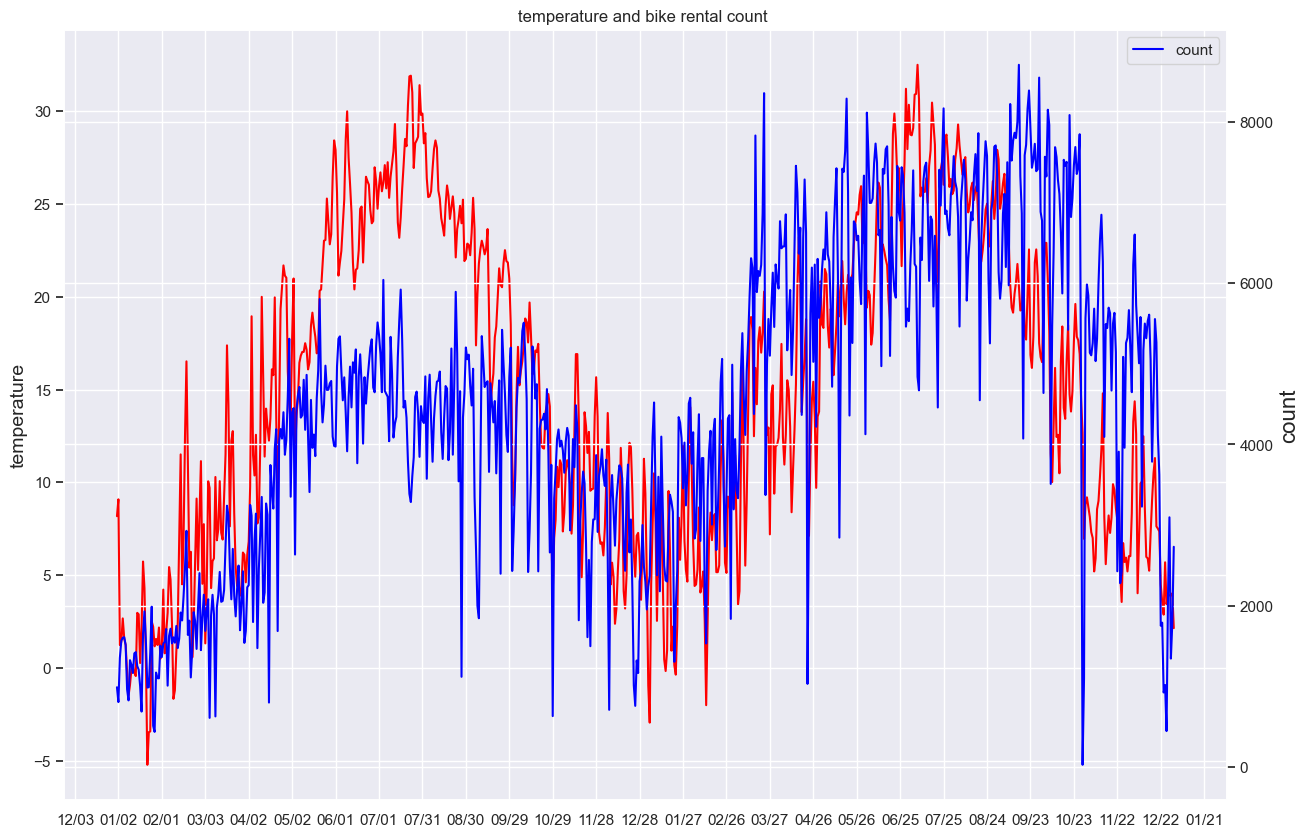

In [235]:
# kino code https://kino-code.com/matplotlib_seaborn-09/
fig, ax1 = plt.subplots(figsize = (15,10))
count = df_day["cnt"]
temperature = df_day["temp_in_cel"]

ax1.plot(df_day["dteday"], temperature, color = "red", label = "temperature")
ax1.set_ylabel("temperature", fontsize = 14)

ax2 = ax1.twinx()
ax2.plot(df_day["dteday"], count, color = "blue", label = "count")
ax2.set_ylabel("count", fontsize = 16)

ax2.xaxis.set_major_formatter(dt.DateFormatter('%m/%d')) #dt.DateFormatter(%m/%d) DateFormatterは日付形式の設定、()内は表示する日付形式
ax2.xaxis.set_major_locator(dt.DayLocator(interval =30))
plt.title("temperature and bike rental count ")
plt.xlabel("2011 and 2012")
plt.legend() 
plt.show()

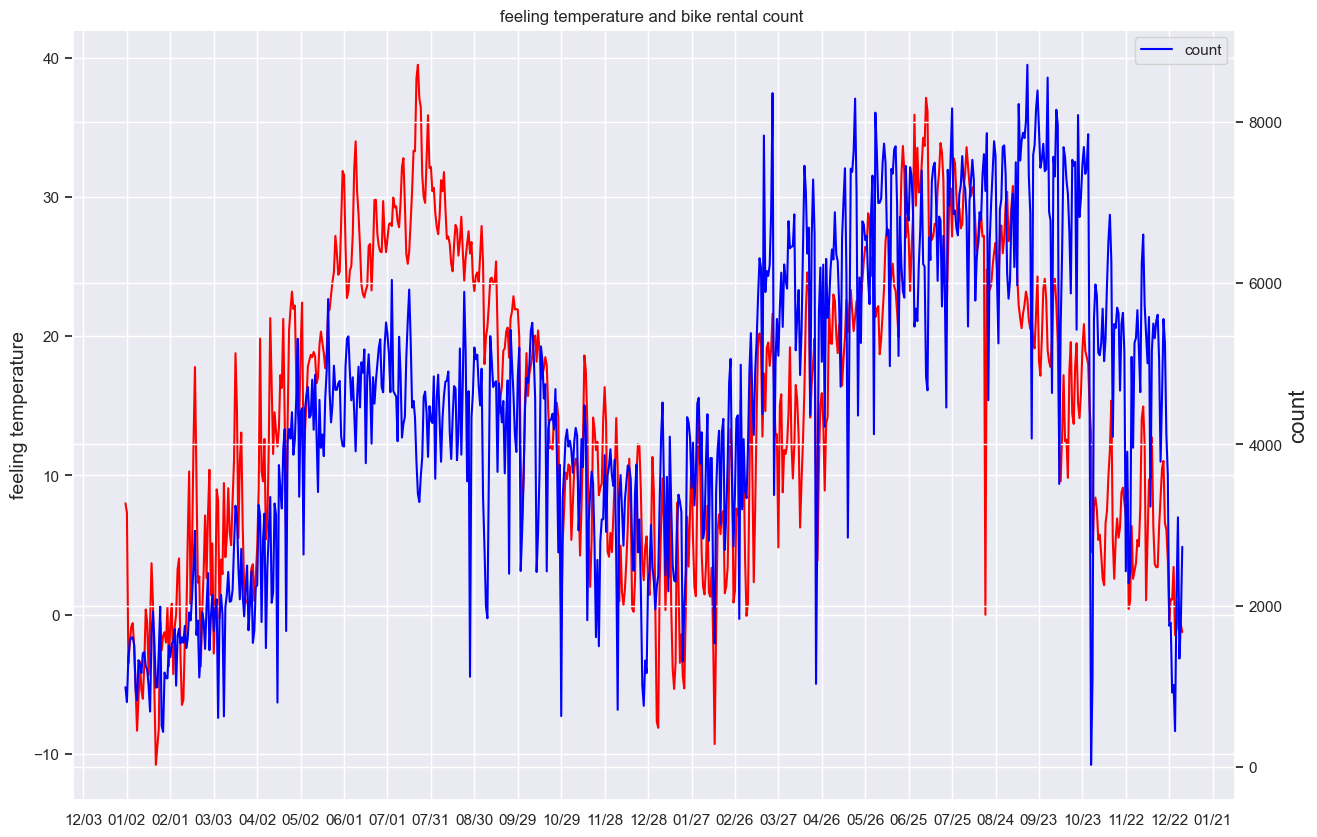

In [236]:
fig, ax1 = plt.subplots(figsize = (15,10))
count = df_day["cnt"]
temperature = df_day["feeling_temp_in_cel"]

ax1.plot(df_day["dteday"], temperature, color = "red", label = "temperature")
ax1.set_ylabel("feeling temperature", fontsize = 14)

ax2 = ax1.twinx()
ax2.plot(df_day["dteday"], count, color = "blue", label = "count")
ax2.set_ylabel("count", fontsize = 16)

ax2.xaxis.set_major_formatter(dt.DateFormatter('%m/%d')) #dt.DateFormatter(%m/%d) DateFormatterは日付形式の設定、()内は表示する日付形式
ax2.xaxis.set_major_locator(dt.DayLocator(interval =30))
plt.title("feeling temperature and bike rental count ")
plt.xlabel("2011 and 2012")
plt.legend() 
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


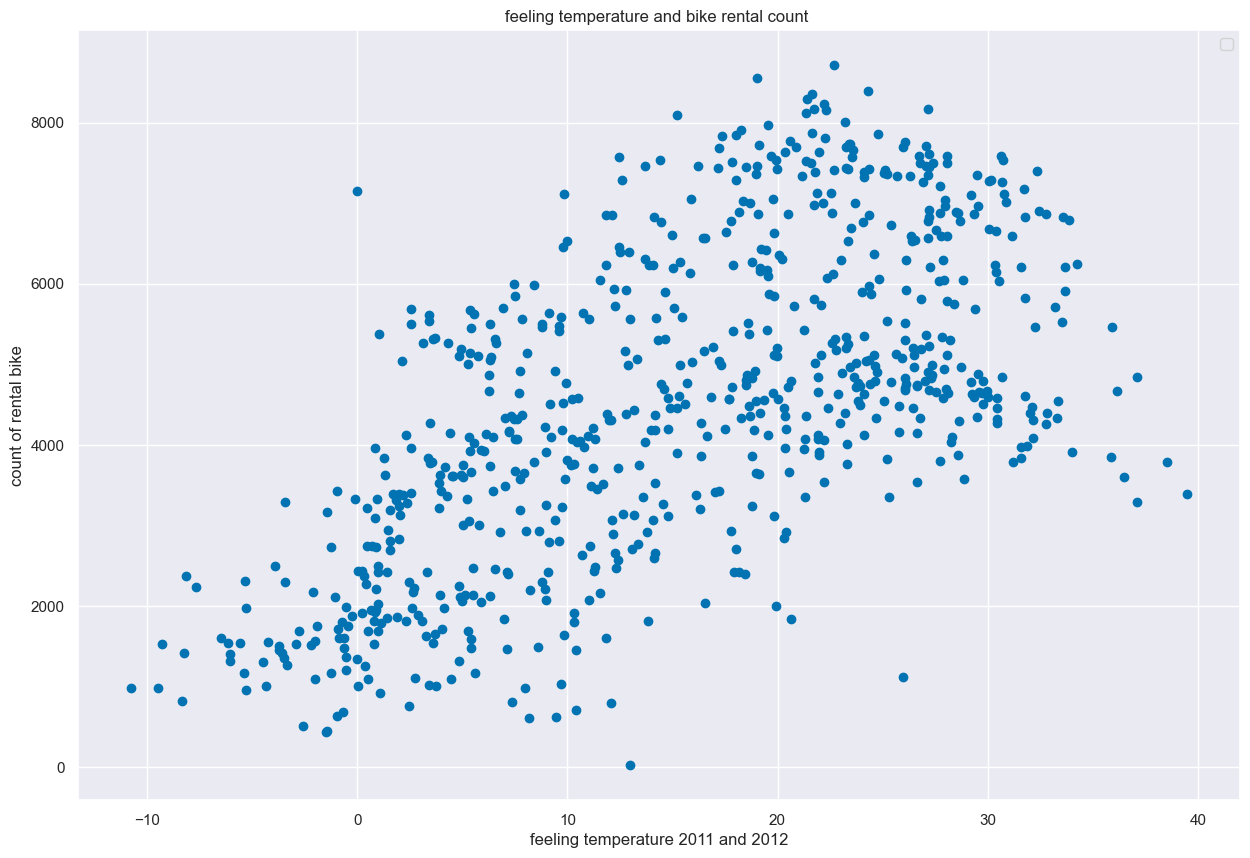

In [237]:
fig, ax1 = plt.subplots(figsize = (15,10))
count = df_day["cnt"]
temperature = df_day["feeling_temp_in_cel"]

plt.scatter(x =temperature, y = count)

plt.title("feeling temperature and bike rental count ")
plt.ylabel("count of rental bike")
plt.xlabel("feeling temperature 2011 and 2012")
plt.legend() 
plt.show()

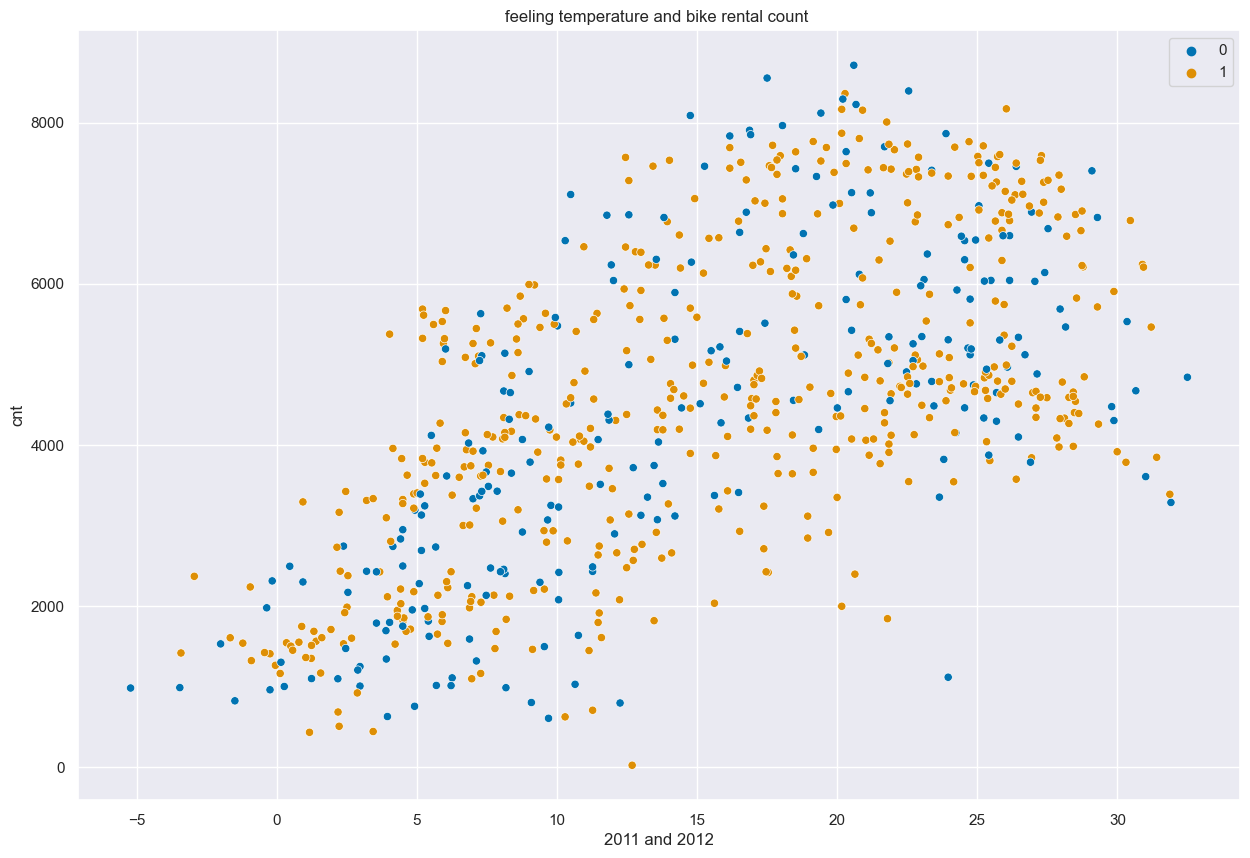

In [238]:
fig, ax1 = plt.subplots(figsize = (15,10))
count = df_day["cnt"]
temperature = df_day["temp_in_cel"]

sns.scatterplot(x =temperature, y = count, hue = df_day["workingday"])

plt.title("feeling temperature and bike rental count ")
plt.xlabel("2011 and 2012")
plt.legend() 
plt.show()

In [240]:
Jan01_2011 = df_day.loc[(df_day['dteday'] >= '2011-01-01') & (df_day['dteday'] < '2011-01-31')]

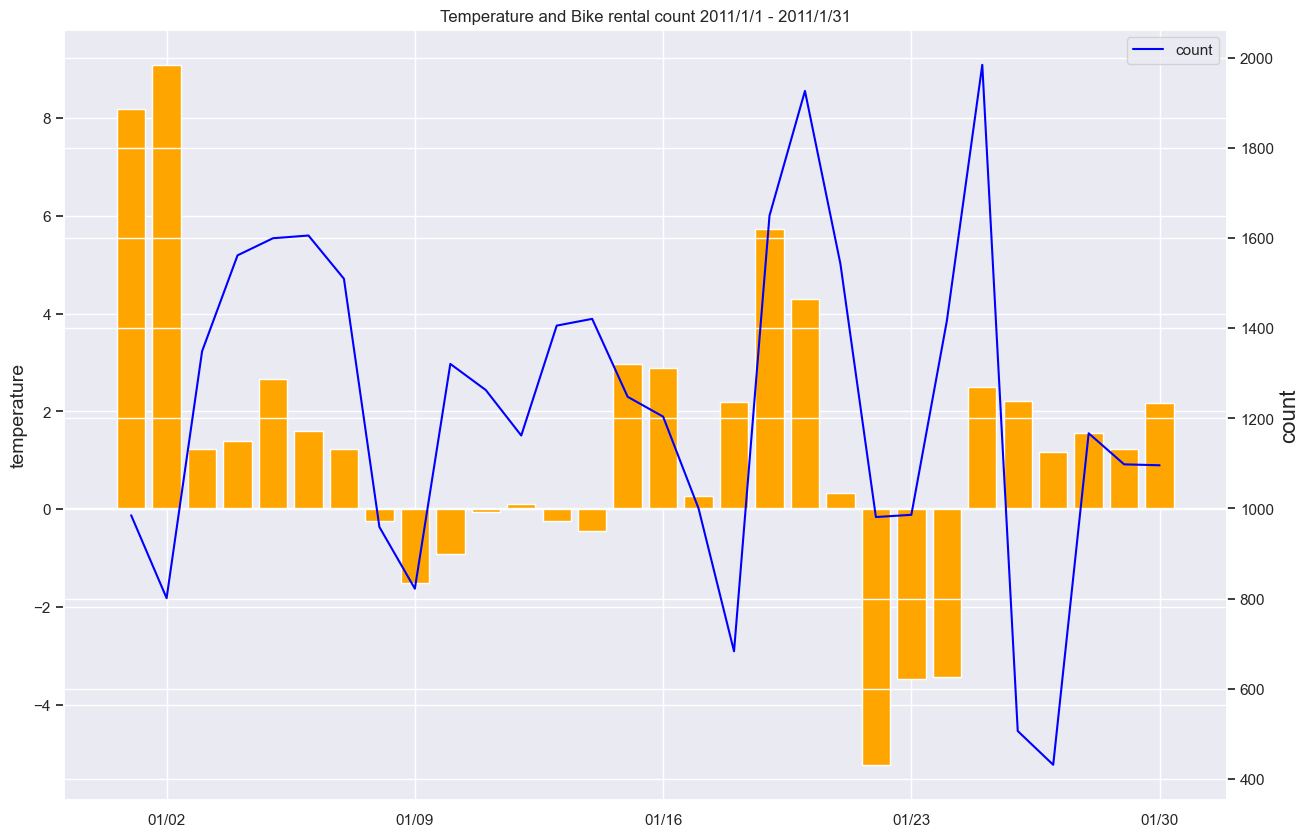

In [241]:
legend_list = ["temperature", "count"]
fig, ax1 = plt.subplots(figsize = (15,10))
count = Jan01_2011["cnt"]
temperature = Jan01_2011["temp_in_cel"]

ax1.bar(Jan01_2011["dteday"], temperature, color = "orange", label = "temperature")
ax1.set_ylabel("temperature", fontsize = 14)

ax2 = ax1.twinx()
ax2.plot(Jan01_2011["dteday"], count, color = "blue", label = "count")
ax2.set_ylabel("count", fontsize = 16)

ax2.xaxis.set_major_formatter(dt.DateFormatter('%m/%d')) #dt.DateFormatter(%m/%d) DateFormatterは日付形式の設定、()内は表示する日付形式
ax2.xaxis.set_major_locator(dt.DayLocator(interval =7))
plt.title("Temperature and Bike rental count 2011/1/1 - 2011/1/31")
plt.legend() 
plt.show()

In [242]:
quater1_2011 = df_day.loc[(df_day['dteday'] >= '2011-01-01') & (df_day['dteday'] < '2011-03-31')]

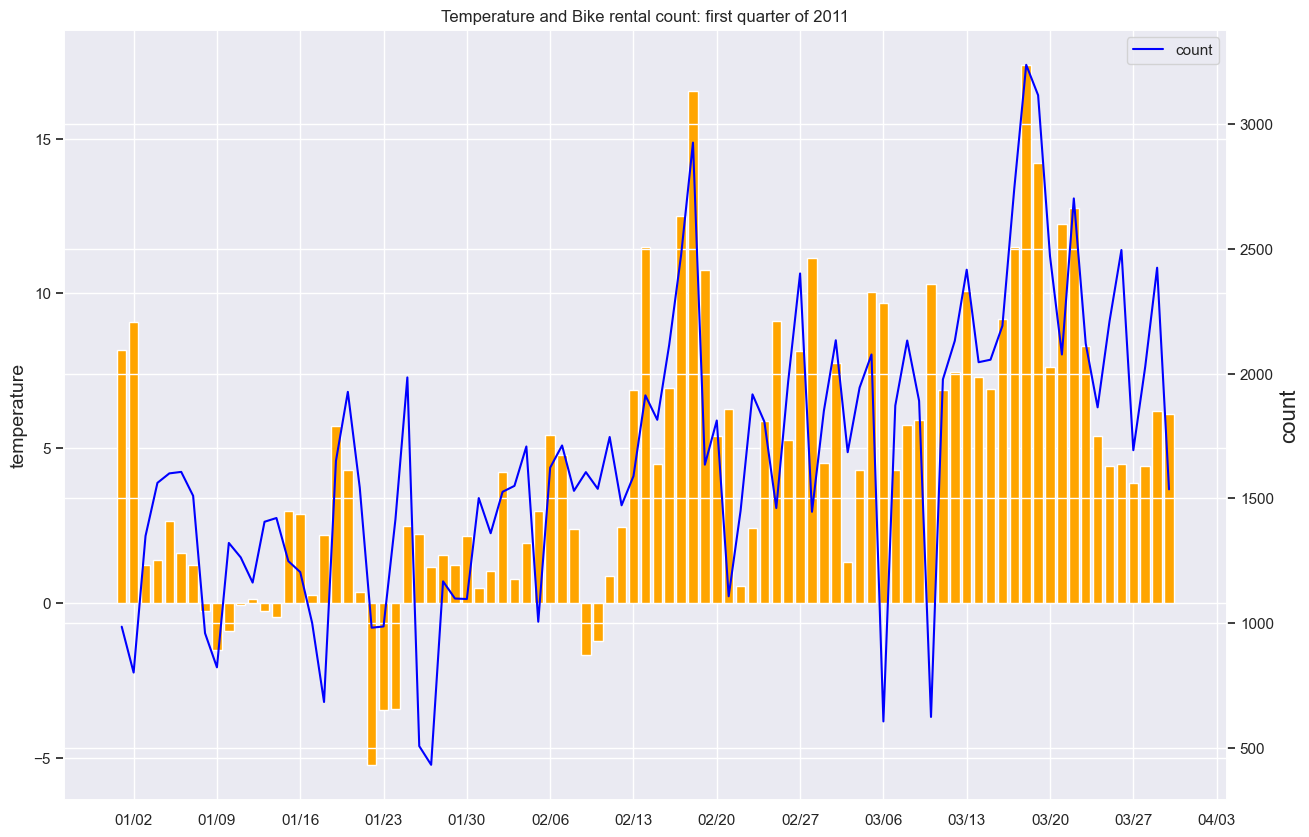

In [243]:
legend_list = ["temperature", "count"]
fig, ax1 = plt.subplots(figsize = (15,10))
count = quater1_2011["cnt"]
temperature = quater1_2011["temp_in_cel"]

ax1.bar(quater1_2011["dteday"], temperature, color = "orange", label = "temperature")
ax1.set_ylabel("temperature", fontsize = 14)

ax2 = ax1.twinx()
ax2.plot(quater1_2011["dteday"], count, color = "blue", label = "count")
ax2.set_ylabel("count", fontsize = 16)

ax2.xaxis.set_major_formatter(dt.DateFormatter('%m/%d')) #dt.DateFormatter(%m/%d) DateFormatterは日付形式の設定、()内は表示する日付形式
ax2.xaxis.set_major_locator(dt.DayLocator(interval =7))
plt.title("Temperature and Bike rental count: first quarter of 2011")
plt.legend() 
plt.show()

In [ ]:
mar06 = df_day.loc[(df_day['dteday'] >= '2011-03-06') & (df_day['dteday'] < '2011-03-12')]
mar06
# why are there only few users on 3/6 and 3/10? It is sunday and very windy. weather situation is 2 on 3/6. 3/10 weather situation is 3, a bit more windy than as usual.

instant     dteday  season  yr  mnth  holiday    weekday  workingday  \
64       65 2011-03-06       1   0     3        0     Sunday           0   
65       66 2011-03-07       1   0     3        0     Monday           1   
66       67 2011-03-08       1   0     3        0    Tuesday           1   
67       68 2011-03-09       1   0     3        0  Wednesday           1   
68       69 2011-03-10       1   0     3        0   Thursday           1   
69       70 2011-03-11       1   0     3        0     Friday           1   

    weathersit      temp     atemp       hum  windspeed  casual  registered  \
64           2  0.376522  0.366252  0.948261   0.343287     114         491   
65           1  0.261739  0.238461  0.551304   0.341352     244        1628   
66           1  0.292500  0.302400  0.420833   0.120650     316        1817   
67           2  0.295833  0.286608  0.775417   0.220150     191        1700   
68           3  0.389091  0.385668  0.000000   0.261877      46         577   
69           2  0.316522  0.305000  0.649565   0.232970     247        1730   

     cnt  temp_in_cel  feeling_temp_in_cel  windspeed_a  Year  
64   605     9.696534             8.172632    23.000229  2011  
65  1872     4.301733            -0.261574    22.870584  2011  
66  2133     5.747500             3.958400     8.083550  2011  
67  1891     5.904151             2.916128    14.750050  2011  
68   623    10.287277             9.454088    17.545759  2011  
69  1977     6.876534             4.130000    15.608990  2011

In [244]:
quater1_2012 = df_day.loc[(df_day['dteday'] >= '2012-01-01') & (df_day['dteday'] < '2012-03-31')]

In [245]:
quater1_2012

instant     dteday  season  yr  mnth  holiday    weekday  workingday  \
365      366 2012-01-01       1   1     1        0     Sunday           0   
366      367 2012-01-02       1   1     1        1     Monday           0   
367      368 2012-01-03       1   1     1        0    Tuesday           1   
368      369 2012-01-04       1   1     1        0  Wednesday           1   
369      370 2012-01-05       1   1     1        0   Thursday           1   
..       ...        ...     ...  ..   ...      ...        ...         ...   
450      451 2012-03-26       2   1     3        0     Monday           1   
451      452 2012-03-27       2   1     3        0    Tuesday           1   
452      453 2012-03-28       2   1     3        0  Wednesday           1   
453      454 2012-03-29       2   1     3        0   Thursday           1   
454      455 2012-03-30       2   1     3        0     Friday           1   

     weathersit      temp  ...       hum  windspeed  casual  registered   cnt  \
365           1  0.370000  ...  0.692500   0.192167     686        1608  2294   
366           1  0.273043  ...  0.381304   0.329665     244        1707  1951   
367           1  0.150000  ...  0.441250   0.365671      89        2147  2236   
368           2  0.107500  ...  0.414583   0.184700      95        2273  2368   
369           1  0.265833  ...  0.524167   0.129987     140        3132  3272   
..          ...       ...  ...       ...        ...     ...         ...   ...   
450           1  0.445833  ...  0.477917   0.386821     795        4763  5558   
451           1  0.323333  ...  0.290000   0.187192     531        4571  5102   
452           1  0.484167  ...  0.481250   0.291671     674        5024  5698   
453           1  0.494167  ...  0.439167   0.319650     834        5299  6133   
454           2  0.370000  ...  0.580833   0.138067     796        4663  5459   

     year    monthly temp_in_cel  feeling_temp_in_cel  windspeed_a  
365  2012 2012-01-01    9.390000             8.790986    12.875189  
366  2012 2012-01-02    4.833021             0.652064    22.087555  
367  2012 2012-01-03   -0.950000            -7.665850    24.499957  
368  2012 2012-01-04   -2.947500            -8.123758    12.374900  
369  2012 2012-01-05    4.494151             2.375192     8.709129  
..    ...        ...         ...                  ...          ...  
450  2012 2012-03-26   12.954151            12.957500    25.917007  
451  2012 2012-03-27    7.196651             4.833164    12.541864  
452  2012 2012-03-28   14.755849            15.082700    19.541957  
453  2012 2012-03-29   15.225849            15.832064    21.416550  
454  2012 2012-03-30    9.390000             8.790986     9.250489  

[90 rows x 21 columns]

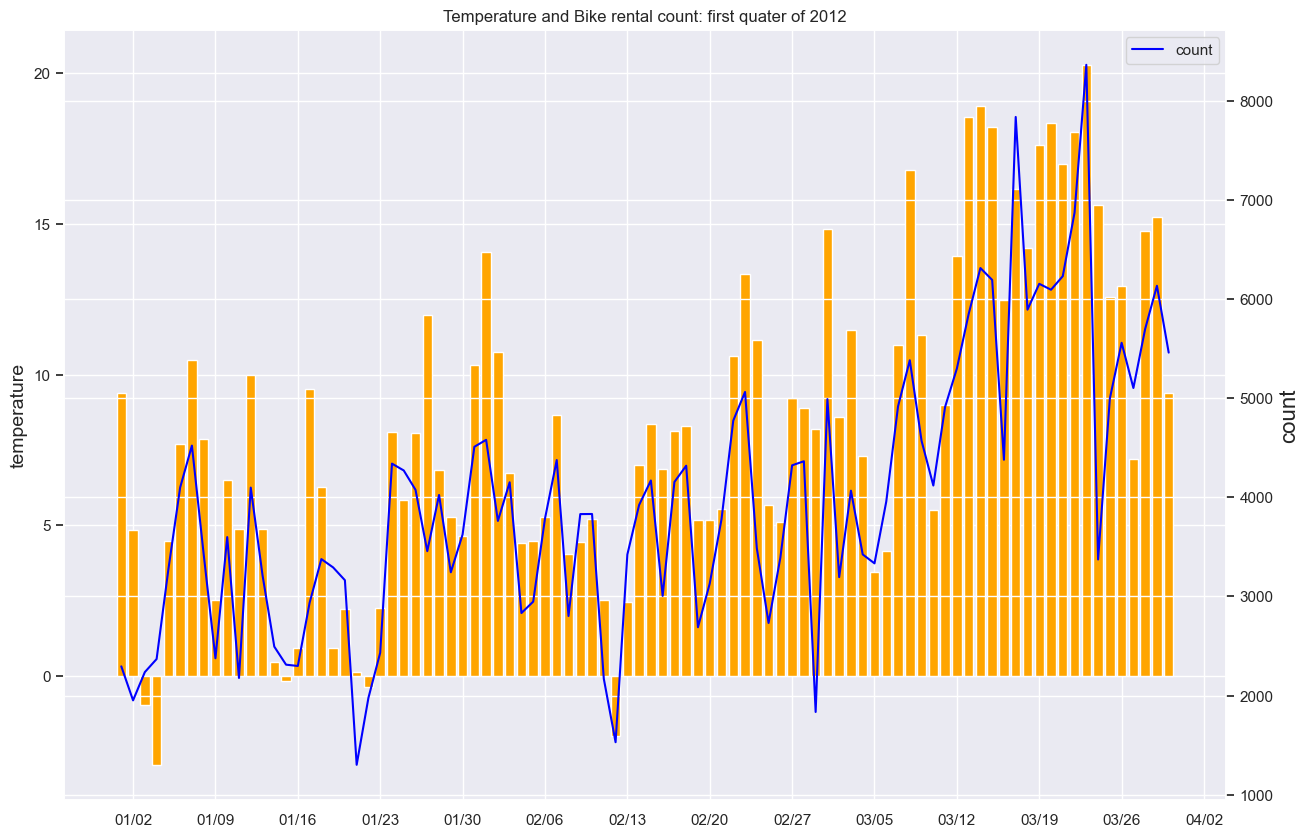

In [246]:
legend_list = ["temperature", "count"]
fig, ax1 = plt.subplots(figsize = (15,10))
count = quater1_2012["cnt"]
temperature = quater1_2012["temp_in_cel"]

ax1.bar(quater1_2012["dteday"], temperature, color = "orange", label = "temperature")
ax1.set_ylabel("temperature", fontsize = 14)

ax2 = ax1.twinx()
ax2.plot(quater1_2012["dteday"], count, color = "blue", label = "count")
ax2.set_ylabel("count", fontsize = 16)

ax2.xaxis.set_major_formatter(dt.DateFormatter('%m/%d')) #dt.DateFormatter(%m/%d) DateFormatterは日付形式の設定、()内は表示する日付形式
ax2.xaxis.set_major_locator(dt.DayLocator(interval =7))
plt.title("Temperature and Bike rental count: first quater of 2012")
plt.legend() 
plt.show()

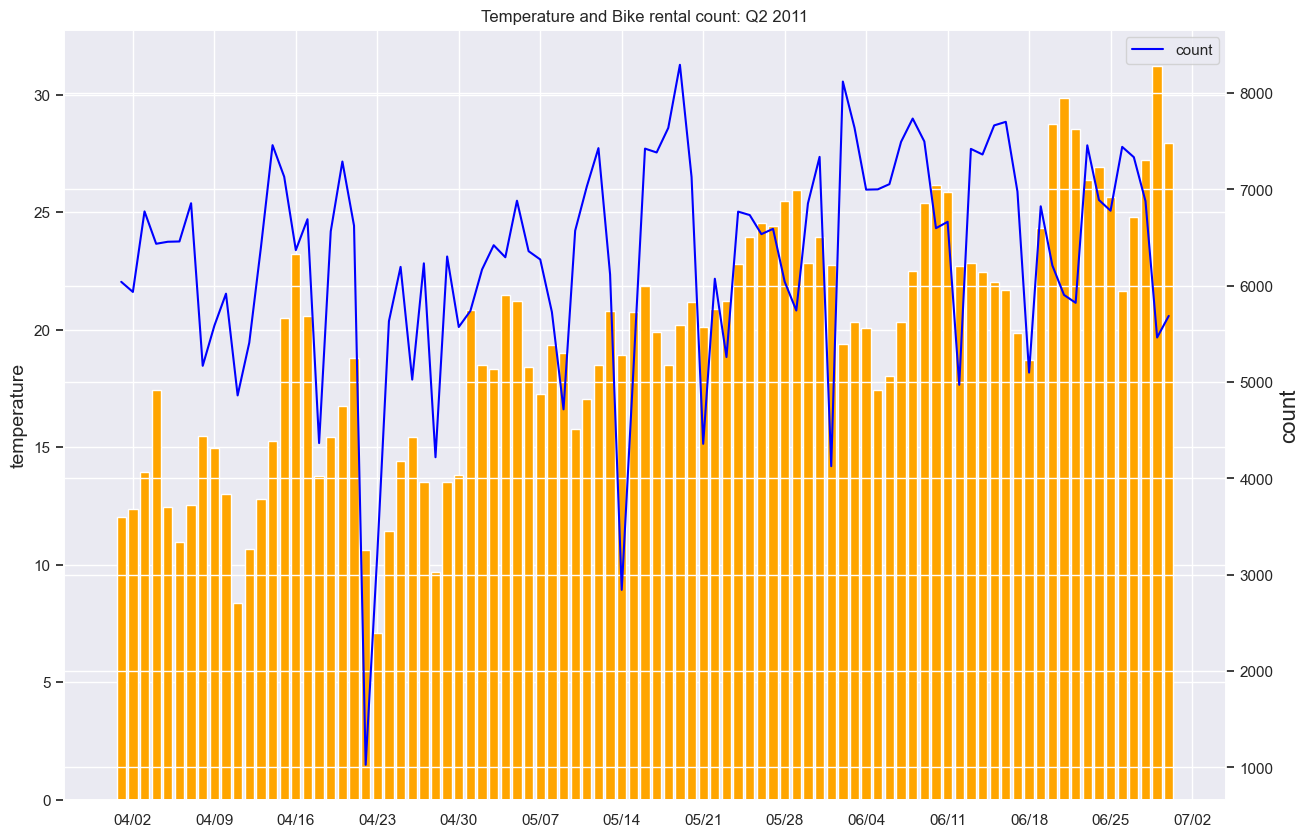

In [248]:
year2011 = df_day.loc[(df_day['dteday'] >= '2011-01-01') & (df_day['dteday'] <= '2011-12-31')]
quater2_2012 = df_day.loc[(df_day["dteday"] >= "2012-04-01")& (df_day["dteday"]<= "2012-06-30")]

legend_list = ["temperature", "count"]
fig, ax1 = plt.subplots(figsize = (15,10))
count = quater2_2012["cnt"]
temperature = quater2_2012["temp_in_cel"]

ax1.bar(quater2_2012["dteday"], temperature, color = "orange", label = "temperature")
ax1.set_ylabel("temperature", fontsize = 14)

ax2 = ax1.twinx()
ax2.plot(quater2_2012["dteday"], count, color = "blue", label = "count")
ax2.set_ylabel("count", fontsize = 16)

ax2.xaxis.set_major_formatter(dt.DateFormatter('%m/%d')) #dt.DateFormatter(%m/%d) DateFormatterは日付形式の設定、()内は表示する日付形式
ax2.xaxis.set_major_locator(dt.DayLocator(interval =7))
plt.title("Temperature and Bike rental count: Q2 2011")
plt.legend() 
plt.show()

In [249]:
quater2_2012

instant     dteday  season  yr  mnth  holiday    weekday  workingday  \
456      457 2012-04-01       2   1     4        0     Sunday           0   
457      458 2012-04-02       2   1     4        0     Monday           1   
458      459 2012-04-03       2   1     4        0    Tuesday           1   
459      460 2012-04-04       2   1     4        0  Wednesday           1   
460      461 2012-04-05       2   1     4        0   Thursday           1   
..       ...        ...     ...  ..   ...      ...        ...         ...   
542      543 2012-06-26       3   1     6        0    Tuesday           1   
543      544 2012-06-27       3   1     6        0  Wednesday           1   
544      545 2012-06-28       3   1     6        0   Thursday           1   
545      546 2012-06-29       3   1     6        0     Friday           1   
546      547 2012-06-30       3   1     6        0   Saturday           0   

     weathersit      temp  ...       hum  windspeed  casual  registered   cnt  \
456           2  0.425833  ...  0.676250   0.172267    2347        3694  6041   
457           1  0.433913  ...  0.504348   0.312139    1208        4728  5936   
458           1  0.466667  ...  0.396667   0.100133    1348        5424  6772   
459           1  0.541667  ...  0.469583   0.180975    1058        5378  6436   
460           1  0.435000  ...  0.374167   0.219529    1192        5265  6457   
..          ...       ...  ...       ...        ...     ...         ...   ...   
542           1  0.630833  ...  0.373333   0.347642    1077        6365  7442   
543           1  0.697500  ...  0.360000   0.271775    1077        6258  7335   
544           1  0.749167  ...  0.422500   0.171650     921        5958  6879   
545           1  0.834167  ...  0.488750   0.165417     829        4634  5463   
546           1  0.765000  ...  0.601250   0.161071    1455        4232  5687   

     year    monthly temp_in_cel  feeling_temp_in_cel  windspeed_a  
456  2012 2012-04-01   12.014151            11.540942    11.541889  
457  2012 2012-04-02   12.393911            12.215858    20.913313  
458  2012 2012-04-03   13.933349            14.457878     6.708911  
459  2012 2012-04-04   17.458349            19.207700    12.125325  
460  2012 2012-04-05   12.445000            12.456758    14.708443  
..    ...        ...         ...                  ...          ...  
542  2012 2012-06-26   21.649151            23.250464    23.292014  
543  2012 2012-06-27   24.782500            26.292272    18.208925  
544  2012 2012-06-28   27.210849            28.583792    11.500550  
545  2012 2012-06-29   31.205849            35.916458    11.082939  
546  2012 2012-06-30   27.955000            29.375528    10.791757  

[91 rows x 21 columns]

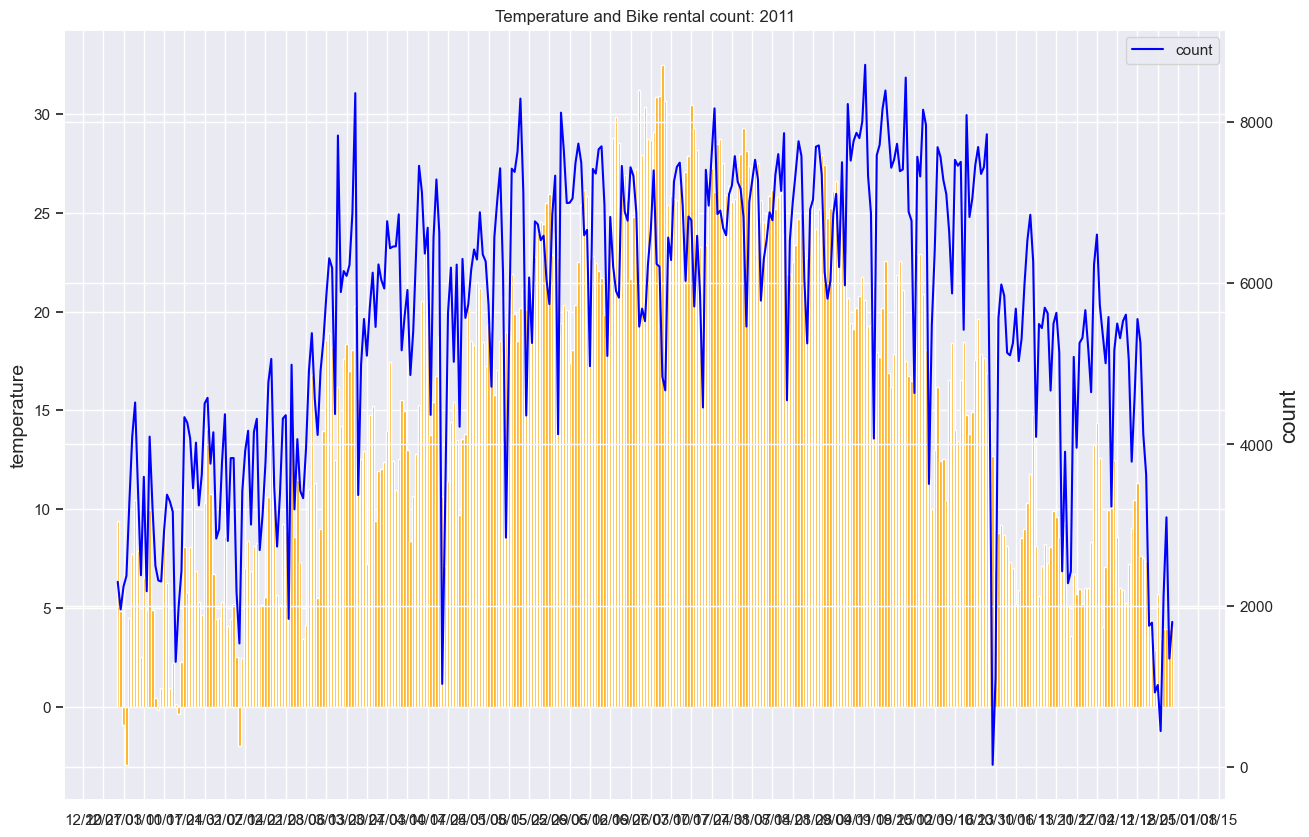

In [251]:
year2011 = df_day.loc[(df_day['dteday'] >= '2012-01-01') & (df_day['dteday'] < '2012-12-31')]

legend_list = ["temperature", "count"]
fig, ax1 = plt.subplots(figsize = (15,10))
count = year2011["cnt"]
temperature = year2011["temp_in_cel"]

ax1.bar(year2011["dteday"], temperature, color = "orange", label = "temperature")
ax1.set_ylabel("temperature", fontsize = 14)

ax2 = ax1.twinx()
ax2.plot(year2011["dteday"], count, color = "blue", label = "count")
ax2.set_ylabel("count", fontsize = 16)

ax2.xaxis.set_major_formatter(dt.DateFormatter('%m/%d')) #dt.DateFormatter(%m/%d) DateFormatterは日付形式の設定、()内は表示する日付形式
ax2.xaxis.set_major_locator(dt.DayLocator(interval =7))
plt.title("Temperature and Bike rental count: 2011")
plt.legend() 
plt.show()

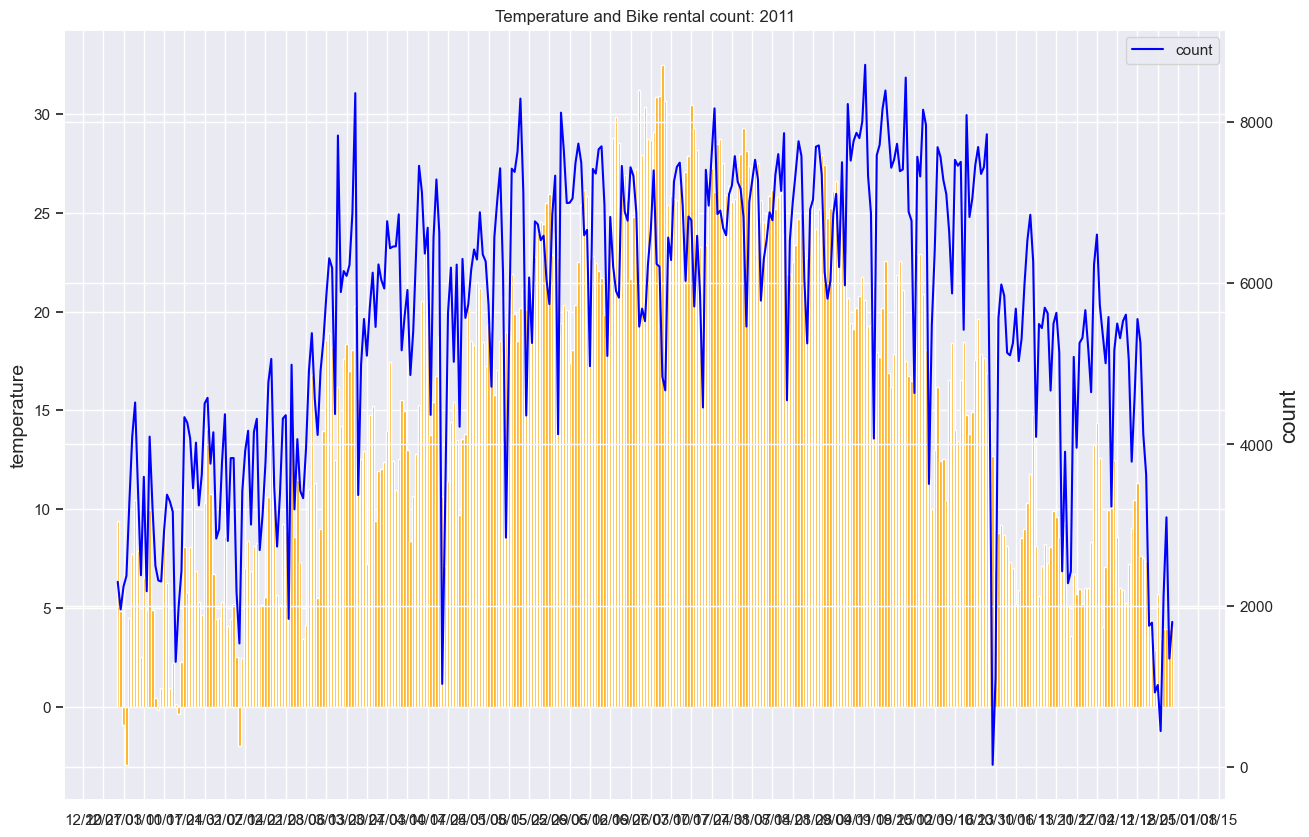

In [252]:
year2012 = df_day.loc[(df_day['dteday'] >= '2012-01-01') & (df_day['dteday'] < '2012-12-31')]

legend_list = ["temperature", "count"]
fig, ax1 = plt.subplots(figsize = (15,10))
count = year2012["cnt"]
temperature = year2012["temp_in_cel"]

ax1.bar(year2012["dteday"], temperature, color = "orange", label = "temperature")
ax1.set_ylabel("temperature", fontsize = 14)

ax2 = ax1.twinx()
ax2.plot(year2012["dteday"], count, color = "blue", label = "count")
ax2.set_ylabel("count", fontsize = 16)

ax2.xaxis.set_major_formatter(dt.DateFormatter('%m/%d')) #dt.DateFormatter(%m/%d) DateFormatterは日付形式の設定、()内は表示する日付形式
ax2.xaxis.set_major_locator(dt.DayLocator(interval =7))
plt.title("Temperature and Bike rental count: 2011")
plt.legend() 
plt.show() 

C:\Users\satom\AppData\Local\Temp\ipykernel_13848\3362223800.py:3: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(data = year2011, x = year2011["dteday"], y = year2011["cnt"], hue = year2011["weathersit"], palette=palette)


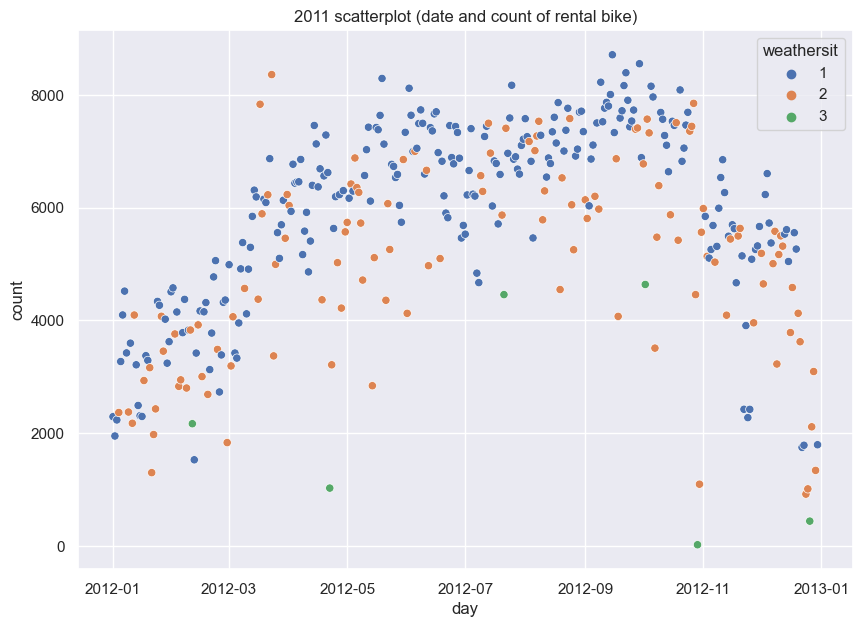

In [305]:
palette = sns.color_palette("deep", as_cmap=True)
plt.figure(figsize=(10,7))
sns.scatterplot(data = year2011, x = year2011["dteday"], y = year2011["cnt"], hue = year2011["weathersit"], palette=palette)
plt.title("2011 scatterplot (date and count of rental bike)")
plt.xlabel("day")
plt.ylabel("count")

plt.show()

C:\Users\satom\AppData\Local\Temp\ipykernel_13848\3970020199.py:3: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(data = year2012, x = year2012["dteday"], y = year2012["cnt"],hue = year2012["weathersit"], palette=palette)


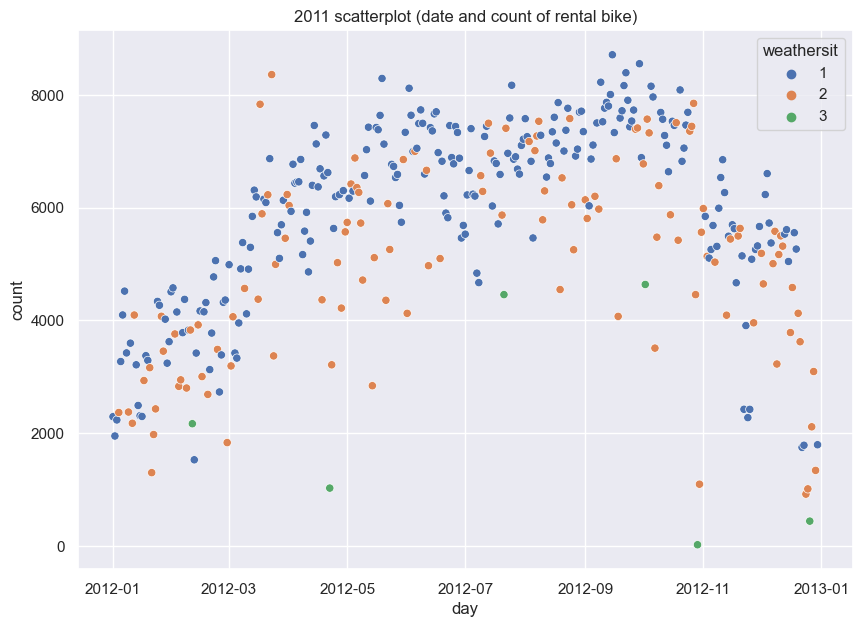

In [307]:
palette = sns.color_palette("deep", as_cmap=True)
plt.figure(figsize=(10,7))
sns.scatterplot(data = year2012, x = year2012["dteday"], y = year2012["cnt"],hue = year2012["weathersit"], palette=palette)
plt.title("2011 scatterplot (date and count of rental bike)")
plt.xlabel("day")
plt.ylabel("count")

plt.show()

C:\Users\satom\AppData\Local\Temp\ipykernel_13848\573867356.py:3: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(data = year2011, x = year2011["temp_in_cel"], y = year2011["cnt"], hue = year2011["weathersit"], palette = palette)


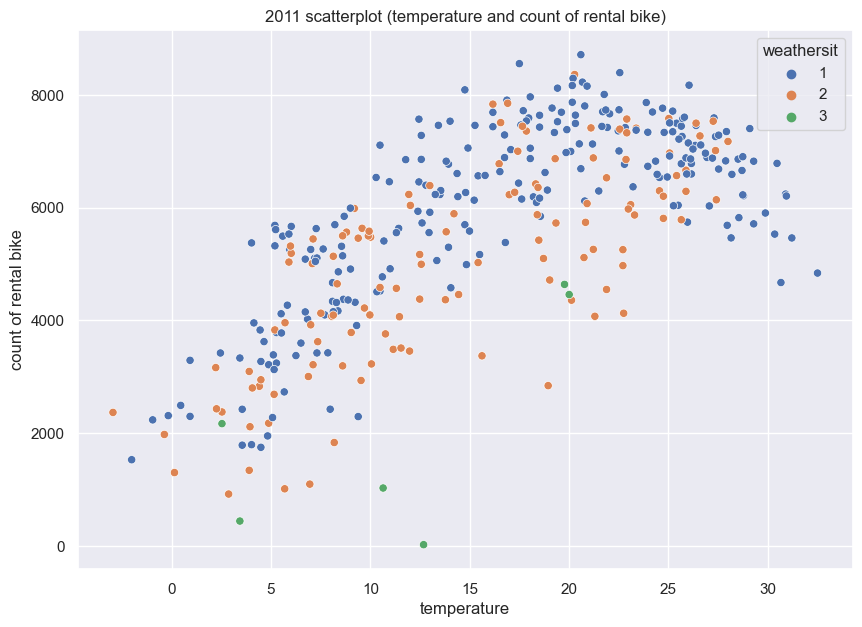

In [308]:
palette = sns.color_palette("deep", as_cmap=True)
plt.figure(figsize=(10,7))
sns.scatterplot(data = year2011, x = year2011["temp_in_cel"], y = year2011["cnt"], hue = year2011["weathersit"], palette = palette)
plt.title("2011 scatterplot (temperature and count of rental bike)")
plt.xlabel("temperature")
plt.ylabel("count of rental bike")

plt.show()

C:\Users\satom\AppData\Local\Temp\ipykernel_13848\3014172011.py:3: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(data = year2012, x = year2012["temp_in_cel"], y = year2012["cnt"], hue=year2012["weathersit"], palette=palette)


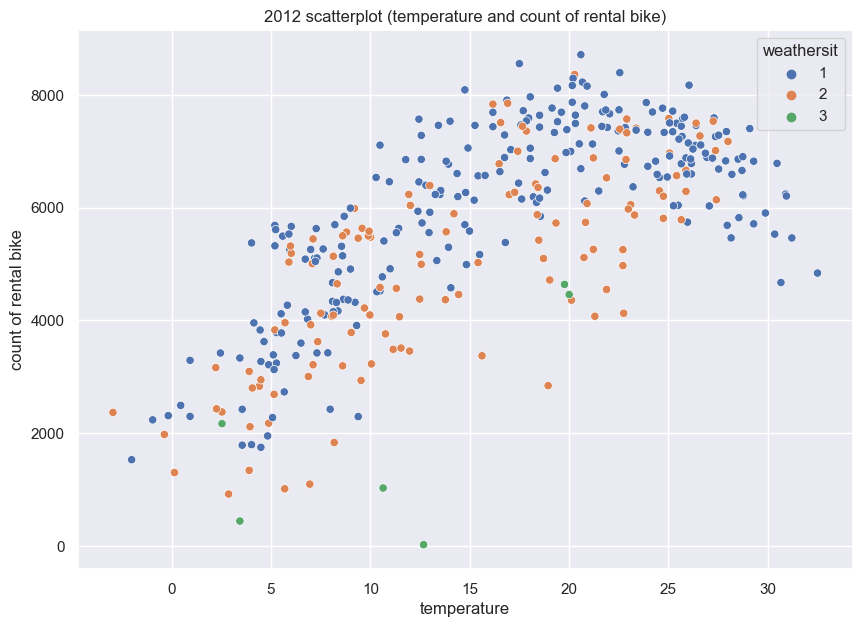

In [309]:
palette = sns.color_palette("deep", as_cmap=True)
plt.figure(figsize=(10,7))
sns.scatterplot(data = year2012, x = year2012["temp_in_cel"], y = year2012["cnt"], hue=year2012["weathersit"], palette=palette)
plt.title("2012 scatterplot (temperature and count of rental bike)")
plt.xlabel("temperature")
plt.ylabel("count of rental bike")

plt.show()

1. monthly count in both casual users and registerd users (from 2011/01 to 2012/12 )

In [ ]:
df_day.groupby(df_day.dteday.dt.month)['cnt'].sum()
# result of this is the sum of monthly count 2011 and 2012. I want to have separeted monthly count, so 24 different counts. 

dteday
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64

In [ ]:
df_day.groupby(df_day.dteday.dt.month)['cnt'].mean().round()


dteday
1     2176.0
2     2655.0
3     3692.0
4     4485.0
5     5350.0
6     5772.0
7     5564.0
8     5664.0
9     5767.0
10    5199.0
11    4247.0
12    3404.0
Name: cnt, dtype: float64

In [ ]:
df_day.groupby(df_day.dteday.dt.month)['registered'].mean().round()


dteday
1     1982.0
2     2393.0
3     2975.0
4     3472.0
5     4136.0
6     4541.0
7     4303.0
8     4502.0
9     4594.0
10    4235.0
11    3637.0
12    3054.0
Name: registered, dtype: float64

In [178]:
df_day["monthly"] = df_day["dteday"]
df_day

instant     dteday  season  yr  mnth  holiday    weekday  workingday  \
0          1 2011-01-01       1   0     1        0   Saturday           0   
1          2 2011-01-02       1   0     1        0     Sunday           0   
2          3 2011-01-03       1   0     1        0     Monday           1   
3          4 2011-01-04       1   0     1        0    Tuesday           1   
4          5 2011-01-05       1   0     1        0  Wednesday           1   
..       ...        ...     ...  ..   ...      ...        ...         ...   
726      727 2012-12-27       1   1    12        0   Thursday           1   
727      728 2012-12-28       1   1    12        0     Friday           1   
728      729 2012-12-29       1   1    12        0   Saturday           0   
729      730 2012-12-30       1   1    12        0     Sunday           0   
730      731 2012-12-31       1   1    12        0     Monday           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  year    monthly  
0     985  2011 2011-01-01  
1     801  2011 2011-01-02  
2    1349  2011 2011-01-03  
3    1562  2011 2011-01-04  
4    1600  2011 2011-01-05  
..    ...   ...        ...  
726  2114  2012 2012-12-27  
727  3095  2012 2012-12-28  
728  1341  2012 2012-12-29  
729  1796  2012 2012-12-30  
730  2729  2012 2012-12-31  

[731 rows x 18 columns]

In [ ]:
df_hour

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1 2011-01-01       1   0     1   0        0        6           0   
1            2 2011-01-01       1   0     1   1        0        6           0   
2            3 2011-01-01       1   0     1   2        0        6           0   
3            4 2011-01-01       1   0     1   3        0        6           0   
4            5 2011-01-01       1   0     1   4        0        6           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375 2012-12-31       1   1    12  19        0        1           1   
17375    17376 2012-12-31       1   1    12  20        0        1           1   
17376    17377 2012-12-31       1   1    12  21        0        1           1   
17377    17378 2012-12-31       1   1    12  22        0        1           1   
17378    17379 2012-12-31       1   1    12  23        0        1           1   

       weathersit  ...   hum  windspeed  casual  registered  cnt  year  \
0               1  ...  0.81     0.0000       3          13   16  2011   
1               1  ...  0.80     0.0000       8          32   40  2011   
2               1  ...  0.80     0.0000       5          27   32  2011   
3               1  ...  0.75     0.0000       3          10   13  2011   
4               1  ...  0.75     0.0000       0           1    1  2011   
...           ...  ...   ...        ...     ...         ...  ...   ...   
17374           2  ...  0.60     0.1642      11         108  119  2012   
17375           2  ...  0.60     0.1642       8          81   89  2012   
17376           1  ...  0.60     0.1642       7          83   90  2012   
17377           1  ...  0.56     0.1343      13          48   61  2012   
17378           1  ...  0.65     0.1343      12          37   49  2012   

       is_weekend  temp_in_cel feeling_temp_in_cel  windspeed_a  
0            True         3.28              3.0014       0.0000  
1            True         2.34              1.9982       0.0000  
2            True         2.34              1.9982       0.0000  
3            True         3.28              3.0014       0.0000  
4            True         3.28              3.0014       0.0000  
...           ...          ...                 ...          ...  
17374       False         4.22              1.0016      11.0014  
17375       False         4.22              1.0016      11.0014  
17376       False         4.22              1.0016      11.0014  
17377       False         4.22              1.9982       8.9981  
17378       False         4.22              1.9982       8.9981  

[17379 rows x 22 columns]

In [ ]:
#https://stackoverflow.com/questions/52473972/pandas-convert-hour-index-integer-to-datetime
df_hour['Time'] = pd.to_timedelta(df_hour['hr'], unit='H')
df_hour

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1 2011-01-01       1   0     1   0        0        6           0   
1            2 2011-01-01       1   0     1   1        0        6           0   
2            3 2011-01-01       1   0     1   2        0        6           0   
3            4 2011-01-01       1   0     1   3        0        6           0   
4            5 2011-01-01       1   0     1   4        0        6           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375 2012-12-31       1   1    12  19        0        1           1   
17375    17376 2012-12-31       1   1    12  20        0        1           1   
17376    17377 2012-12-31       1   1    12  21        0        1           1   
17377    17378 2012-12-31       1   1    12  22        0        1           1   
17378    17379 2012-12-31       1   1    12  23        0        1           1   

       weathersit  ...  windspeed  casual  registered  cnt  year  is_weekend  \
0               1  ...     0.0000       3          13   16  2011        True   
1               1  ...     0.0000       8          32   40  2011        True   
2               1  ...     0.0000       5          27   32  2011        True   
3               1  ...     0.0000       3          10   13  2011        True   
4               1  ...     0.0000       0           1    1  2011        True   
...           ...  ...        ...     ...         ...  ...   ...         ...   
17374           2  ...     0.1642      11         108  119  2012       False   
17375           2  ...     0.1642       8          81   89  2012       False   
17376           1  ...     0.1642       7          83   90  2012       False   
17377           1  ...     0.1343      13          48   61  2012       False   
17378           1  ...     0.1343      12          37   49  2012       False   

       temp_in_cel  feeling_temp_in_cel windspeed_a            Time  
0             3.28               3.0014      0.0000 0 days 00:00:00  
1             2.34               1.9982      0.0000 0 days 01:00:00  
2             2.34               1.9982      0.0000 0 days 02:00:00  
3             3.28               3.0014      0.0000 0 days 03:00:00  
4             3.28               3.0014      0.0000 0 days 04:00:00  
...            ...                  ...         ...             ...  
17374         4.22               1.0016     11.0014 0 days 19:00:00  
17375         4.22               1.0016     11.0014 0 days 20:00:00  
17376         4.22               1.0016     11.0014 0 days 21:00:00  
17377         4.22               1.9982      8.9981 0 days 22:00:00  
17378         4.22               1.9982      8.9981 0 days 23:00:00  

[17379 rows x 23 columns]

In [ ]:
df_hour['DateandTime'] = df_hour["dteday"] + df_hour['Time']
df_hour


instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1 2011-01-01       1   0     1   0        0        6           0   
1            2 2011-01-01       1   0     1   1        0        6           0   
2            3 2011-01-01       1   0     1   2        0        6           0   
3            4 2011-01-01       1   0     1   3        0        6           0   
4            5 2011-01-01       1   0     1   4        0        6           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375 2012-12-31       1   1    12  19        0        1           1   
17375    17376 2012-12-31       1   1    12  20        0        1           1   
17376    17377 2012-12-31       1   1    12  21        0        1           1   
17377    17378 2012-12-31       1   1    12  22        0        1           1   
17378    17379 2012-12-31       1   1    12  23        0        1           1   

       weathersit  ...  casual  registered  cnt  year  is_weekend  \
0               1  ...       3          13   16  2011        True   
1               1  ...       8          32   40  2011        True   
2               1  ...       5          27   32  2011        True   
3               1  ...       3          10   13  2011        True   
4               1  ...       0           1    1  2011        True   
...           ...  ...     ...         ...  ...   ...         ...   
17374           2  ...      11         108  119  2012       False   
17375           2  ...       8          81   89  2012       False   
17376           1  ...       7          83   90  2012       False   
17377           1  ...      13          48   61  2012       False   
17378           1  ...      12          37   49  2012       False   

       temp_in_cel  feeling_temp_in_cel  windspeed_a            Time  \
0             3.28               3.0014       0.0000 0 days 00:00:00   
1             2.34               1.9982       0.0000 0 days 01:00:00   
2             2.34               1.9982       0.0000 0 days 02:00:00   
3             3.28               3.0014       0.0000 0 days 03:00:00   
4             3.28               3.0014       0.0000 0 days 04:00:00   
...            ...                  ...          ...             ...   
17374         4.22               1.0016      11.0014 0 days 19:00:00   
17375         4.22               1.0016      11.0014 0 days 20:00:00   
17376         4.22               1.0016      11.0014 0 days 21:00:00   
17377         4.22               1.9982       8.9981 0 days 22:00:00   
17378         4.22               1.9982       8.9981 0 days 23:00:00   

              DateandTime  
0     2011-01-01 00:00:00  
1     2011-01-01 01:00:00  
2     2011-01-01 02:00:00  
3     2011-01-01 03:00:00  
4     2011-01-01 04:00:00  
...                   ...  
17374 2012-12-31 19:00:00  
17375 2012-12-31 20:00:00  
17376 2012-12-31 21:00:00  
17377 2012-12-31 22:00:00  
17378 2012-12-31 23:00:00  

[17379 rows x 24 columns]

In [ ]:
Jan_2011 = df_hour.loc[(df_hour['dteday'] >= '2011-01-01') & (df_hour['dteday'] <= '2011-01-31')]

In [ ]:
Jan_2011

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1   0        0        6           0   
1          2 2011-01-01       1   0     1   1        0        6           0   
2          3 2011-01-01       1   0     1   2        0        6           0   
3          4 2011-01-01       1   0     1   3        0        6           0   
4          5 2011-01-01       1   0     1   4        0        6           0   
..       ...        ...     ...  ..   ...  ..      ...      ...         ...   
683      684 2011-01-31       1   0     1  19        0        1           1   
684      685 2011-01-31       1   0     1  20        0        1           1   
685      686 2011-01-31       1   0     1  21        0        1           1   
686      687 2011-01-31       1   0     1  22        0        1           1   
687      688 2011-01-31       1   0     1  23        0        1           1   

     weathersit  ...  casual  registered  cnt  year  is_weekend  temp_in_cel  \
0             1  ...       3          13   16  2011        True         3.28   
1             1  ...       8          32   40  2011        True         2.34   
2             1  ...       5          27   32  2011        True         2.34   
3             1  ...       3          10   13  2011        True         3.28   
4             1  ...       0           1    1  2011        True         3.28   
..          ...  ...     ...         ...  ...   ...         ...          ...   
683           1  ...       3         108  111  2011       False         6.10   
684           3  ...       0          78   78  2011       False        -0.48   
685           3  ...       3          53   56  2011       False        -0.48   
686           2  ...       0          34   34  2011       False        -0.48   
687           2  ...       2          15   17  2011       False        -0.48   

     feeling_temp_in_cel  windspeed_a            Time         DateandTime  
0                 3.0014       0.0000 0 days 00:00:00 2011-01-01 00:00:00  
1                 1.9982       0.0000 0 days 01:00:00 2011-01-01 01:00:00  
2                 1.9982       0.0000 0 days 02:00:00 2011-01-01 02:00:00  
3                 3.0014       0.0000 0 days 03:00:00 2011-01-01 03:00:00  
4                 3.0014       0.0000 0 days 04:00:00 2011-01-01 04:00:00  
..                   ...          ...             ...                 ...  
683               5.0012       7.0015 0 days 19:00:00 2011-01-31 19:00:00  
684              -4.9978      11.0014 0 days 20:00:00 2011-01-31 20:00:00  
685              -2.9980       6.0032 0 days 21:00:00 2011-01-31 21:00:00  
686              -4.0012       7.0015 0 days 22:00:00 2011-01-31 22:00:00  
687              -2.9980       6.0032 0 days 23:00:00 2011-01-31 23:00:00  

[688 rows x 24 columns]

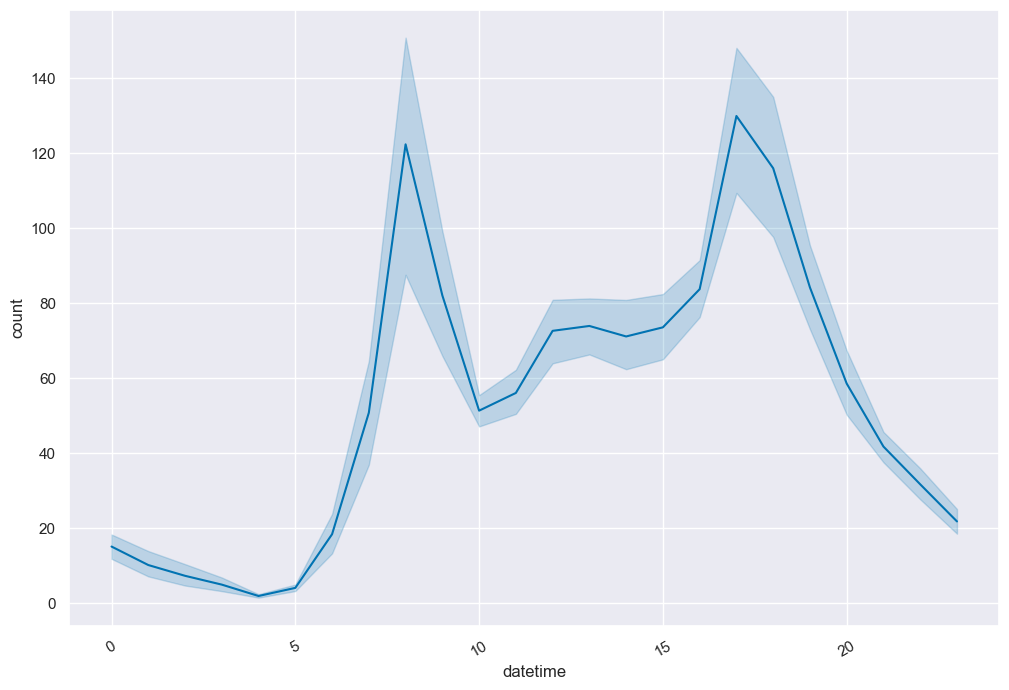

In [ ]:

fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(data = Jan_2011, x = Jan_2011["hr"], y =Jan_2011["cnt"])
#ax.set_xlim("2011-01-01", "2011-02-28")
plt.xticks(rotation=30)
plt.xlabel("datetime")
plt.ylabel("count")
plt.show()

In [ ]:
date

0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: dteday, Length: 731, dtype: datetime64[ns]

In [ ]:
aug28_2012 = df_hour.loc[(df_hour['dteday'] == '2012-08-28') ]
aug28_2012

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
14395    14396 2012-08-28       3   1     8   0        0        2           1   
14396    14397 2012-08-28       3   1     8   1        0        2           1   
14397    14398 2012-08-28       3   1     8   2        0        2           1   
14398    14399 2012-08-28       3   1     8   3        0        2           1   
14399    14400 2012-08-28       3   1     8   4        0        2           1   
14400    14401 2012-08-28       3   1     8   5        0        2           1   
14401    14402 2012-08-28       3   1     8   6        0        2           1   
14402    14403 2012-08-28       3   1     8   7        0        2           1   
14403    14404 2012-08-28       3   1     8   8        0        2           1   
14404    14405 2012-08-28       3   1     8   9        0        2           1   
14405    14406 2012-08-28       3   1     8  10        0        2           1   
14406    14407 2012-08-28       3   1     8  11        0        2           1   
14407    14408 2012-08-28       3   1     8  12        0        2           1   
14408    14409 2012-08-28       3   1     8  13        0        2           1   
14409    14410 2012-08-28       3   1     8  14        0        2           1   
14410    14411 2012-08-28       3   1     8  15        0        2           1   
14411    14412 2012-08-28       3   1     8  16        0        2           1   
14412    14413 2012-08-28       3   1     8  17        0        2           1   
14413    14414 2012-08-28       3   1     8  18        0        2           1   
14414    14415 2012-08-28       3   1     8  19        0        2           1   
14415    14416 2012-08-28       3   1     8  20        0        2           1   
14416    14417 2012-08-28       3   1     8  21        0        2           1   
14417    14418 2012-08-28       3   1     8  22        0        2           1   
14418    14419 2012-08-28       3   1     8  23        0        2           1   

       weathersit  ...  casual  registered  cnt  year  is_weekend  \
14395           1  ...       9          29   38  2012       False   
14396           1  ...       4          17   21  2012       False   
14397           1  ...       2          13   15  2012       False   
14398           1  ...       0           4    4  2012       False   
14399           1  ...       2           6    8  2012       False   
14400           2  ...       3          39   42  2012       False   
14401           2  ...       3         144  147  2012       False   
14402           2  ...      14         255  269  2012       False   
14403           2  ...      25         668  693  2012       False   
14404           2  ...      44         351  395  2012       False   
14405           1  ...      39         165  204  2012       False   
14406           1  ...      47         171  218  2012       False   
14407           1  ...      56         241  297  2012       False   
14408           1  ...      56         232  288  2012       False   
14409           1  ...      72         179  251  2012       False   
14410           1  ...      59         258  317  2012       False   
14411           1  ...      84         396  480  2012       False   
14412           1  ...      90         774  864  2012       False   
14413           1  ...      82         736  818  2012       False   
14414           1  ...      82         515  597  2012       False   
14415           1  ...      87         348  435  2012       False   
14416           1  ...      38         276  314  2012       False   
14417           1  ...      20         196  216  2012       False   
14418           1  ...      17          92  109  2012       False   

       temp_in_cel  feeling_temp_in_cel  windspeed_a            Time  \
14395        24.90              28.0022      16.9979 0 days 00:00:00   
14396        23.96              26.0024      12.9980 0 days 01:00:00   
14397        23.96              26.0024

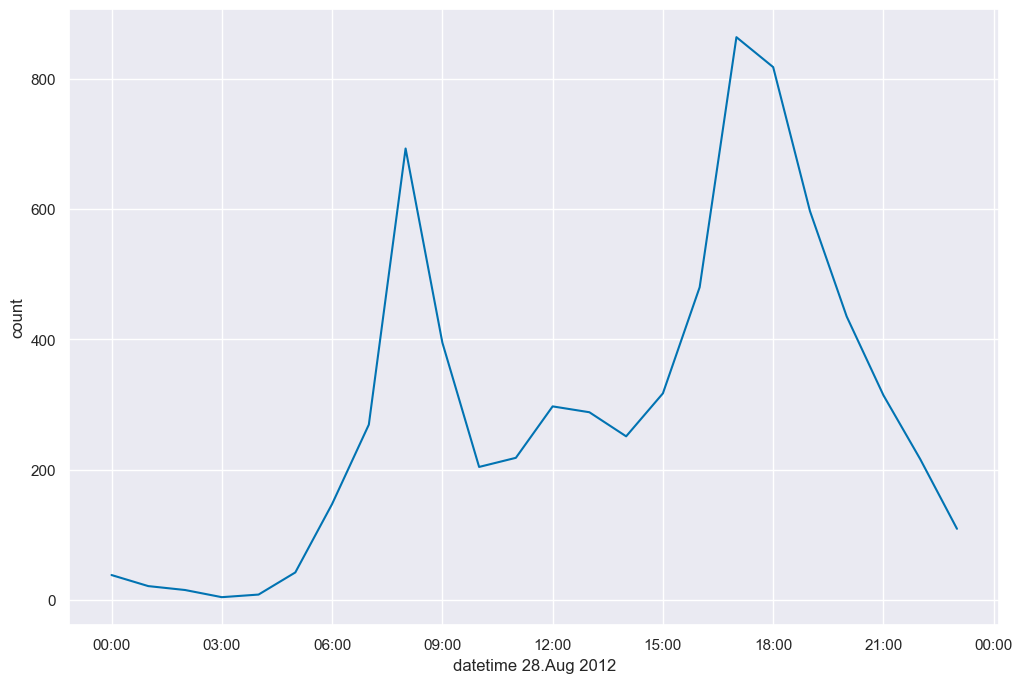

In [ ]:
date = aug28_2012["DateandTime"]
count = aug28_2012["cnt"]
fig, ax = plt.subplots(figsize = (12,8))
ax = sns.lineplot(x =date, y =count, )
#ax.set_xlim("2011-01-01", "2011-02-28")
plt.xticks(rotation=0)
plt.xlabel("datetime 28.Aug 2012")
plt.ylabel("count")
ax.xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))
""" x = np.arange(0,24)
plt.xticks(x) """
plt.show()

KeyError: 'windspeed_a'

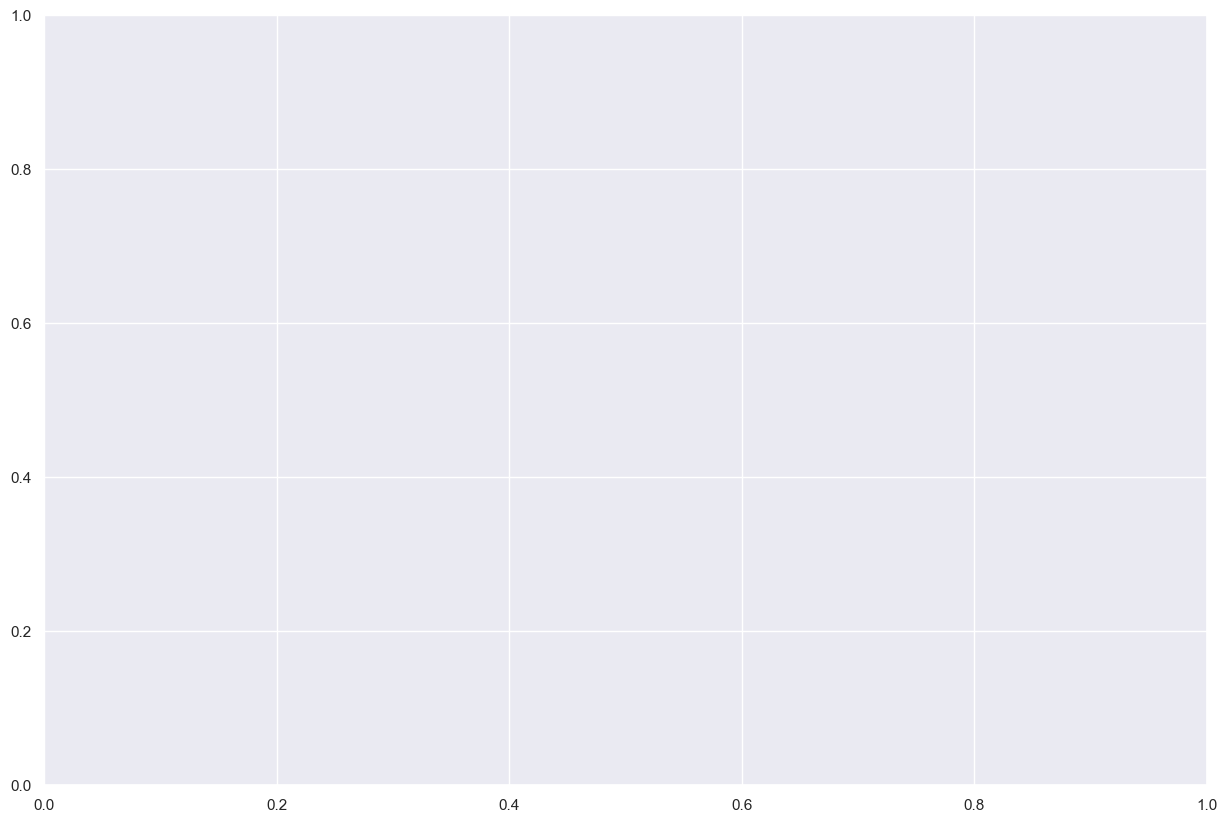

In [ ]:
year2011 = df_day.loc[(df_day['dteday'] >= '2011-01-01') & (df_day['dteday'] < '2011-12-31')]

legend_list = ["windspeed", "count"]
fig, ax1 = plt.subplots(figsize = (15,10))
count = year2011["cnt"]
temperature = year2011["windspeed_a"]

ax1.bar(year2011["dteday"], temperature, color = "orange", label = "windspeed")
ax1.set_ylabel("windspeed", fontsize = 14)

ax2 = ax1.twinx()
ax2.plot(year2011["dteday"], count, color = "blue", label = "count")
ax2.set_ylabel("count", fontsize = 16)

ax2.xaxis.set_major_formatter(dt.DateFormatter('%m/%d')) #dt.DateFormatter(%m/%d) DateFormatterは日付形式の設定、()内は表示する日付形式
ax2.xaxis.set_major_locator(dt.DayLocator(interval =7))
plt.title("windspeed and Bike rental count: 2011")

plt.legend() 
plt.show()

In [ ]:
Q32011 = df_day.loc[(df_day['dteday'] >= '2011-01-01') & (df_day['dteday'] <= '2011-01-31')]



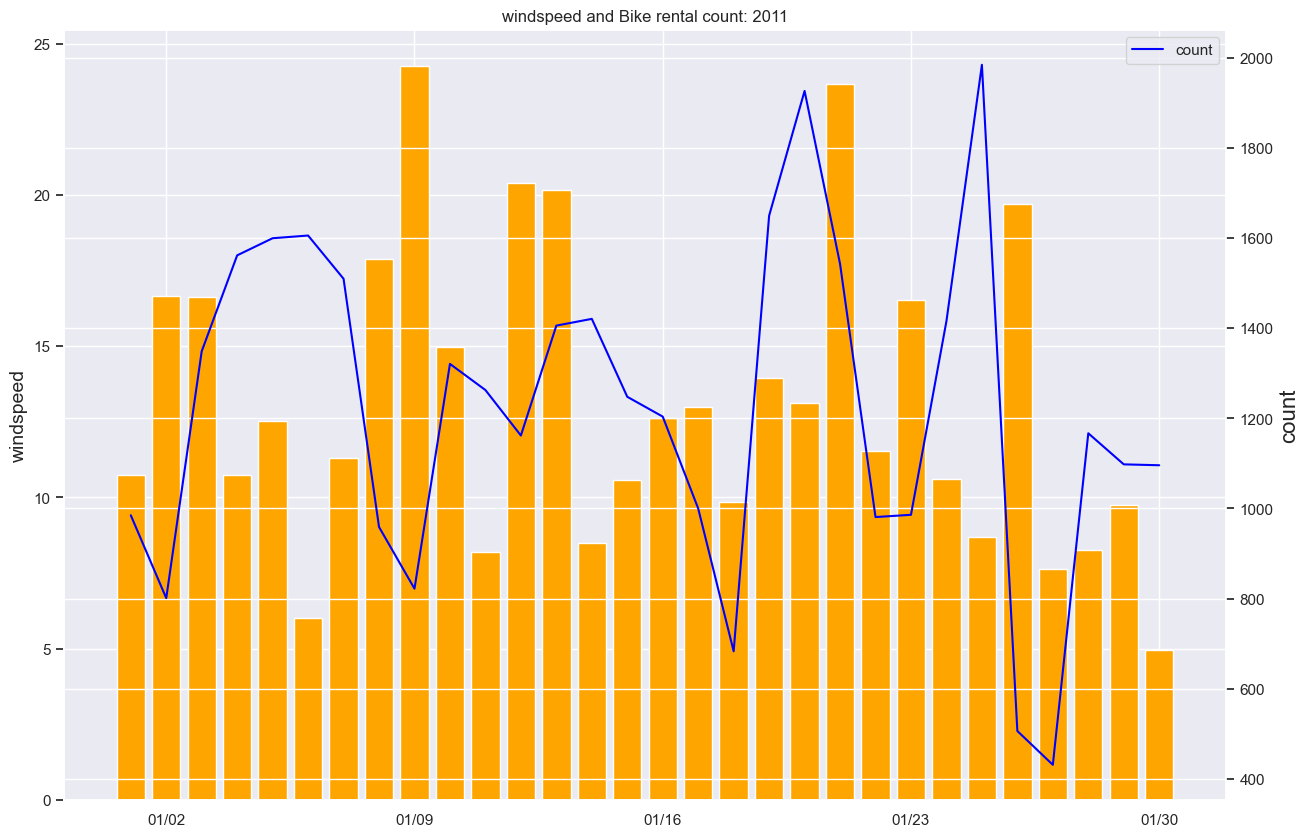

In [ ]:
Q32011 = df_day.loc[(df_day['dteday'] >= '2011-01-01') & (df_day['dteday'] < '2011-01-31')]

legend_list = ["windspeed", "count"]
fig, ax1 = plt.subplots(figsize = (15,10))
count = Q32011["cnt"]
temperature = Q32011["windspeed_a"]

ax1.bar(Q32011["dteday"], temperature, color = "orange", label = "windspeed")
ax1.set_ylabel("windspeed", fontsize = 14)

ax2 = ax1.twinx()
ax2.plot(Q32011["dteday"], count, color = "blue", label = "count")
ax2.set_ylabel("count", fontsize = 16)

ax2.xaxis.set_major_formatter(dt.DateFormatter('%m/%d')) #dt.DateFormatter(%m/%d) DateFormatterは日付形式の設定、()内は表示する日付形式
ax2.xaxis.set_major_locator(dt.DayLocator(interval =7))
plt.title("windspeed and Bike rental count: 2011")

plt.legend() 
plt.show()

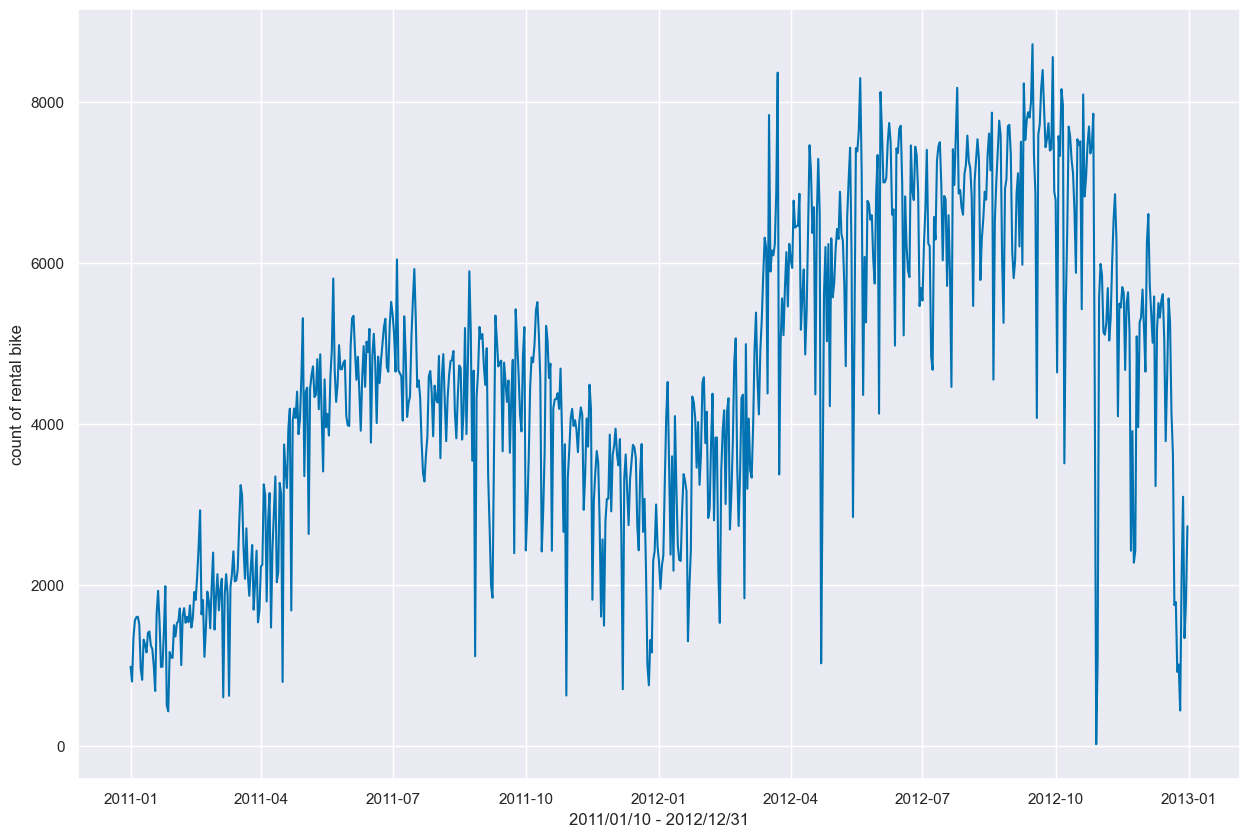

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(data = df_day, x = df_day["dteday"], y = df_day["cnt"] )
plt.ylabel("count of rental bike")
plt.xlabel("2011/01/10 - 2012/12/31")
plt.show()

In [ ]:
df_day.loc[(df_day["weathersit"] == 3)]

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
25        26 2011-01-26       1   0     1        0        3           1   
68        69 2011-03-10       1   0     3        0        4           1   
89        90 2011-03-31       2   0     3        0        4           1   
105      106 2011-04-16       2   0     4        0        6           0   
248      249 2011-09-06       3   0     9        0        2           1   
249      250 2011-09-07       3   0     9        0        3           1   
250      251 2011-09-08       3   0     9        0        4           1   
284      285 2011-10-12       4   0    10        0        3           1   
291      292 2011-10-19       4   0    10        0        3           1   
301      302 2011-10-29       4   0    10        0        6           0   
319      320 2011-11-16       4   0    11        0        3           1   
324      325 2011-11-21       4   0    11        0        1           1   
325      326 2011-11-22       4   0    11        0        2           1   
339      340 2011-12-06       4   0    12        0        2           1   
340      341 2011-12-07       4   0    12        0        3           1   
406      407 2012-02-11       1   1     2        0        6           0   
477      478 2012-04-22       2   1     4        0        0           0   
567      568 2012-07-21       3   1     7        0        6           0   
640      641 2012-10-02       4   1    10        0        2           1   
667      668 2012-10-29       4   1    10        0        1           1   
725      726 2012-12-26       1   1    12        0        3           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
25            3  0.217500  0.203600  0.862500   0.293850      34         472   
68            3  0.389091  0.385668  0.000000   0.261877      46         577   
89            3  0.268333  0.257575  0.918333   0.217646     179        1506   
105           3  0.430833  0.425492  0.888333   0.340808     121         674   
248           3  0.540000  0.515200  0.886957   0.343943     204        2506   
249           3  0.599167  0.544229  0.917083   0.097021     118        1878   
250           3  0.633913  0.555361  0.939565   0.192748     153        1689   
284           3  0.543333  0.517717  0.906250   0.248150     217        2199   
291           3  0.541739  0.513848  0.895217   0.243339     254        2170   
301           3  0.254167  0.227913  0.882500   0.351371      57         570   
319           3  0.456667  0.451988  0.930000   0.136829     145        1672   
324           3  0.447500  0.445062  0.910000   0.138054     220        2545   
325           3  0.416667  0.421696  0.962500   0.118792      69        1538   
339           3  0.462500  0.456400  0.949583   0.232583     126        2468   
340           3  0.410000  0.400246  0.970417   0.266175      50         655   
406           3  0.224167  0.210867  0.731250   0.289796     192        1977   
477           3  0.396667  0.389504  0.835417   0.344546     120         907   
567           3  0.595833  0.549912  0.865417   0.213300    1264        3195   
640           3  0.590833  0.542333  0.871667   0.104475     315        4324   
667           3  0.440000  0.439400  0.880000   0.358200       2          20   
725           3  0.243333  0.220333  0.823333   0.316546       9         432   

      cnt  
25    506  
68    623  
89   1685  
105   795  
248  2710  
249  1996  
250  1842  
284  2416  
291  2424  
301   627  
319  1817  
324  2765  
325  1607  
339  2594  
340   705  
406  2169  
477  1027  
567  4459  
640  4639  
667    22  
725   441

In [ ]:
len(df_day.loc[(df_day["weathersit"] == 3)])

21

In [ ]:
len(df_day.loc[(df_day["weathersit"] == 4)])

0

In [ ]:
df_day.loc[(df_day["dteday"] == "2012-04")]

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
456      457 2012-04-01       2   1     4        0        0           0   

     weathersit      temp     atemp      hum  windspeed  casual  registered  \
456           2  0.425833  0.417287  0.67625   0.172267    2347        3694   

      cnt  year  
456  6041  2012

In [ ]:
year2011

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
359      360 2011-12-26       1   0    12        1        1           0   
360      361 2011-12-27       1   0    12        0        2           1   
361      362 2011-12-28       1   0    12        0        3           1   
362      363 2011-12-29       1   0    12        0        4           1   
363      364 2011-12-30       1   0    12        0        5           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
359           1  0.321739  0.315535  0.506957   0.239465     430         887   
360           2  0.325000  0.327633  0.762500   0.188450     103        1059   
361           1  0.299130  0.279974  0.503913   0.293961     255        2047   
362           1  0.248333  0.263892  0.574167   0.119412     254        2169   
363           1  0.311667  0.318812  0.636667   0.134337     491        2508   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
359  1317  
360  1162  
361  2302  
362  2423  
363  2999  

[364 rows x 16 columns]

In [ ]:
year2012

NameError: name 'year2012' is not defined

# I will look at the growth rate of casual users from 2011 to 2012

In [200]:
cas_mnth_avg11 = year2011.groupby(year2011.mnth)["casual"].mean()
cas_mnth_avg11

mnth
1       99.129032
2      222.928571
3      413.741935
4      744.866667
5     1001.612903
6     1020.400000
7     1175.870968
8      930.387097
9      884.833333
10     813.612903
11     519.800000
12     272.516129
Name: casual, dtype: float64

In [201]:
cas_mnth_avg12 = year2012.groupby(year2012.mnth)["casual"].mean()
cas_mnth_avg12

mnth
1      289.322581
2      300.724138
3     1019.935484
4     1281.866667
5     1426.935484
6     1443.133333
7     1345.322581
8     1393.451613
9     1459.266667
10    1114.129032
11     700.300000
12     427.258065
Name: casual, dtype: float64

In [264]:
cas_growth = pd.concat([cas_mnth_avg11, cas_mnth_avg12], axis = 1)
cas_growth

casual       casual
mnth                          
1       99.129032   289.322581
2      222.928571   300.724138
3      413.741935  1019.935484
4      744.866667  1281.866667
5     1001.612903  1426.935484
6     1020.400000  1443.133333
7     1175.870968  1345.322581
8      930.387097  1393.451613
9      884.833333  1459.266667
10     813.612903  1114.129032
11     519.800000   700.300000
12     272.516129   427.258065

In [265]:
cas_growth.columns = ["casual 2011", "casual 2012"]
cas_growth

casual 2011  casual 2012
mnth                          
1       99.129032   289.322581
2      222.928571   300.724138
3      413.741935  1019.935484
4      744.866667  1281.866667
5     1001.612903  1426.935484
6     1020.400000  1443.133333
7     1175.870968  1345.322581
8      930.387097  1393.451613
9      884.833333  1459.266667
10     813.612903  1114.129032
11     519.800000   700.300000
12     272.516129   427.258065

In [266]:
cas_growth["growth rate"] = ((cas_growth["casual 2012"] - cas_growth["casual 2011"])/cas_growth["casual 2011"]).round(2)
cas_growth["casual 2011"] = cas_growth["casual 2011"].round()
cas_growth["casual 2012"] = cas_growth["casual 2012"].round()
cas_growth


casual 2011  casual 2012  growth rate
mnth                                       
1            99.0        289.0         1.92
2           223.0        301.0         0.35
3           414.0       1020.0         1.47
4           745.0       1282.0         0.72
5          1002.0       1427.0         0.42
6          1020.0       1443.0         0.41
7          1176.0       1345.0         0.14
8           930.0       1393.0         0.50
9           885.0       1459.0         0.65
10          814.0       1114.0         0.37
11          520.0        700.0         0.35
12          273.0        427.0         0.57

In [268]:
cas_growth[["casual 2011", "casual 2012"]] = cas_growth[["casual 2011", "casual 2012"]].astype(int)

In [278]:
cas_growth["growth rate"] = cas_growth["growth rate"] *100
cas_growth

casual 2011  casual 2012  growth rate
mnth                                       
1              99          289        192.0
2             223          301         35.0
3             414         1020        147.0
4             745         1282         72.0
5            1002         1427         42.0
6            1020         1443         41.0
7            1176         1345         14.0
8             930         1393         50.0
9             885         1459         65.0
10            814         1114         37.0
11            520          700         35.0
12            273          427         57.0

In [282]:
cas_growth.to_csv("growth_rate_casual.csv", sep = ";",)

In [206]:
cas_growth.to_csv

<bound method NDFrame.to_csv of       casual 2011  casual 2012  growth rate
mnth                                       
1       99.129032   289.322581         1.92
2      222.928571   300.724138         0.35
3      413.741935  1019.935484         1.47
4      744.866667  1281.866667         0.72
5     1001.612903  1426.935484         0.42
6     1020.400000  1443.133333         0.41
7     1175.870968  1345.322581         0.14
8      930.387097  1393.451613         0.50
9      884.833333  1459.266667         0.65
10     813.612903  1114.129032         0.37
11     519.800000   700.300000         0.35
12     272.516129   427.258065         0.57>

In [ ]:
growth_total_11_cas =( (cas_growth["casual 2012"].sum()) - (cas_growth["casual 2011"].sum())) / (cas_growth["casual 2011"].sum())
growth_total_11_cas

0.5064318848248232

In [ ]:
a = (cas_growth["growth rate"].sum())/ 12
a

0.6556728549622055

In [ ]:
cas_growth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   casual 2011  12 non-null     int64  
 1   casual 2012  12 non-null     int64  
 2   growth       12 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 384.0 bytes


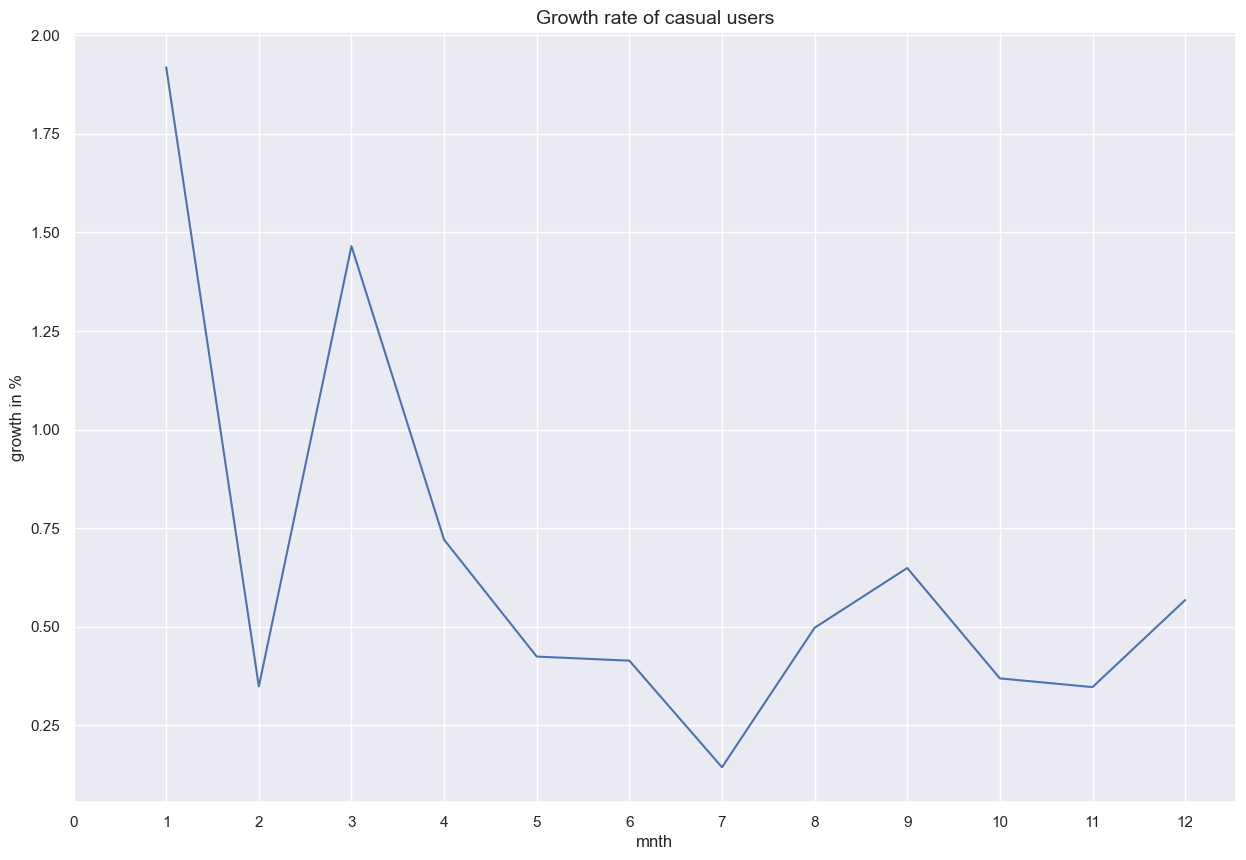

In [ ]:
plt.figure(figsize = (15,10))
sns.lineplot(data = cas_growth, x = cas_growth.index, y = cas_growth["growth rate"] )
xmarks = np.arange(13)
plt.xticks(xmarks)
plt.ylabel("growth in %")
plt.title("Growth rate of casual users", fontsize = 14)
plt.show()

In [ ]:
cas_growth["casual 2011"].mean()

674.9749615975421

In [ ]:
cas_growth["casual 2012"].mean()

1016.803803608948

In [ ]:
total_cas_growth = (1017 - 674)/675
total_cas_growth

0.5081481481481481

# Now I will look at growth rate of registered users from 2011 to 2012

In [184]:
reg_mnth_avg11 = year2011.groupby(year2011.mnth)["registered"].mean()
reg_mnth_avg11

mnth
1     1132.774194
2     1499.035714
3     1652.225806
4     2417.466667
5     3379.709677
6     3763.333333
7     3383.516129
8     3479.000000
9     3362.433333
10    3170.612903
11    2885.766667
12    2544.354839
Name: registered, dtype: float64

In [185]:
reg_mnth_avg12 = year2012.groupby(year2012.mnth)["registered"].mean()
reg_mnth_avg12

mnth
1     2831.451613
2     3255.724138
3     4298.612903
4     4525.600000
5     4891.290323
6     5317.866667
7     5222.645161
8     5526.000000
9     5826.500000
10    5300.096774
11    4388.500000
12    3563.483871
Name: registered, dtype: float64

In [195]:
reg_growth = pd.concat([reg_mnth_avg11, reg_mnth_avg12], axis = 1)
reg_growth.columns= ["registered 2011", "registered 2012"]
reg_growth

registered 2011  registered 2012
mnth                                  
1         1132.774194      2831.451613
2         1499.035714      3255.724138
3         1652.225806      4298.612903
4         2417.466667      4525.600000
5         3379.709677      4891.290323
6         3763.333333      5317.866667
7         3383.516129      5222.645161
8         3479.000000      5526.000000
9         3362.433333      5826.500000
10        3170.612903      5300.096774
11        2885.766667      4388.500000
12        2544.354839      3563.483871

In [198]:
reg_growth["growth rate"] = ((reg_growth["registered 2012"] - reg_growth["registered 2011"])/reg_growth["registered 2011"]).round(2)
reg_growth["registered 2011"] = reg_growth["registered 2011"].round()
reg_growth["registered 2012"] = reg_growth["registered 2012"].round()
reg_growth


registered 2011  registered 2012  growth rate
mnth                                               
1              1133.0           2831.0         1.50
2              1499.0           3256.0         1.17
3              1652.0           4299.0         1.60
4              2417.0           4526.0         0.87
5              3380.0           4891.0         0.45
6              3763.0           5318.0         0.41
7              3384.0           5223.0         0.54
8              3479.0           5526.0         0.59
9              3362.0           5826.0         0.73
10             3171.0           5300.0         0.67
11             2886.0           4388.0         0.52
12             2544.0           3563.0         0.40

In [274]:
reg_growth[["registered 2011", "registered 2012"]] = reg_growth[["registered 2011", "registered 2012"]].astype(int)

In [276]:
reg_growth["growth rate"] = reg_growth["growth rate"] /10000
reg_growth

registered 2011  registered 2012  growth rate
mnth                                               
1                1133             2831        150.0
2                1499             3256        117.0
3                1652             4299        160.0
4                2417             4526         87.0
5                3380             4891         45.0
6                3763             5318         41.0
7                3384             5223         54.0
8                3479             5526         59.0
9                3362             5826         73.0
10               3171             5300         67.0
11               2886             4388         52.0
12               2544             3563         40.0

In [283]:
reg_growth.to_csv("growth_rate_registered.csv", sep = ";")

In [199]:
growth_total_11_reg =( (reg_growth["registered 2012"].sum()) - (reg_growth["registered 2011"].sum())) / (reg_growth["registered 2011"].sum())
growth_total_11_reg

0.6818794000612183

In [183]:
plt.figure(figsize = (15,10))
sns.lineplot(data = reg_growth, x = reg_growth.index, y = reg_growth["growth rate"] )
xmarks = np.arange(13)
plt.xticks(xmarks)
plt.ylabel("growth in %")
plt.title("Growth rate of registered users", fontsize = 14)
plt.show()

NameError: name 'reg_growth' is not defined

<Figure size 1500x1000 with 0 Axes>

In [181]:
df_day

instant     dteday  season  yr  mnth  holiday    weekday  workingday  \
0          1 2011-01-01       1   0     1        0   Saturday           0   
1          2 2011-01-02       1   0     1        0     Sunday           0   
2          3 2011-01-03       1   0     1        0     Monday           1   
3          4 2011-01-04       1   0     1        0    Tuesday           1   
4          5 2011-01-05       1   0     1        0  Wednesday           1   
..       ...        ...     ...  ..   ...      ...        ...         ...   
726      727 2012-12-27       1   1    12        0   Thursday           1   
727      728 2012-12-28       1   1    12        0     Friday           1   
728      729 2012-12-29       1   1    12        0   Saturday           0   
729      730 2012-12-30       1   1    12        0     Sunday           0   
730      731 2012-12-31       1   1    12        0     Monday           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  year    monthly  
0     985  2011 2011-01-01  
1     801  2011 2011-01-02  
2    1349  2011 2011-01-03  
3    1562  2011 2011-01-04  
4    1600  2011 2011-01-05  
..    ...   ...        ...  
726  2114  2012 2012-12-27  
727  3095  2012 2012-12-28  
728  1341  2012 2012-12-29  
729  1796  2012 2012-12-30  
730  2729  2012 2012-12-31  

[731 rows x 18 columns]

In [180]:
df_day_new = df_day.set_index("dteday")
df_day_new

instant  season  yr  mnth  holiday    weekday  workingday  \
dteday                                                                  
2011-01-01        1       1   0     1        0   Saturday           0   
2011-01-02        2       1   0     1        0     Sunday           0   
2011-01-03        3       1   0     1        0     Monday           1   
2011-01-04        4       1   0     1        0    Tuesday           1   
2011-01-05        5       1   0     1        0  Wednesday           1   
...             ...     ...  ..   ...      ...        ...         ...   
2012-12-27      727       1   1    12        0   Thursday           1   
2012-12-28      728       1   1    12        0     Friday           1   
2012-12-29      729       1   1    12        0   Saturday           0   
2012-12-30      730       1   1    12        0     Sunday           0   
2012-12-31      731       1   1    12        0     Monday           1   

            weathersit      temp     atemp       hum  windspeed  casual  \
dteday                                                                    
2011-01-01           2  0.344167  0.363625  0.805833   0.160446     331   
2011-01-02           2  0.363478  0.353739  0.696087   0.248539     131   
2011-01-03           1  0.196364  0.189405  0.437273   0.248309     120   
2011-01-04           1  0.200000  0.212122  0.590435   0.160296     108   
2011-01-05           1  0.226957  0.229270  0.436957   0.186900      82   
...                ...       ...       ...       ...        ...     ...   
2012-12-27           2  0.254167  0.226642  0.652917   0.350133     247   
2012-12-28           2  0.253333  0.255046  0.590000   0.155471     644   
2012-12-29           2  0.253333  0.242400  0.752917   0.124383     159   
2012-12-30           1  0.255833  0.231700  0.483333   0.350754     364   
2012-12-31           2  0.215833  0.223487  0.577500   0.154846     439   

            registered   cnt  year    monthly  
dteday                                         
2011-01-01         654   985  2011 2011-01-01  
2011-01-02         670   801  2011 2011-01-02  
2011-01-03        1229  1349  2011 2011-01-03  
2011-01-04        1454  1562  2011 2011-01-04  
2011-01-05        1518  1600  2011 2011-01-05  
...                ...   ...   ...        ...  
2012-12-27        1867  2114  2012 2012-12-27  
2012-12-28        2451  3095  2012 2012-12-28  
2012-12-29        1182  1341  2012 2012-12-29  
2012-12-30        1432  1796  2012 2012-12-30  
2012-12-31        2290  2729  2012 2012-12-31  

[731 rows x 17 columns]

In [ ]:
mnthly_df_day = df_day_new.resample(rule = "M").mean().round()
mnthly_df_day

C:\Users\satom\AppData\Local\Temp\ipykernel_6224\3137933395.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mnthly_df_day = df_day_new.resample(rule = "M").mean().round()


instant  season   yr  mnth  holiday  workingday  weathersit  temp  \
dteday                                                                          
2011-01-31     16.0     1.0  0.0   1.0      0.0         1.0         1.0   0.0   
2011-02-28     46.0     1.0  0.0   2.0      0.0         1.0         1.0   0.0   
2011-03-31     75.0     1.0  0.0   3.0      0.0         1.0         2.0   0.0   
2011-04-30    106.0     2.0  0.0   4.0      0.0         1.0         2.0   0.0   
2011-05-31    136.0     2.0  0.0   5.0      0.0         1.0         1.0   1.0   
2011-06-30    166.0     2.0  0.0   6.0      0.0         1.0         1.0   1.0   
2011-07-31    197.0     3.0  0.0   7.0      0.0         1.0         1.0   1.0   
2011-08-31    228.0     3.0  0.0   8.0      0.0         1.0         1.0   1.0   
2011-09-30    258.0     3.0  0.0   9.0      0.0         1.0         2.0   1.0   
2011-10-31    289.0     4.0  0.0  10.0      0.0         1.0         2.0   0.0   
2011-11-30    320.0     4.0  0.0  11.0      0.0         1.0         1.0   0.0   
2011-12-31    350.0     3.0  0.0  12.0      0.0         1.0         1.0   0.0   
2012-01-31    381.0     1.0  1.0   1.0      0.0         1.0         1.0   0.0   
2012-02-29    411.0     1.0  1.0   2.0      0.0         1.0         1.0   0.0   
2012-03-31    441.0     1.0  1.0   3.0      0.0         1.0         1.0   0.0   
2012-04-30    472.0     2.0  1.0   4.0      0.0         1.0         1.0   0.0   
2012-05-31    502.0     2.0  1.0   5.0      0.0         1.0         1.0   1.0   
2012-06-30    532.0     2.0  1.0   6.0      0.0         1.0         1.0   1.0   
2012-07-31    563.0     3.0  1.0   7.0      0.0         1.0         1.0   1.0   
2012-08-31    594.0     3.0  1.0   8.0      0.0         1.0         1.0   1.0   
2012-09-30    624.0     3.0  1.0   9.0      0.0         1.0         1.0   1.0   
2012-10-31    655.0     4.0  1.0  10.0      0.0         1.0         2.0   1.0   
2012-11-30    686.0     4.0  1.0  11.0      0.0         1.0         1.0   0.0   
2012-12-31    716.0     3.0  1.0  12.0      0.0         1.0         2.0   0.0   

            atemp  hum  windspeed  casual  registered     cnt  temp_in_cel  \
dteday                                                                       
2011-01-31    0.0  1.0        0.0    99.0      1133.0  1232.0          1.0   
2011-02-28    0.0  1.0        0.0   223.0      1499.0  1722.0          5.0   
2011-03-31    0.0  1.0        0.0   414.0      1652.0  2066.0          8.0   
2011-04-30    0.0  1.0        0.0   745.0      2417.0  3162.0         14.0   
2011-05-31    1.0  1.0        0.0  1002.0      3380.0  4381.0         19.0   
2011-06-30    1.0  1.0        0.0  1020.0      3763.0  4784.0         25.0   
2011-07-31    1.0  1.0        0.0  1176.0      3384.0  4559.0         28.0   
2011-08-31    1.0  1.0        0.0   930.0      3479.0  4409.0         25.0   
2011-09-30    1.0  1.0        0.0   885.0      3362.0  4247.0         21.0   
2011-10-31    0.0  1.0        0.0   814.0      3171.0  3984.0         14.0   
2011-11-30    0.0  1.0        0.0   520.0      2886.0  3406.0         11.0   
2011-12-31    0.0  1.0        0.0   273.0      2544.0  2817.0          7.0   
2012-01-31    0.0  1.0        0.0   289.0      2831.0  3121.0          5.0   
2012-02-29    0.0  1.0        0.0   301.0      3256.0  3556.0          7.0   
2012-03-31    0.0  1.0        0.0  1020.0      4299.0  5319.0         13.0   
2012-04-30    0.0  1.0        0.0  1282.0      4526.0  5807.0         14.0   
2012-05-31    1.0  1.0        0.0  1427.0      4891.0  6318.0         21.0   
2012-06-30    1.0  1.0        0.0  1443.0      5318.0  6761.0         24.0   
2012-07-31    1.0  1.0        0.0  1345.0      5223.0  6568.0         27.0   
2012-08-31    1.0  1.0        0.0  1393.0      5526.0  6919.0         25.0   
2012-09-30    1.0  1.0        0.0  1459.0      5826.0  7286.0         21.0   
2012-10-31    0.0  1.0        0.0  1114.0      5300.0  6414.0         16.0   
2012-11-30    0.0  1.0        0.0

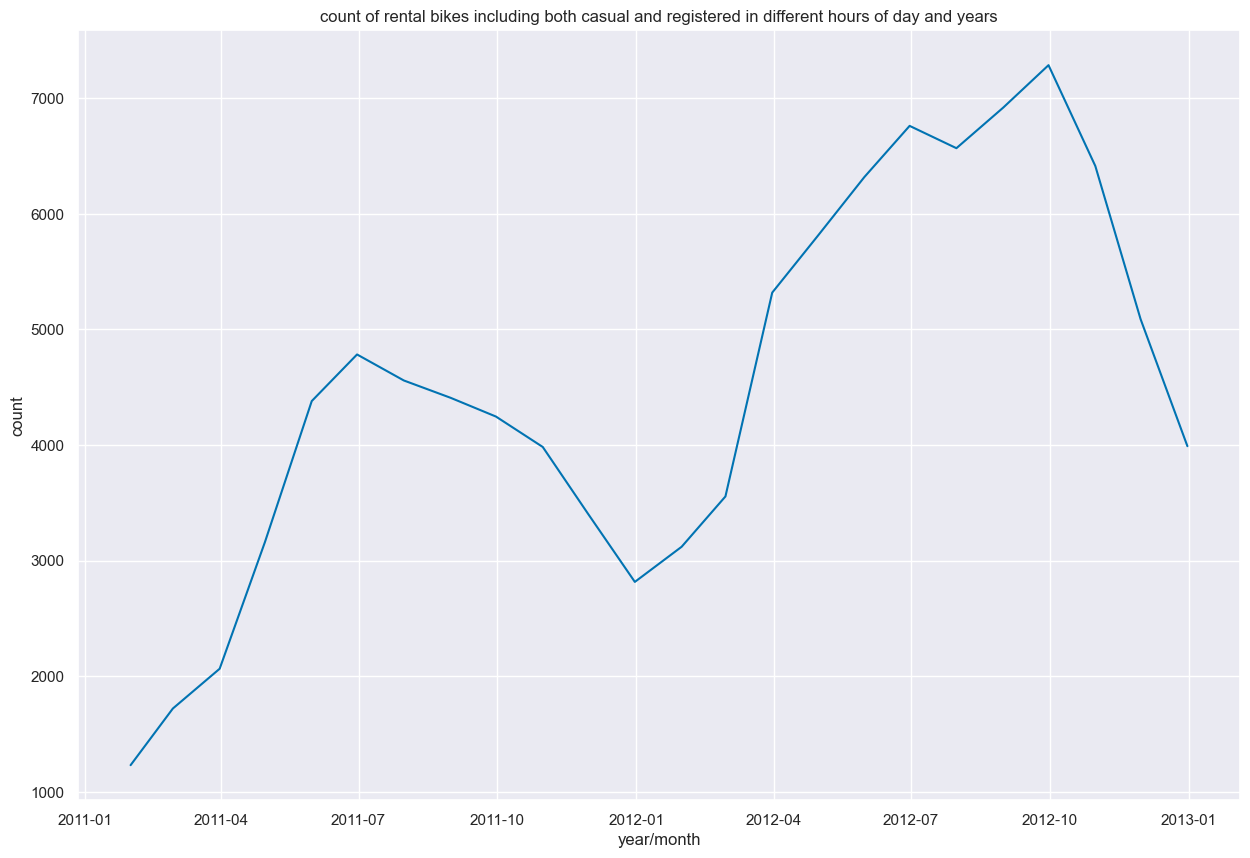

In [ ]:
plt.figure(figsize=(15,10))
legend_list = [0, 1]
sns.lineplot(data= mnthly_df_day, x = mnthly_df_day.index, y = mnthly_df_day["cnt"] )
plt.xlabel("year/month")
plt.ylabel("count")
plt.title("count of rental bikes including both casual and registered in different hours of day and years")

#plt.legend(title = "year", edgecolor='blue', loc='upper right', bbox_to_anchor=(0.7, 0.7)) # lables = legend_list --> when i use this, the color of legend changes to black
plt.show()

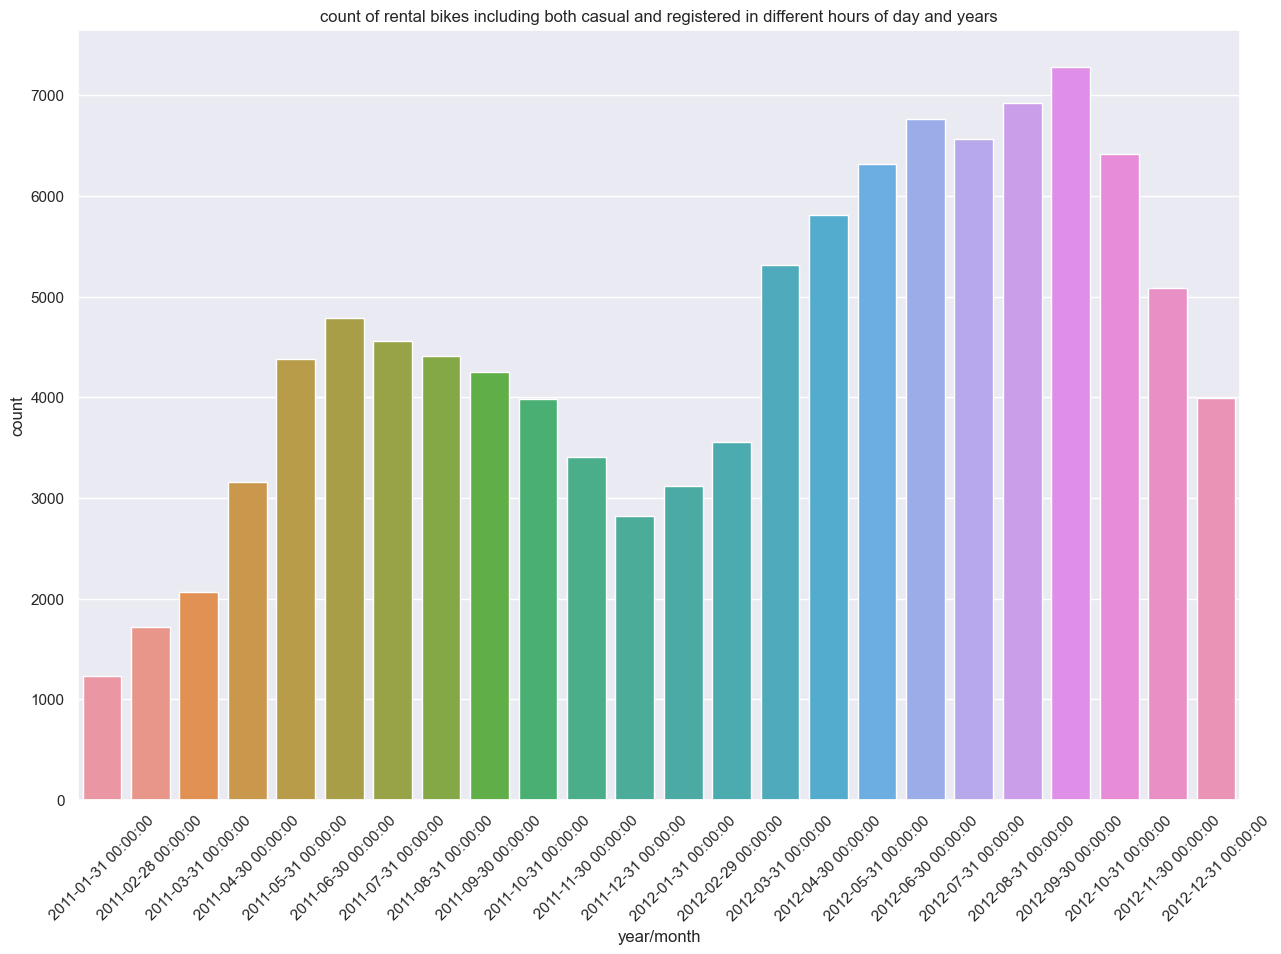

In [ ]:
plt.figure(figsize=(15,10))
legend_list = [0, 1]
sns.barplot(data= mnthly_df_day, x = mnthly_df_day.index, y = mnthly_df_day["cnt"] )
plt.xlabel("year/month")
plt.xticks(rotation = 45)
plt.ylabel("count")
plt.title("count of rental bikes including both casual and registered in different hours of day and years")

#plt.legend(title = "year", edgecolor='blue', loc='upper right', bbox_to_anchor=(0.7, 0.7)) # lables = legend_list --> when i use this, the color of legend changes to black
plt.show()

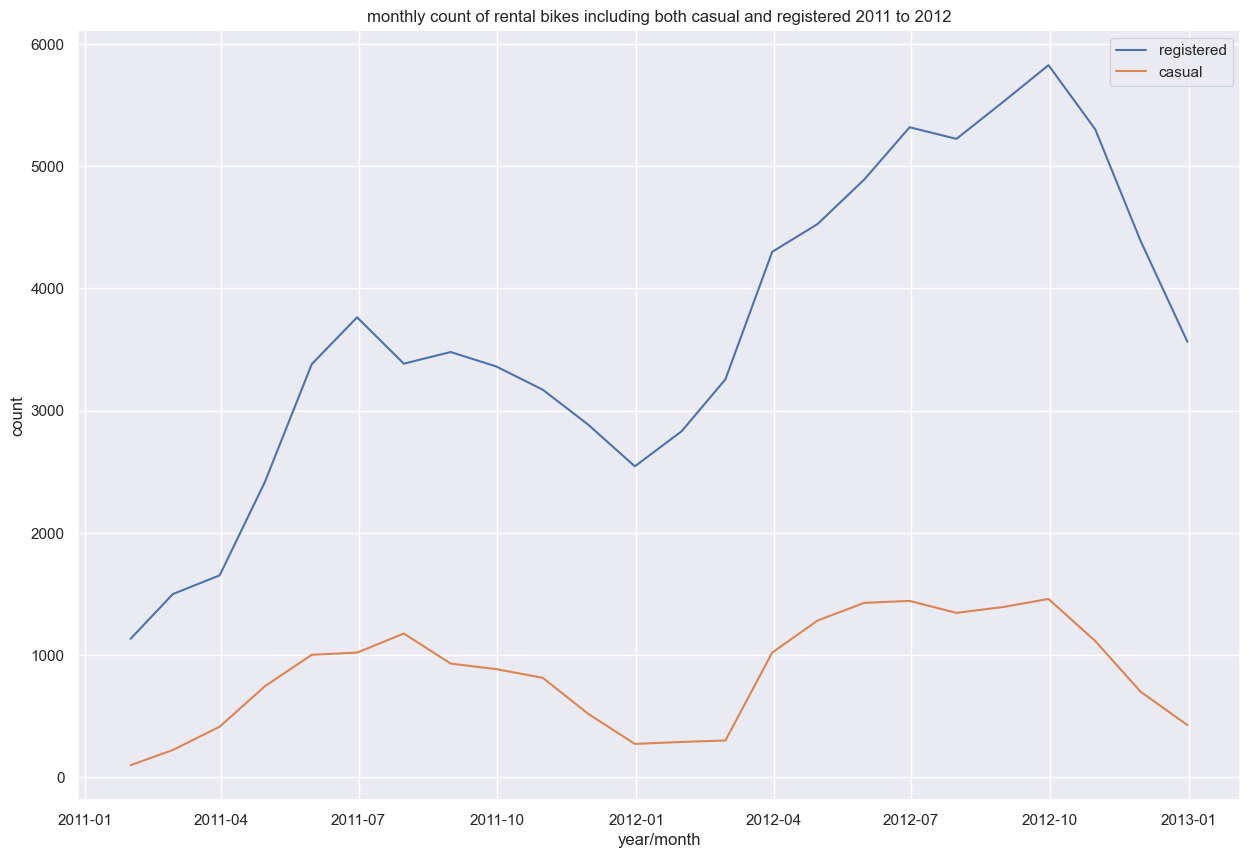

In [ ]:
plt.figure(figsize=(15,10))
legend_list = [0, 1]
sns.lineplot(data= mnthly_df_day, x = mnthly_df_day.index, y = mnthly_df_day["registered"], label = "registered" )
sns.lineplot(data= mnthly_df_day, x = mnthly_df_day.index, y = mnthly_df_day["casual"], label = "casual" )

plt.xlabel("year/month")
plt.ylabel("count")
plt.title("monthly count of rental bikes including both casual and registered 2011 to 2012")

#plt.legend(title = "year", edgecolor='blue', loc='upper right', bbox_to_anchor=(0.7, 0.7)) # lables = legend_list --> when i use this, the color of legend changes to black
plt.show()

In [ ]:
fig = fig.update_traces(marker_line_width=0)


In [ ]:
df_day["temperature"]